Sea preciso (minimizar falsos diagnósticos).

Sea explicable (que variables influyen en la decisión).

Funcione con los datos que las personas pueden proveer fácilmente.



In [1061]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
sys.path.append(os.path.abspath('../utils'))

from toolbox_ML import *
from bootcampviztools import *

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import mannwhitneyu


from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from collections import Counter


from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay, classification_report


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

import joblib

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df = pd.read_csv('../data/Sleep_Health_and_Lifestyle.csv', index_col = [0])

- **Person ID**: Indice por filas
- **Gender**: Genero de las personas 
- **Age**: Edad de las personas en años
- **Occupation**: A que se dedican las personas
- **Sleep Duration**: Cantidad de horas que duerme esa persona
- **Quality of Sleep**: Ratio del 1 al 10 de la calidad del sueño, según el criterio de la persona
- **Physical Activity Level**: Tiempo en minutos de actividad fisica al día
- **Stress Level**: Ratio del 1 al 10 del estrés, según el criterio de la persona
- **BMI Category**: Sería el índice de masa corporal pero en cuatro niveles (Normal, sobrepeso...)
- **Blood Pressure**: La medida de la presión arterial de la persona, indicada como presión sistólica sobre presión diastólica.
- **Heart Rate**: Latidos por minuto de la persona en resposo
- **Daily Steps**: Pasos diarios de la persona
- **Sleep Disorder**: (target) indica si tiene un problema con el sueño o no (NaN)

In [15]:
df

Gender  Age            Occupation  Sleep Duration  \
Person ID                                                      
1            Male   27     Software Engineer             6.1   
2            Male   28                Doctor             6.2   
3            Male   28                Doctor             6.2   
4            Male   28  Sales Representative             5.9   
5            Male   28  Sales Representative             5.9   
...           ...  ...                   ...             ...   
370        Female   59                 Nurse             8.1   
371        Female   59                 Nurse             8.0   
372        Female   59                 Nurse             8.1   
373        Female   59                 Nurse             8.1   
374        Female   59                 Nurse             8.1   

           Quality of Sleep  Physical Activity Level  Stress Level  \
Person ID                                                            
1                         6                       42             6   
2                         6                       60             8   
3                         6                       60             8   
4                         4                       30             8   
5                         4                       30             8   
...                     ...                      ...           ...   
370                       9                       75             3   
371                       9                       75             3   
372                       9                       75             3   
373                       9                       75             3   
374                       9                       75             3   

          BMI Category Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
Person ID                                                                      
1           Overweight         126/83          77         4200            NaN  
2               Normal         125/80          75        10000            NaN  
3               Normal         125/80          75        10000            NaN  
4                Obese         140/90          85         3000    Sleep Apnea  
5                Obese         140/90          85         3000    Sleep Apnea  
...                ...            ...         ...          ...            ...  
370         Overweight         140/95          68         7000    Sleep Apnea  
371         Overweight         140/95          68         7000    Sleep Apnea  
372         Overweight         140/95          68         7000    Sleep Apnea  
373         Overweight         140/95          68         7000    Sleep Apnea  
374         Overweight         140/95          68         7000    Sleep Apnea  

[374 rows x 12 columns]

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [315]:
describe_df(df)

Gender    Age Occupation Sleep Duration Quality of Sleep  \
DATA_TYPE      object  int64     object        float64            int64   
MISSINGS(%)       0.0    0.0        0.0            0.0              0.0   
UNIQUE_VALUES       2     31         11             27                6   
CARDIN(%)        0.53   8.29       2.94           7.22              1.6   

              Physical Activity Level Stress Level BMI Category  \
DATA_TYPE                       int64        int64       object   
MISSINGS(%)                       0.0          0.0          0.0   
UNIQUE_VALUES                      16            6            4   
CARDIN(%)                        4.28          1.6         1.07   

              Blood Pressure Heart Rate Daily Steps Sleep Disorder  
DATA_TYPE             object      int64       int64         object  
MISSINGS(%)              0.0        0.0         0.0          58.56  
UNIQUE_VALUES             25         19          20              3  
CARDIN(%)               6.68       5.08        5.35            0.8

In [316]:
tipifica_variables(df, 10, 0.20)

variable      tipo_sugerido
0                    Gender            Binaria
1                       Age  Numérica discreta
2                Occupation  Numérica discreta
3            Sleep Duration  Numérica discreta
4          Quality of Sleep         Categórica
5   Physical Activity Level  Numérica discreta
6              Stress Level         Categórica
7              BMI Category         Categórica
8            Blood Pressure  Numérica discreta
9                Heart Rate  Numérica discreta
10              Daily Steps  Numérica discreta
11           Sleep Disorder         Categórica

In [317]:
# según esto obtenido y viendo el dataset, estas son categoricas y numericas

In [16]:
cat_features = ['Gender', 'Occupation', 'BMI Category']

In [319]:
# los valores que faltan en 'Sleep Disorder' son los que indican que no sufre ningún trastorno del sueño

In [320]:
df.describe().T

count         mean          std     min      25%  \
Age                      374.0    42.184492     8.673133    27.0    35.25   
Sleep Duration           374.0     7.132086     0.795657     5.8     6.40   
Quality of Sleep         374.0     7.312834     1.196956     4.0     6.00   
Physical Activity Level  374.0    59.171123    20.830804    30.0    45.00   
Stress Level             374.0     5.385027     1.774526     3.0     4.00   
Heart Rate               374.0    70.165775     4.135676    65.0    68.00   
Daily Steps              374.0  6816.844920  1617.915679  3000.0  5600.00   

                            50%     75%      max  
Age                        43.0    50.0     59.0  
Sleep Duration              7.2     7.8      8.5  
Quality of Sleep            7.0     8.0      9.0  
Physical Activity Level    60.0    75.0     90.0  
Stress Level                5.0     7.0      8.0  
Heart Rate                 70.0    72.0     86.0  
Daily Steps              7000.0  8000.0  10000.0

In [321]:
# La edad está entre los 27 años y los 59 años

In [322]:
df.Occupation.value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [379]:
#Los puestos de trabajos son todos cualificados, pero tambien puede ser que tengan más problemas del sueño por la carga de trabajo/responsabilidad
# tenemos que tener en cuento ese 'Manager' que solo hay 1 o algún puesto de trabajo minoritario en nuestro dataset

In [324]:
# vamos a mirar el target

In [5]:
df['Sleep Disorder'].value_counts(True,dropna=False)

Sleep Disorder
NaN            0.585561
Sleep Apnea    0.208556
Insomnia       0.205882
Name: proportion, dtype: float64

In [17]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('NaN')

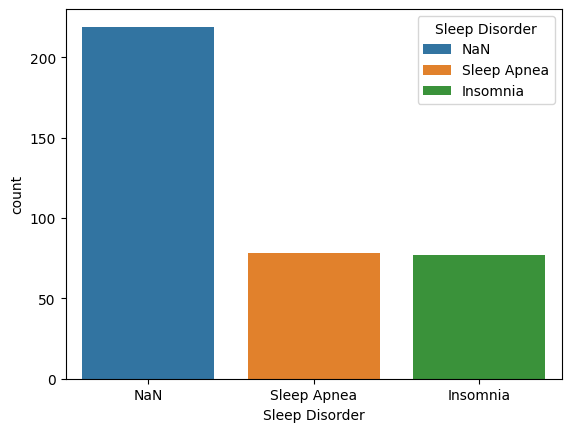

In [18]:
sns.countplot(df, x='Sleep Disorder', hue= 'Sleep Disorder', legend=True)
plt.show()

In [328]:
# vamos a juntar la dos variables de disorder para que sea binaria, sueño bueno y sueño malo para filtrar y luego con otro modelo clasificar si es
# apnea del sueño o insomnio
# codificamos como 0 (NaN(buen sueño)), 1 (Sleep Apnea) + (Insomnia)

In [329]:
# ahora nos enfocamos en el primer modelo, que clasifica si tienes insomnio (1) o no (0)

In [19]:
mapeo = {'NaN':0, 'Sleep Apnea':1, 'Insomnia':1}
df['Sleep Disorder'] = df['Sleep Disorder'].map(mapeo)

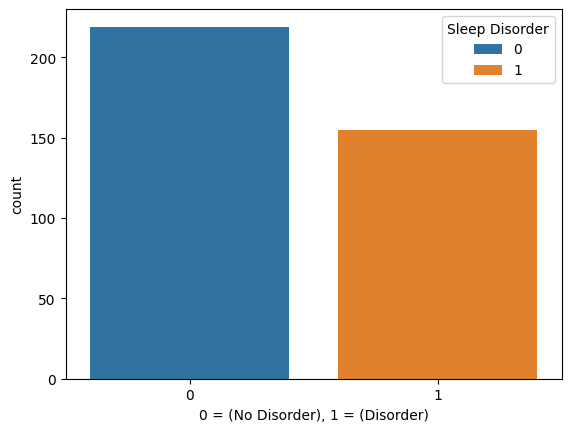

In [331]:
sns.countplot(df, x='Sleep Disorder', hue= 'Sleep Disorder', legend=True)
plt.xlabel('0 = (No Disorder), 1 = (Disorder)')
plt.show()

In [8]:
df['Sleep Disorder'].value_counts(True)

Sleep Disorder
0    0.585561
1    0.414439
Name: proportion, dtype: float64

In [332]:
# vamos a dividir en train y test para empezar

In [20]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

In [21]:
print(train_set.shape)
print(test_set.shape)

(299, 12)
(75, 12)


In [22]:
train_set.reset_index(inplace=True)

In [24]:
train_set.drop(columns='Person ID', inplace=True)
train_set.sample(10)

Gender  Age   Occupation  Sleep Duration  Quality of Sleep  \
33   Female   51     Engineer             8.5                 9   
232    Male   31       Doctor             7.8                 7   
194    Male   32       Doctor             6.0                 6   
91   Female   50        Nurse             6.1                 6   
57     Male   32       Doctor             7.7                 7   
241  Female   34    Scientist             5.8                 4   
167    Male   44  Salesperson             6.4                 6   
280  Female   45      Teacher             6.6                 7   
143  Female   52   Accountant             6.5                 7   
182  Female   45      Teacher             6.5                 7   

     Physical Activity Level  Stress Level BMI Category Blood Pressure  \
33                        30             3       Normal         125/80   
232                       75             6       Normal         120/80   
194                       30             8       Normal         125/80   
91                        90             8   Overweight         140/95   
57                        75             6       Normal         120/80   
241                       32             8   Overweight         131/86   
167                       45             7   Overweight         130/85   
280                       45             4   Overweight         135/90   
143                       45             7   Overweight         130/85   
182                       45             4   Overweight         135/90   

     Heart Rate  Daily Steps  Sleep Disorder  
33           65         5000               0  
232          70         8000               0  
194          72         5000               0  
91           75        10000               1  
57           70         8000               0  
241          81         5200               1  
167          72         6000               1  
280          65         6000               1  
143          72         6000               1  
182          65         6000               1

In [25]:
train_set.rename(columns = {'Sleep Disorder':'target'}, inplace=True)

In [337]:
# vamos a separ la columna de 'blood pressure' y vamos a calcular la presion del pulso

In [26]:
train_set[['systolic','diastolic']] = train_set['Blood Pressure'].str.extract(r'(\d+)/(\d+)', expand=True)

In [27]:
train_set.drop(columns='Blood Pressure', inplace=True)

In [28]:
train_set['systolic'] = train_set['systolic'].astype(int)
train_set['diastolic'] = train_set['diastolic'].astype(int)

In [29]:
train_set['Pulse Pressure'] = train_set['systolic'] - train_set['diastolic']

In [30]:
train_set

Gender  Age         Occupation  Sleep Duration  Quality of Sleep  \
0      Male   43        Salesperson             6.5                 6   
1      Male   33             Doctor             6.0                 6   
2      Male   35  Software Engineer             7.5                 8   
3    Female   59              Nurse             8.2                 9   
4    Female   29              Nurse             6.5                 5   
..      ...  ...                ...             ...               ...   
294    Male   33             Doctor             6.1                 6   
295  Female   37              Nurse             6.1                 6   
296  Female   49              Nurse             6.1                 6   
297  Female   57              Nurse             8.2                 9   
298  Female   36            Teacher             7.2                 8   

     Physical Activity Level  Stress Level   BMI Category  Heart Rate  \
0                         45             7     Overweight          72   
1                         30             8         Normal          72   
2                         60             5  Normal Weight          70   
3                         75             3     Overweight          68   
4                         40             7  Normal Weight          80   
..                       ...           ...            ...         ...   
294                       30             8         Normal          72   
295                       42             6     Overweight          77   
296                       90             8     Overweight          75   
297                       75             3     Overweight          68   
298                       60             4         Normal          68   

     Daily Steps  target  systolic  diastolic  Pulse Pressure  
0           6000       1       130         85              45  
1           5000       0       125         80              45  
2           8000       0       120         80              40  
3           7000       1       140         95              45  
4           4000       1       132         87              45  
..           ...     ...       ...        ...             ...  
294         5000       0       125         80              45  
295         4200       0       126         83              43  
296        10000       1       140         95              45  
297         7000       1       140         95              45  
298         7000       0       115         75              40  

[299 rows x 14 columns]

In [31]:
numericas_features = []
for x in train_set.columns:
    if x not in cat_features and x != 'target':
        numericas_features.append(x)

In [300]:
# vamos a ver los ouliers que pueden tener las features

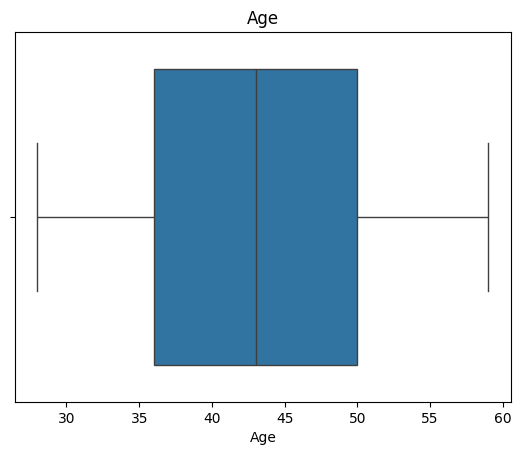

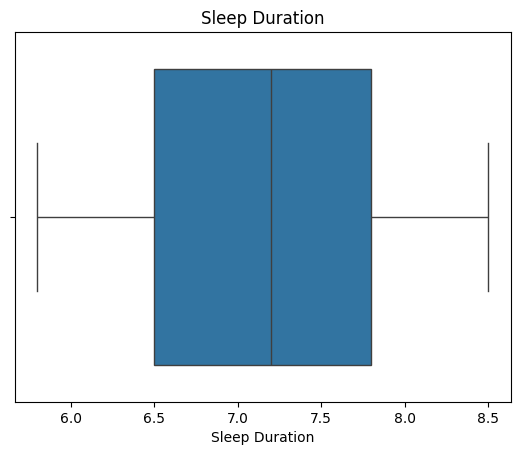

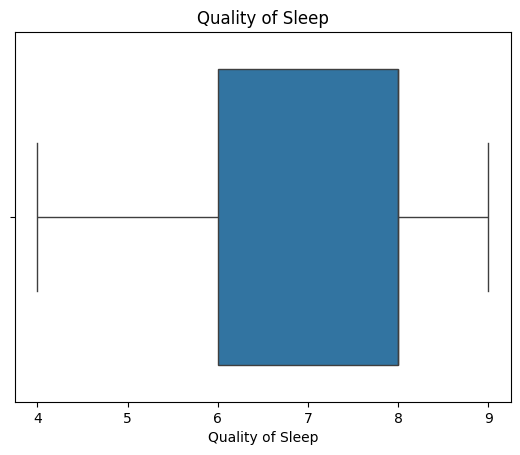

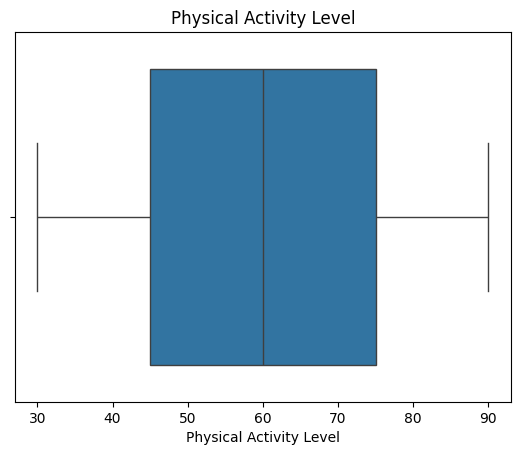

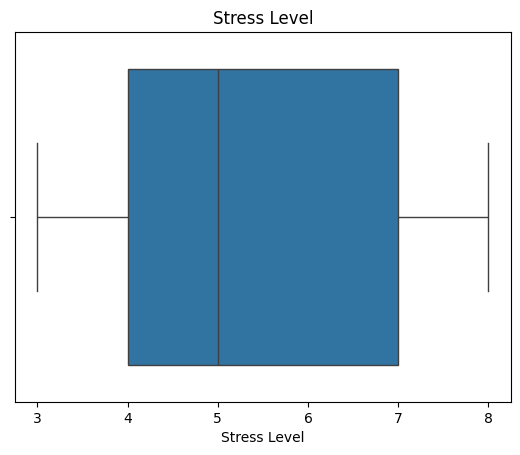

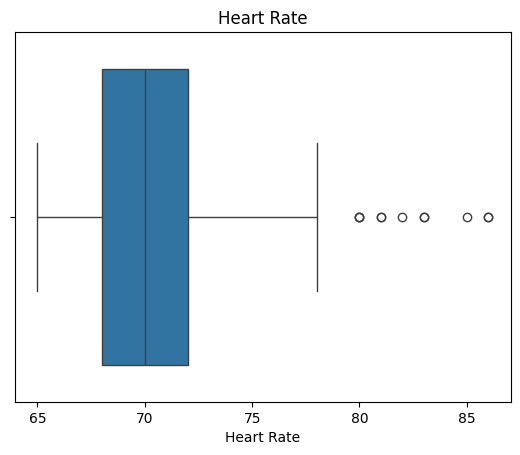

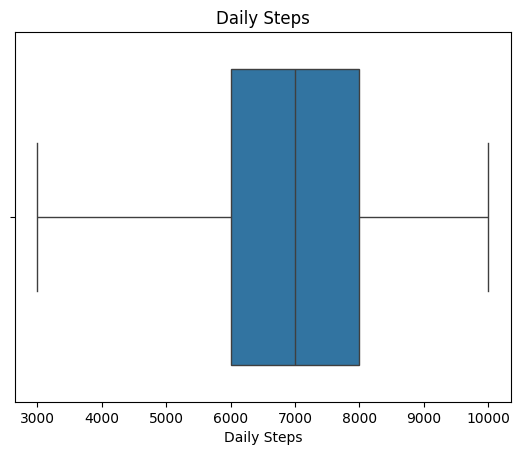

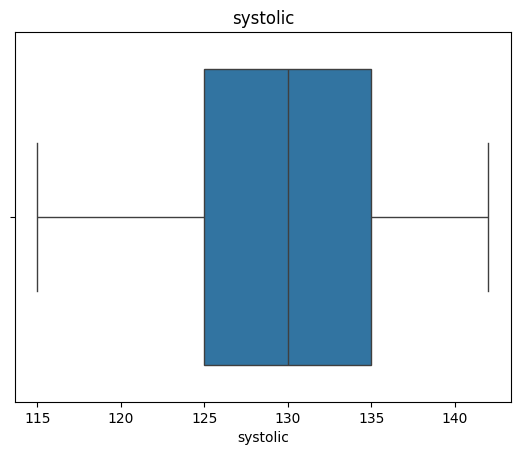

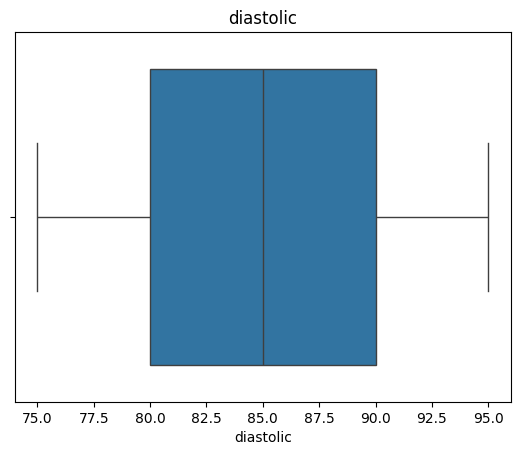

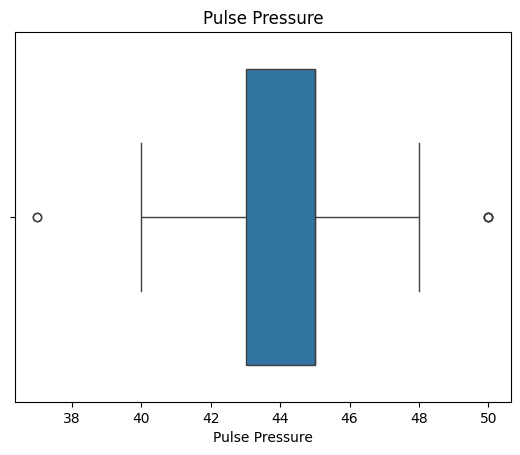

In [301]:
for x in numericas_features:
    plt.figure()
    sns.boxplot(x = train_set[x])
    plt.title(x)

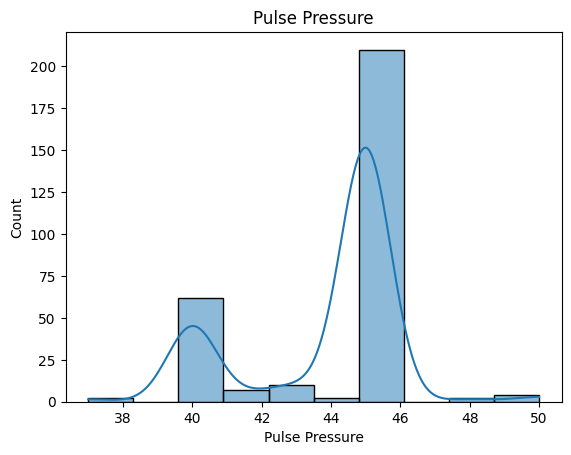

In [302]:
sns.histplot(train_set, x='Pulse Pressure', kde=True, bins=10)
plt.title('Pulse Pressure')
plt.show()

In [303]:
# no son outliers porque la presión del pulso está dentro de los normal

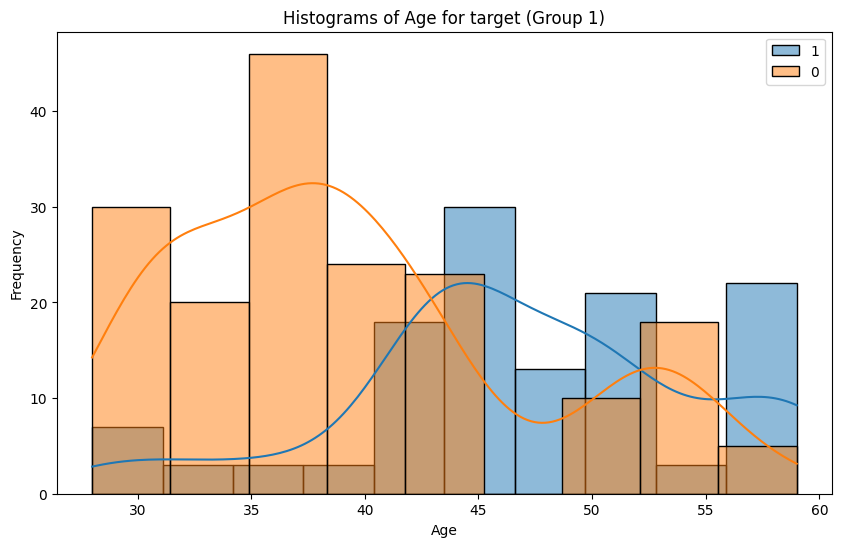

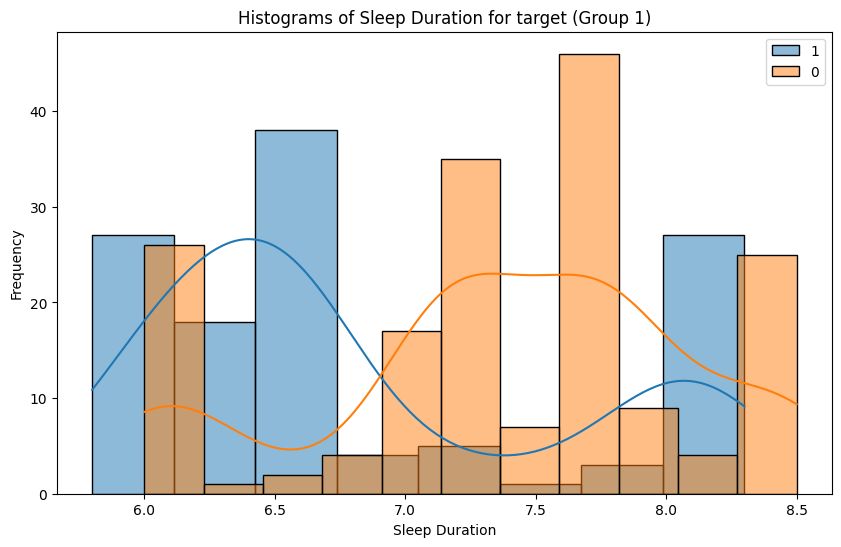

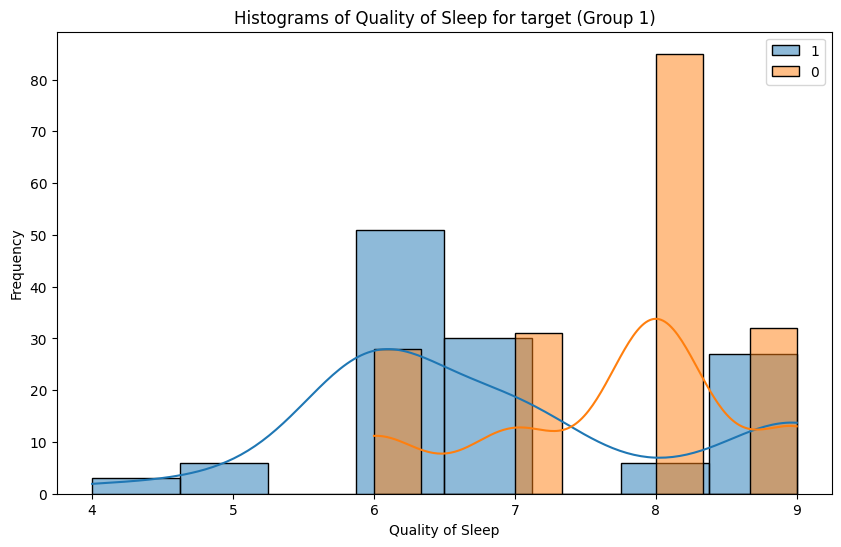

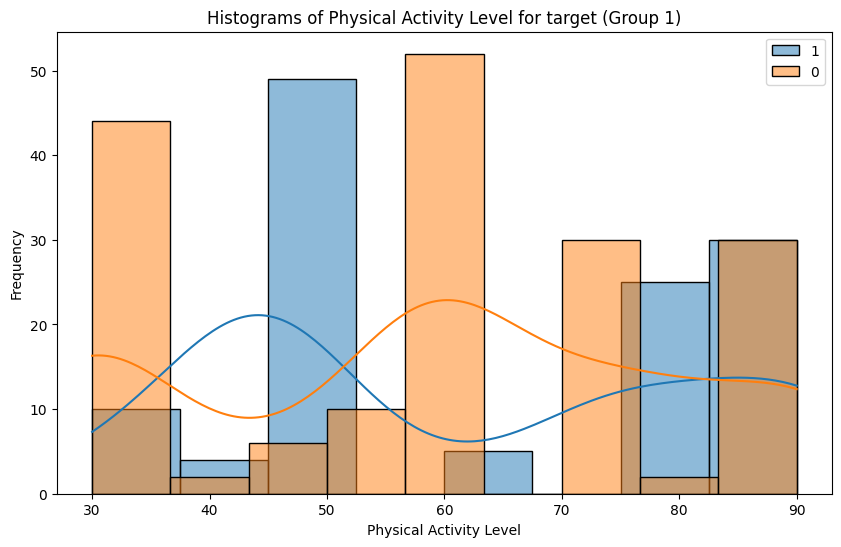

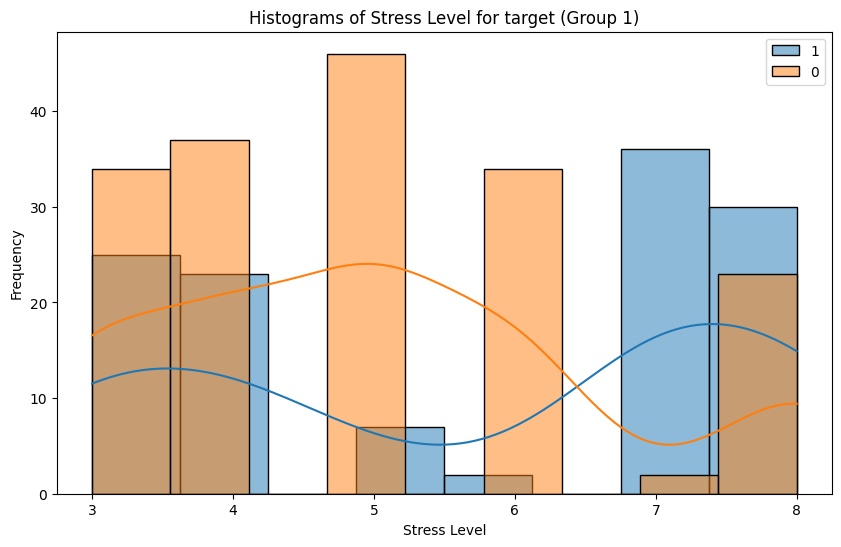

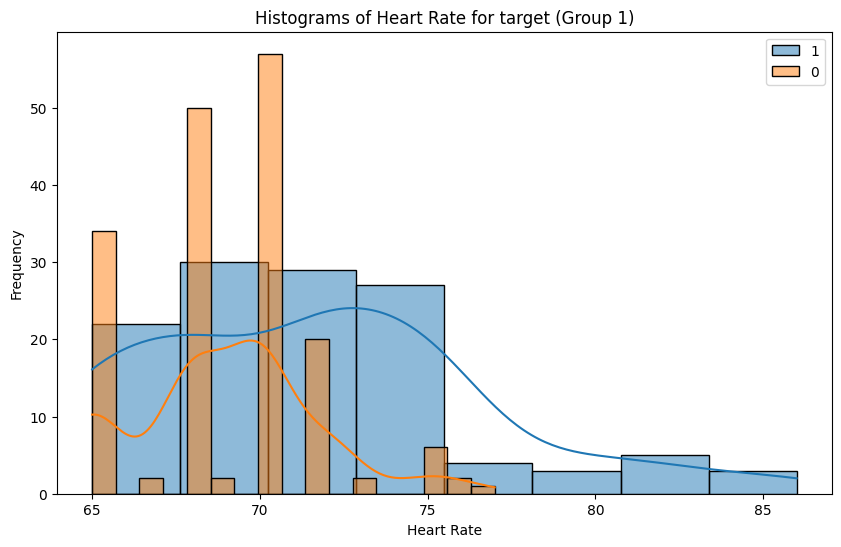

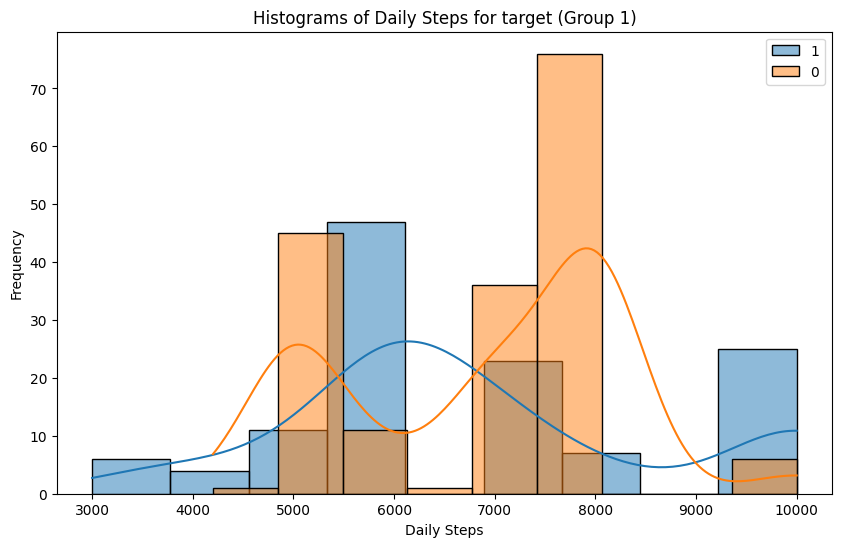

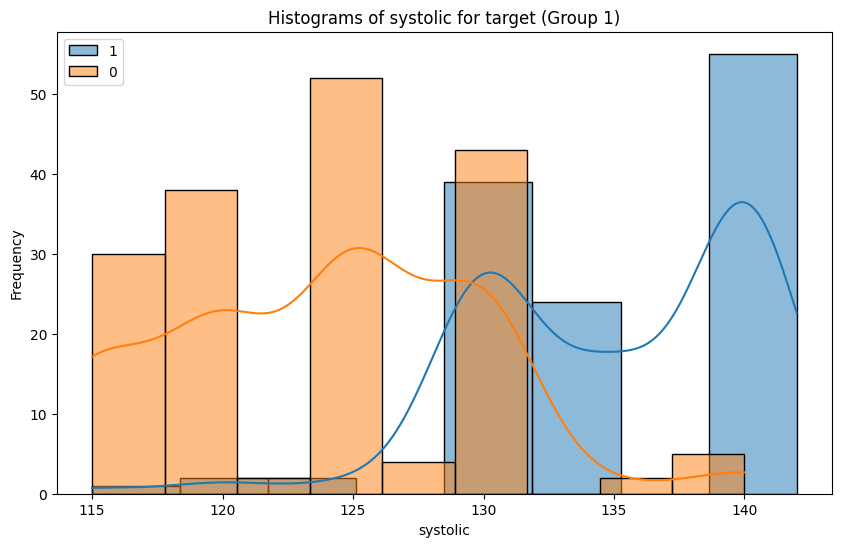

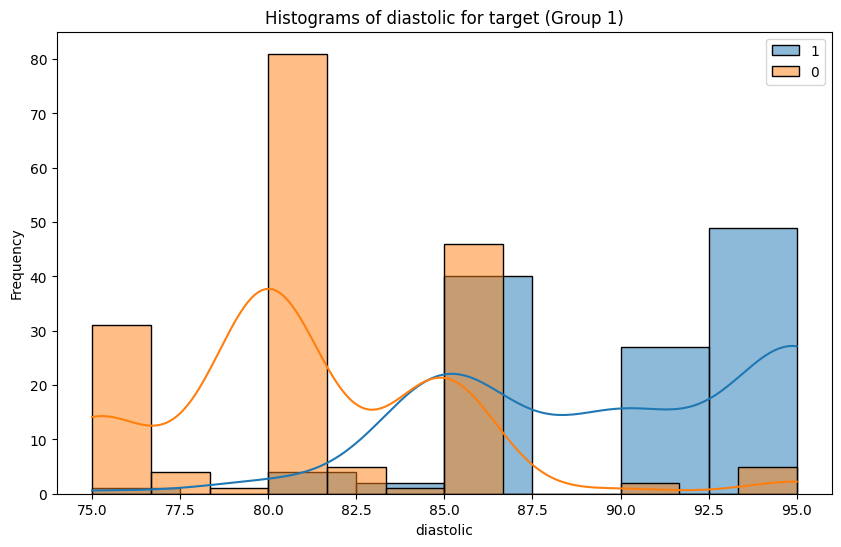

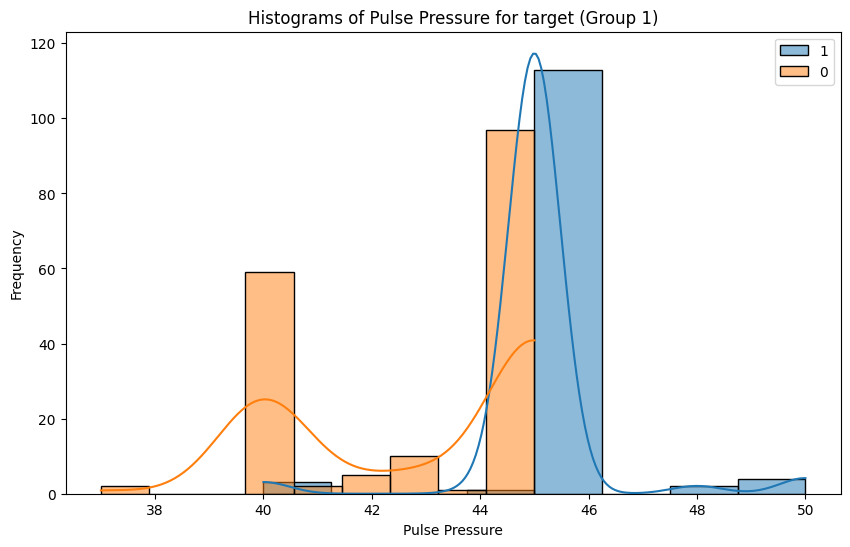

In [304]:
for x in numericas_features:
    plot_grouped_histograms(train_set, 'target', x, group_size=2)

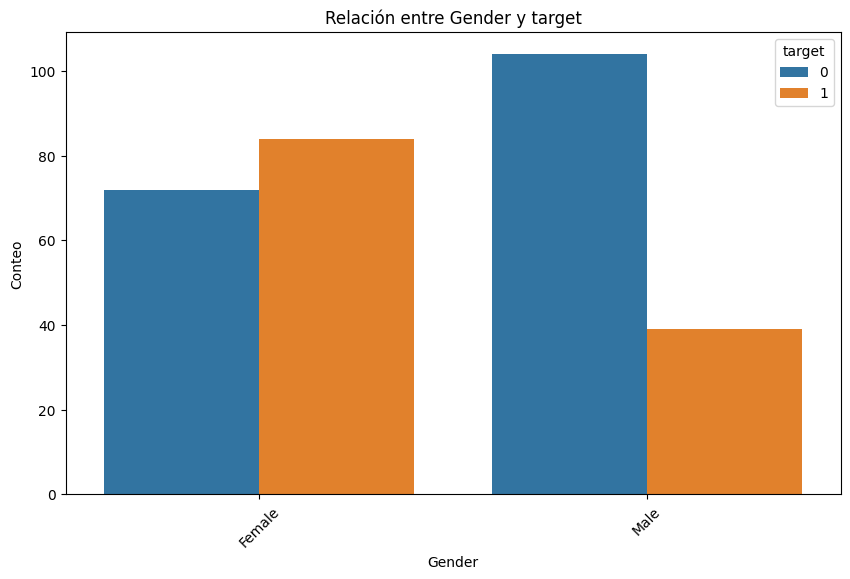

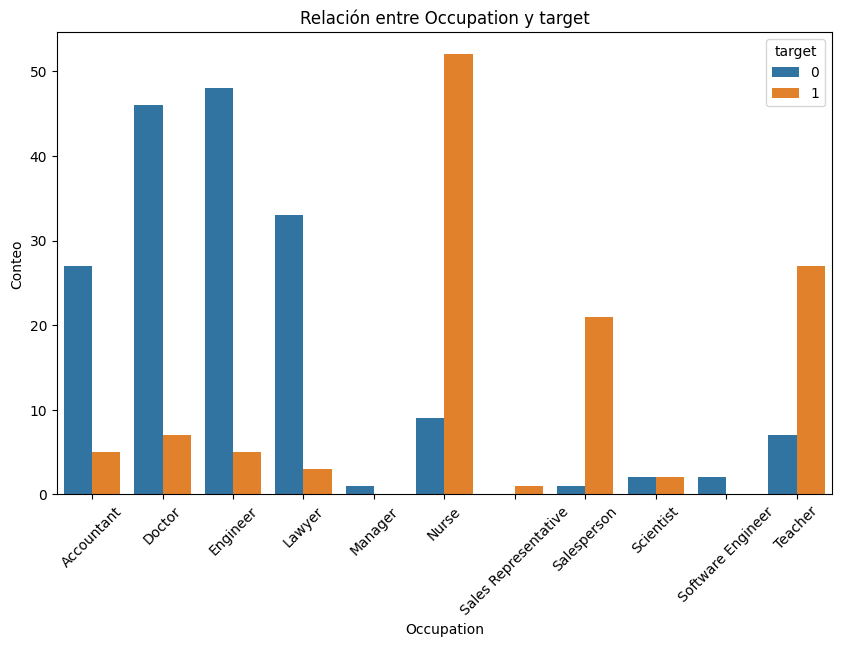

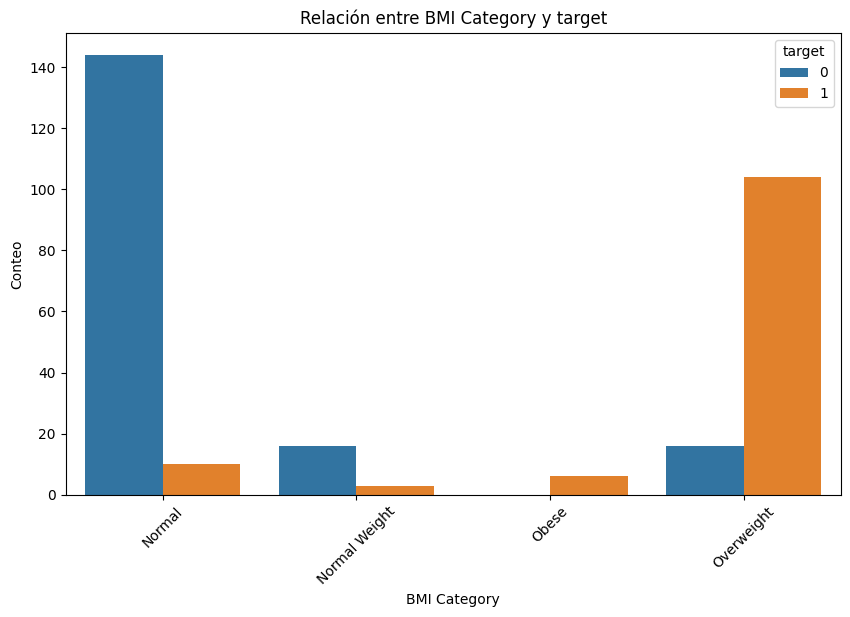

In [305]:
for x in cat_features:
    plot_categorical_relationship_fin(train_set, cat_col1=x, cat_col2='target', size_group=11)

In [247]:
#parece que hay una buena relación entre las features contra el target, hay una diferencia entre los que no tienen problema del sueño y
#los que tienen problemas en el sueño.

In [248]:
# vamos a codificar esas features categoricas

In [32]:
train_set['Gender_code'] = train_set['Gender'].apply(lambda x: 0 if x == 'Male' else 1)

In [16]:
train_set['BMI Category'].value_counts()

BMI Category
Normal           154
Overweight       120
Normal Weight     19
Obese              6
Name: count, dtype: int64

In [17]:
# vamos a unir 'normal' con 'normal weight' y 'overweight' con 'obese' porque indican lo mismo

In [33]:
train_set['BMI Category'] = train_set['BMI Category'].map({'Normal Weight': 'Normal','Normal':'Normal', 'Overweight':'Overweight', 'Obese': 'Overweight'})

In [19]:
train_set['BMI Category'].value_counts()

BMI Category
Normal        173
Overweight    126
Name: count, dtype: int64

In [34]:
train_set['BMI Category_code'] = train_set['BMI Category'].apply(lambda x: 0 if x == 'Normal' else 1)

In [21]:
train_set['BMI Category_code'].value_counts()

BMI Category_code
0    173
1    126
Name: count, dtype: int64

In [22]:
train_set['Occupation'].value_counts()

Occupation
Nurse                   61
Engineer                53
Doctor                  53
Lawyer                  36
Teacher                 34
Accountant              32
Salesperson             22
Scientist                4
Software Engineer        2
Sales Representative     1
Manager                  1
Name: count, dtype: int64

In [35]:
dummies = pd.get_dummies(train_set['Occupation']).astype(int)

In [36]:
train_set = pd.concat([train_set, dummies], axis = 1)

In [37]:
train_set.head()

Gender  Age         Occupation  Sleep Duration  Quality of Sleep  \
0    Male   43        Salesperson             6.5                 6   
1    Male   33             Doctor             6.0                 6   
2    Male   35  Software Engineer             7.5                 8   
3  Female   59              Nurse             8.2                 9   
4  Female   29              Nurse             6.5                 5   

   Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                       45             7   Overweight          72   
1                       30             8       Normal          72   
2                       60             5       Normal          70   
3                       75             3   Overweight          68   
4                       40             7       Normal          80   

   Daily Steps  target  systolic  diastolic  Pulse Pressure  Gender_code  \
0         6000       1       130         85              45            0   
1         5000       0       125         80              45            0   
2         8000       0       120         80              40            0   
3         7000       1       140         95              45            1   
4         4000       1       132         87              45            1   

   BMI Category_code  Accountant  Doctor  Engineer  Lawyer  Manager  Nurse  \
0                  1           0       0         0       0        0      0   
1                  0           0       1         0       0        0      0   
2                  0           0       0         0       0        0      0   
3                  1           0       0         0       0        0      1   
4                  0           0       0         0       0        0      1   

   Sales Representative  Salesperson  Scientist  Software Engineer  Teacher  
0                     0            1          0                  0        0  
1                     0            0          0                  0        0  
2                     0            0          0                  1        0  
3                     0            0          0                  0        0  
4                     0            0          0                  0        0

In [38]:
categoricas_category = ['Gender', 'Occupation', 'BMI Category']

In [39]:
train_set['Gender'] = train_set['Gender'].astype('category')
train_set['Occupation'] = train_set['Occupation'].astype('category')
train_set['BMI Category'] = train_set['BMI Category'].astype("category")

In [1196]:
categoricas_int = ['Gender_code', 'Accountant','Doctor','Engineer','Lawyer','Manager','Nurse','Sales Representative',
               'Salesperson','Scientist','Software Engineer','Teacher', 'BMI Category_code']

In [41]:
numericas = ['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level', 
             'Heart Rate','Daily Steps', 'systolic', 'diastolic','Pulse Pressure']

In [42]:
len(numericas)

10

In [43]:
target = 'target'

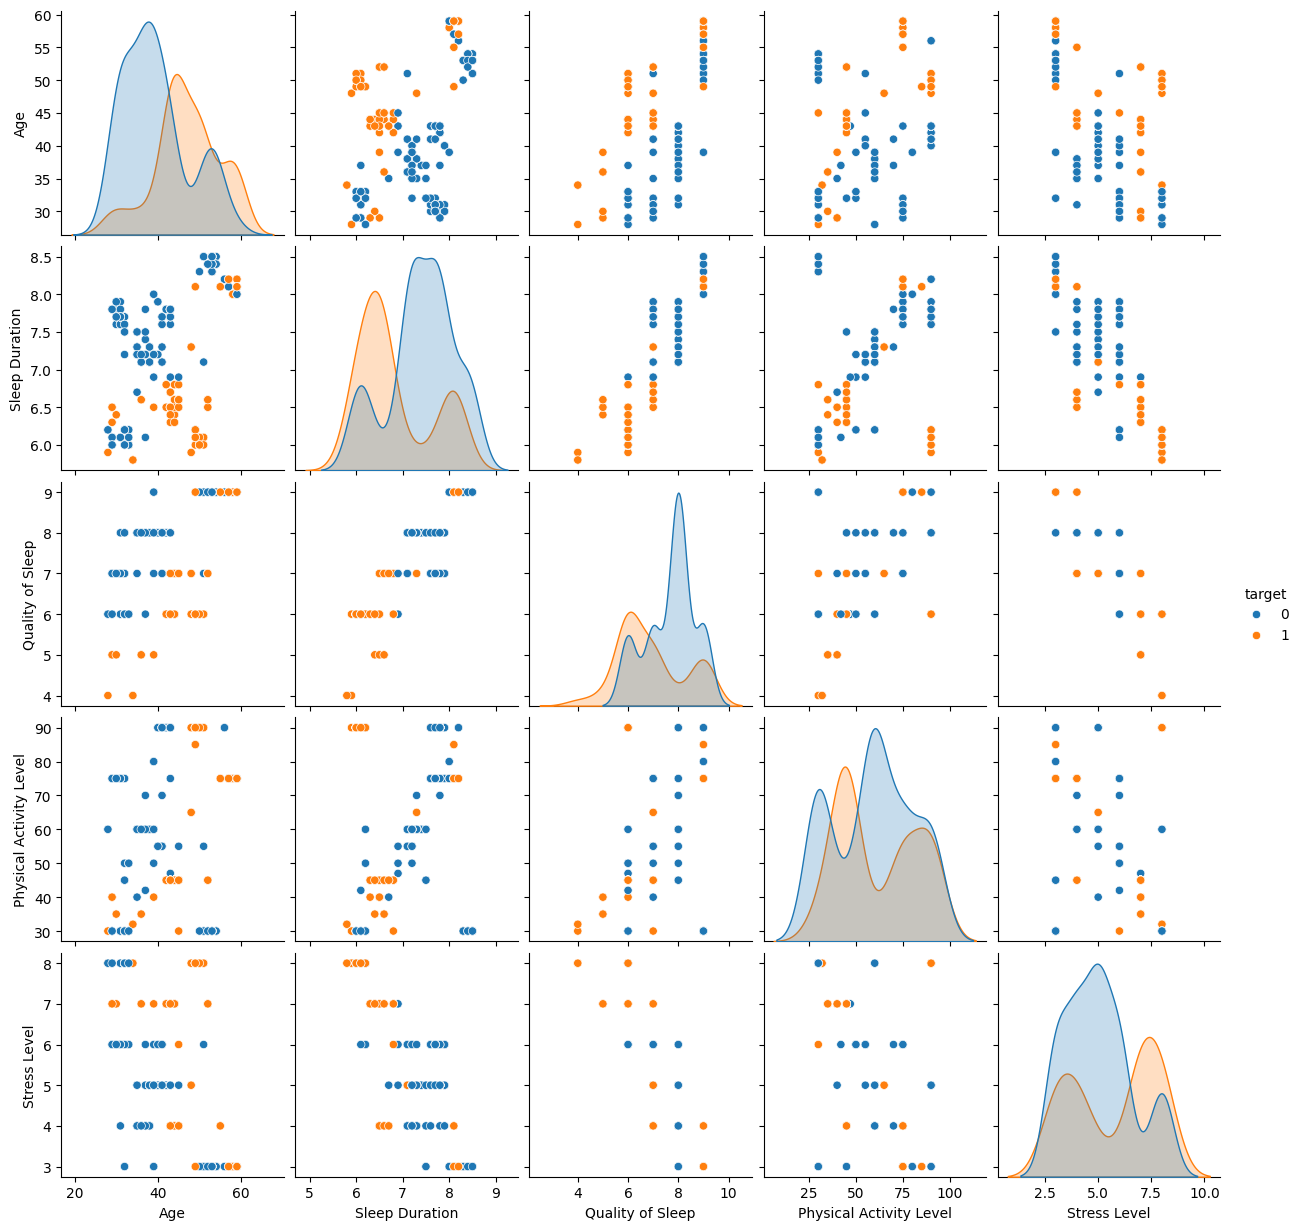

In [372]:
sns.pairplot(train_set[numericas[0:5] + [target]], hue = target);

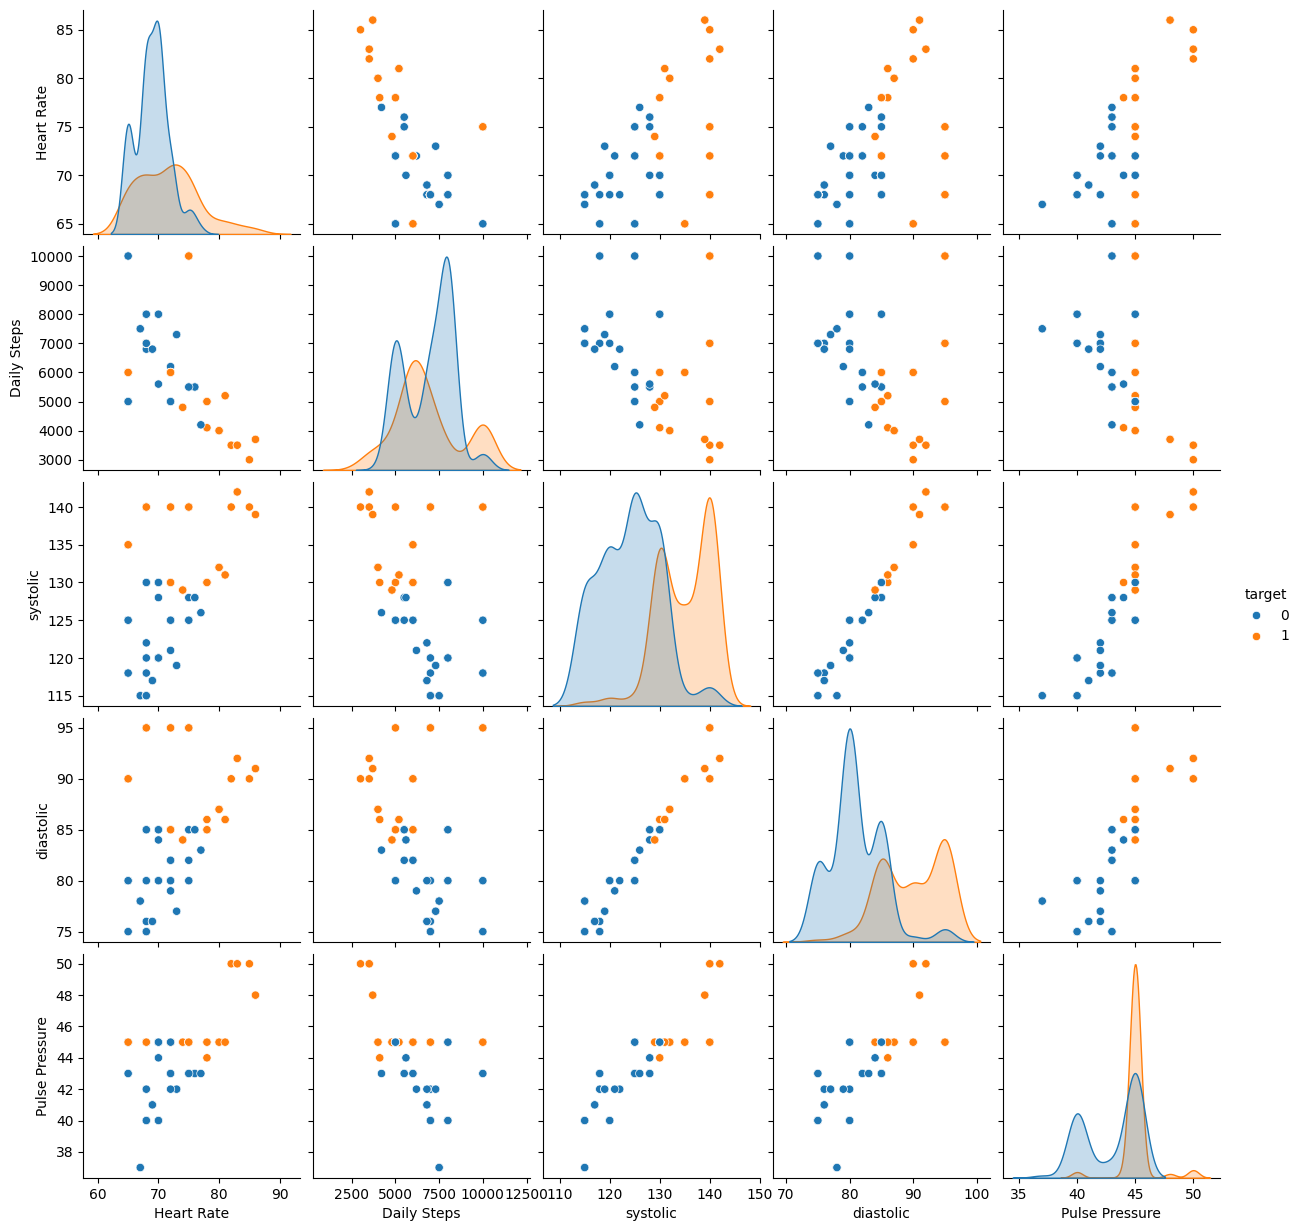

In [373]:
sns.pairplot(train_set[numericas[5:] + [target]], hue = target);

In [1197]:
# las features contra el target se diferencian bien, lo mismo que vimos en en análisis bivariante anterior

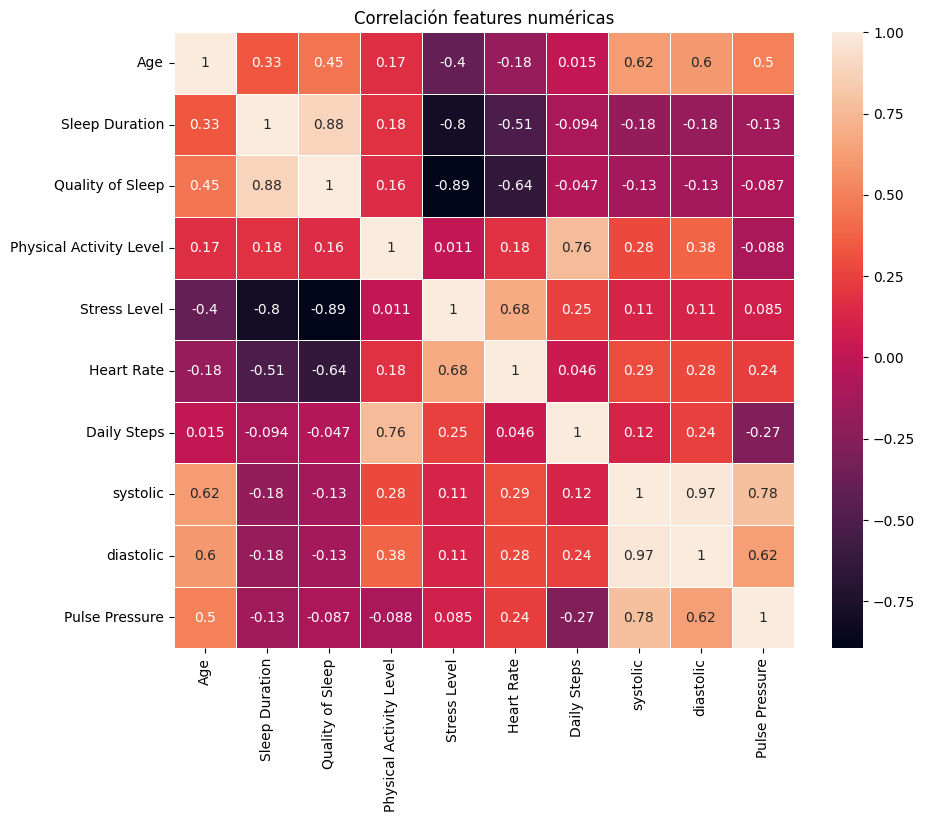

In [378]:
plt.figure(figsize=(10,8))
sns.heatmap(train_set[numericas].corr(), annot=True, linewidths=0.5)
plt.title('Correlación features numéricas');

In [379]:
# 'Sleep Duration' tiene fuerte correlación con 'Quality of Sleep'
# 'Physical Activity Level' se ve que hay mucha correlación con 'Daily Steps'
# 'Heart Rate' se ve importante correlación con 'Stress Level'
# 'systolic' tiene fuerte correlación con 'diastolic', en verdad es información que va junta
# 'Pulse Pressure' se ve correlación con 'diastolic' y 'systolic', ciertamente ha salido de esas dos columnas
# También 'Sleep Duration' y 'Strees Level' se ve muy claro que a mayor 'Streest Level' menor 'Sleep Duration'

In [44]:
# seleccion de features con mutual_info_classif
X = train_set[numericas]
y = train_set['target']

mic = mutual_info_classif(X, y)
print(pd.Series(mic, index=X.columns).sort_values(ascending=False))

systolic                   0.323486
Sleep Duration             0.319822
diastolic                  0.318733
Daily Steps                0.241592
Age                        0.240672
Physical Activity Level    0.215001
Quality of Sleep           0.165856
Stress Level               0.165671
Heart Rate                 0.145637
Pulse Pressure             0.113293
dtype: float64


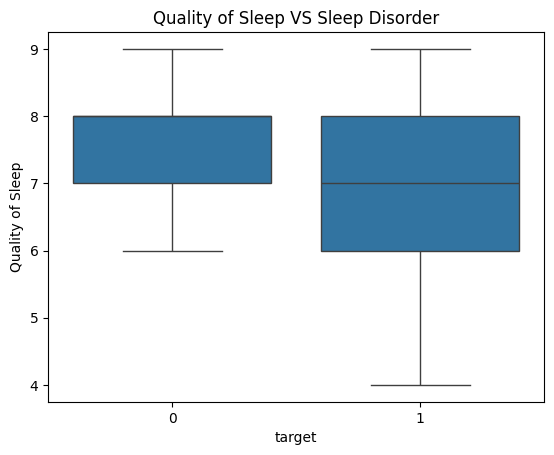

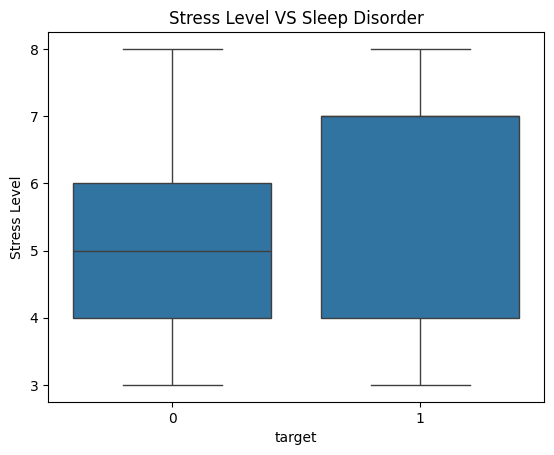

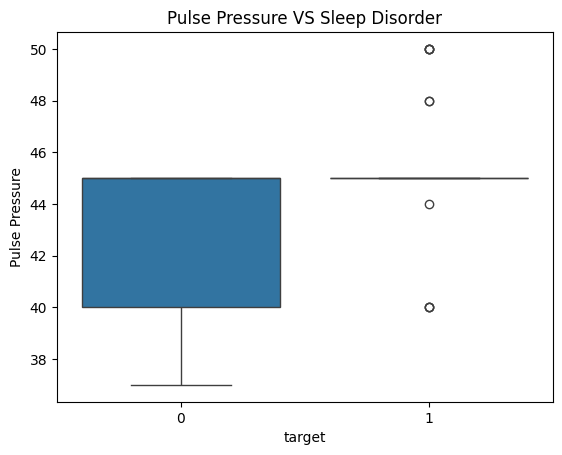

In [34]:
lista = ['Quality of Sleep', 'Stress Level', 'Pulse Pressure']
for x in lista:
    plt.figure()
    sns.boxplot(data=train_set, x='target', y=x)
    plt.title(f'{x} VS Sleep Disorder')

In [388]:
#parece ser que las últimas tres son las peores
#'Quality of Sleep', 'Stress Level', 'Pulse Pressure'
# podemos probar modelos con estas features y sin estas features, si son modelos de arboles por ejemplo, quizás les funciona bien
# podemos probar con test de Mann-Whitney U para ver que resultado tiene, ya que seria un contraste de categorica binaria con numérica

In [399]:
# vamos a hacer el test de Mann-Whitney U con esas features

In [35]:
for x in lista:
    grupo_a = train_set.loc[train_set.target == 0][x]
    grupo_b = train_set.loc[train_set.target == 1][x]
    u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
    print('-',x,'-')
    print("Estadístico U:", u_stat)
    print("Valor p:", p_valor)

    if p_valor < 0.05:
        print('Hay diferencia estadísticamente significativa')
    else:
        print('No hay diferencia suficiente')
    print('------------------------------')

- Quality of Sleep -
Estadístico U: 14700.0
Valor p: 5.277403177210805e-08
Hay diferencia estadísticamente significativa
------------------------------
- Stress Level -
Estadístico U: 8682.5
Valor p: 0.003116433630214749
Hay diferencia estadísticamente significativa
------------------------------
- Pulse Pressure -
Estadístico U: 6011.5
Valor p: 3.7269868670039093e-16
Hay diferencia estadísticamente significativa
------------------------------


In [415]:
# como vemos con un test estadistico rechazamos la hipotesis nula, tenemos confianza estadística, hay relación entre los valores

In [428]:
# voy a mirar los histogramas de las numéricas, si hay alguna mejora si centro los datos para el Modelo de regresión logística si lo uso

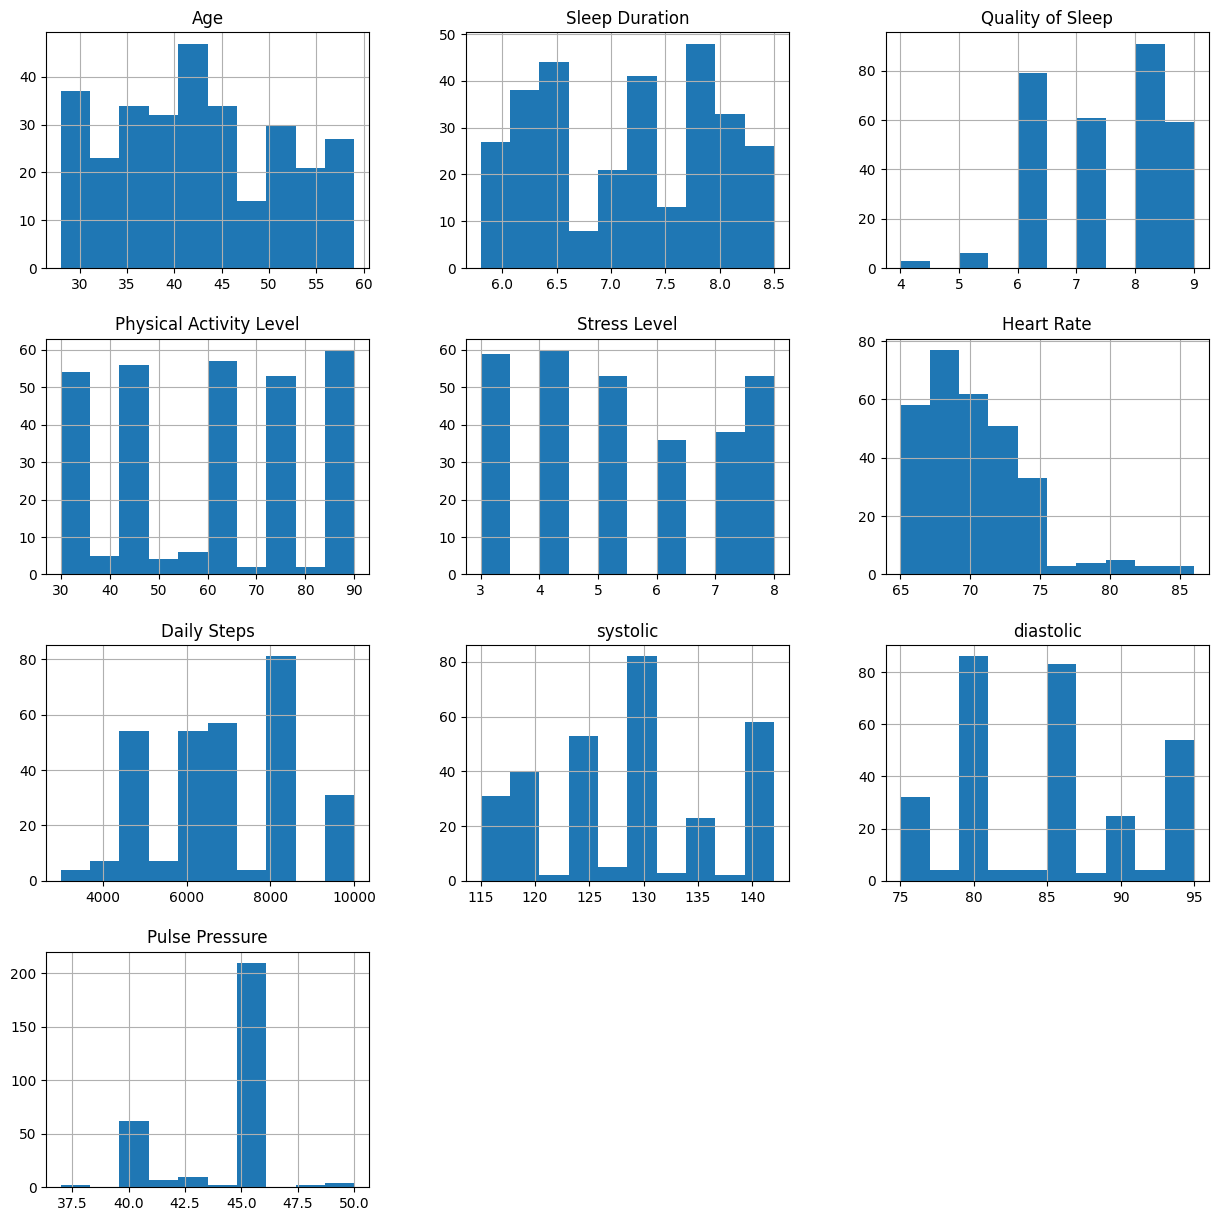

In [427]:
train_set[numericas].hist(figsize = (15,15))
plt.show()

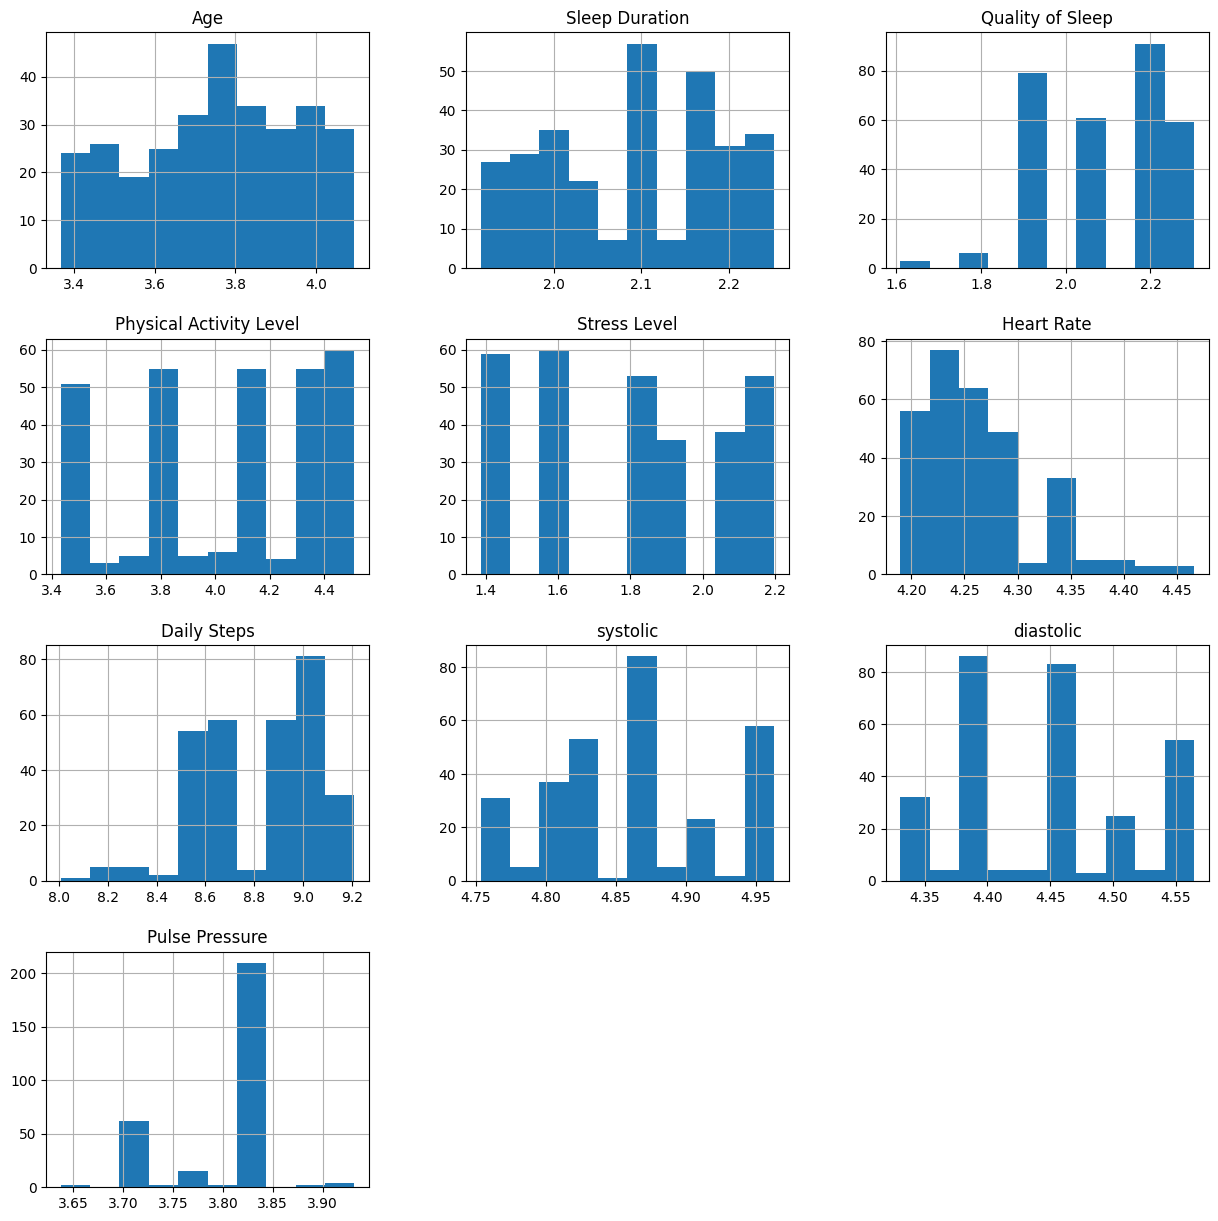

In [426]:
log = np.log1p(train_set[numericas])
log.hist(figsize=(15,15));

In [429]:
# No voy a pasarle el log. porque no veouna diferencia significativa

In [451]:
train_set.describe().T

count         mean          std     min     25%  \
Age                      299.0    42.521739     8.583699    28.0    36.0   
Sleep Duration           299.0     7.156187     0.788627     5.8     6.5   
Quality of Sleep         299.0     7.364548     1.183307     4.0     6.0   
Physical Activity Level  299.0    60.143813    20.818391    30.0    45.0   
Stress Level             299.0     5.311037     1.768548     3.0     4.0   
Heart Rate               299.0    70.056856     4.045892    65.0    68.0   
Daily Steps              299.0  6886.287625  1600.622550  3000.0  6000.0   
target                   299.0     0.411371     0.492907     0.0     0.0   
systolic                 299.0   128.528428     7.886040   115.0   125.0   
diastolic                299.0    84.682274     6.280046    75.0    80.0   
Pulse Pressure           299.0    43.846154     2.256179    37.0    43.0   
Gender_code              299.0     0.521739     0.500365     0.0     0.0   
BMI Category_code        299.0     0.421405     0.494612     0.0     0.0   
Accountant               299.0     0.107023     0.309661     0.0     0.0   
Doctor                   299.0     0.177258     0.382527     0.0     0.0   
Engineer                 299.0     0.177258     0.382527     0.0     0.0   
Lawyer                   299.0     0.120401     0.325976     0.0     0.0   
Manager                  299.0     0.003344     0.057831     0.0     0.0   
Nurse                    299.0     0.204013     0.403654     0.0     0.0   
Sales Representative     299.0     0.003344     0.057831     0.0     0.0   
Salesperson              299.0     0.073579     0.261522     0.0     0.0   
Scientist                299.0     0.013378     0.115079     0.0     0.0   
Software Engineer        299.0     0.006689     0.081649     0.0     0.0   
Teacher                  299.0     0.113712     0.317994     0.0     0.0   

                            50%     75%      max  
Age                        43.0    50.0     59.0  
Sleep Duration              7.2     7.8      8.5  
Quality of Sleep            8.0     8.0      9.0  
Physical Activity Level    60.0    75.0     90.0  
Stress Level                5.0     7.0      8.0  
Heart Rate                 70.0    72.0     86.0  
Daily Steps              7000.0  8000.0  10000.0  
target                      0.0     1.0      1.0  
systolic                  130.0   135.0    142.0  
diastolic                  85.0    90.0     95.0  
Pulse Pressure             45.0    45.0     50.0  
Gender_code                 1.0     1.0      1.0  
BMI Category_code           0.0     1.0      1.0  
Accountant                  0.0     0.0      1.0  
Doctor                      0.0     0.0      1.0  
Engineer                    0.0     0.0      1.0  
Lawyer                      0.0     0.0      1.0  
Manager                     0.0     0.0      1.0  
Nurse                       0.0     0.0      1.0  
Sales Representative        0.0     0.0      1.0  
Salesperson                 0.0     0.0      1.0  
Scientist                   0.0     0.0      1.0  
Software Engineer           0.0     0.0      1.0  
Teacher                     0.0     0.0      1.0

In [433]:
# hay algunas columnas que podrian dar pie a escalarlas como, 'Daily Steps', 'Physical Activity Level', 'Age', 'Heart Rate',
# 'systolic', 'diastolic' y 'Pulse Pressure'

In [95]:
# vamos a hacer las mismas transformaciones a los datos de test

In [45]:
test_set.rename(columns = {'Sleep Disorder':'target'}, inplace=True)
# vamos a separ la columna de 'blood pressure' y vamos a calcular la presion del pulso
test_set[['systolic','diastolic']] = test_set['Blood Pressure'].str.extract(r'(\d+)/(\d+)', expand=True)
test_set.drop(columns='Blood Pressure', inplace=True)
test_set['systolic'] = test_set['systolic'].astype(int)
test_set['diastolic'] = test_set['diastolic'].astype(int)
test_set['Pulse Pressure'] = test_set['systolic'] - test_set['diastolic']
# vamos a codificar esas features categoricas
test_set['Gender_code'] = test_set['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
# vamos a unir 'normal' con 'normal weight' y 'overweight' con 'obese' porque indican lo mismo
test_set['BMI Category'] = test_set['BMI Category'].map({'Normal Weight': 'Normal','Normal':'Normal', 'Overweight':'Overweight', 'Obese': 'Overweight'})
test_set['BMI Category_code'] = test_set['BMI Category'].apply(lambda x: 0 if x == 'Normal' else 1)
dummies_test = pd.get_dummies(test_set['Occupation']).astype(int)
test_set = pd.concat([test_set, dummies_test], axis = 1)

In [47]:
test_set.reset_index(inplace=True)

In [49]:
test_set.drop(columns = 'Person ID', inplace=True)

In [50]:
X_test = test_set.drop(columns = 'target')
y_test = test_set['target']

In [40]:
# vamos a mirar la selección de features a través de unos métodos
# antes separo entre X, y

In [51]:
features_todas = categoricas_int + numericas

In [52]:
X_train = train_set[features_todas]
y_train = train_set['target']

In [53]:
# SelectFromModel
r_forest = RandomForestClassifier(random_state = 42)

selector_model = SelectFromModel(estimator= r_forest, threshold='median')
selector_model.fit(X_train, y_train)
select_from_model = selector_model.get_feature_names_out().tolist()
select_from_model

['Nurse',
 'BMI Category_code',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'systolic',
 'diastolic',
 'Pulse Pressure']

In [54]:
# RFE
rfe = RFE(estimator= r_forest)
rfe.fit(X_train, y_train)
rfe.transform(X_train)
RFEv = rfe.get_feature_names_out().tolist()
RFEv

['Nurse',
 'BMI Category_code',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Daily Steps',
 'systolic',
 'diastolic',
 'Pulse Pressure']

In [55]:
# SFS
sfs = SequentialFeatureSelector(r_forest, scoring = 'recall')
sfs.fit(X_train, y_train)
SFS = sfs.get_feature_names_out().tolist()
SFS

['Gender_code',
 'Accountant',
 'Doctor',
 'Lawyer',
 'Manager',
 'Sales Representative',
 'Scientist',
 'Software Engineer',
 'systolic',
 'diastolic',
 'Pulse Pressure']

In [56]:
# hard-voting

features_hard_voting = select_from_model + RFEv + SFS
votos = Counter(features_hard_voting)
votos

Counter({'systolic': 3,
         'diastolic': 3,
         'Pulse Pressure': 3,
         'Nurse': 2,
         'BMI Category_code': 2,
         'Age': 2,
         'Sleep Duration': 2,
         'Quality of Sleep': 2,
         'Physical Activity Level': 2,
         'Stress Level': 2,
         'Daily Steps': 2,
         'Heart Rate': 1,
         'Gender_code': 1,
         'Accountant': 1,
         'Doctor': 1,
         'Lawyer': 1,
         'Manager': 1,
         'Sales Representative': 1,
         'Scientist': 1,
         'Software Engineer': 1})

In [57]:
seleccion = [x for x,y in votos.most_common(10)]
seleccion

['systolic',
 'diastolic',
 'Pulse Pressure',
 'Nurse',
 'BMI Category_code',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level']

In [58]:
# Feature importance

r_forest.fit(X_train, y_train)

importances = r_forest.feature_importances_
feature_names = X_train.columns

features_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
features_importance

BMI Category_code          0.205812
systolic                   0.157886
diastolic                  0.153397
Sleep Duration             0.114143
Age                        0.096102
Pulse Pressure             0.044842
Heart Rate                 0.035650
Stress Level               0.032224
Quality of Sleep           0.026335
Daily Steps                0.026041
Nurse                      0.022685
Physical Activity Level    0.022522
Engineer                   0.014721
Salesperson                0.010767
Lawyer                     0.010630
Teacher                    0.009199
Gender_code                0.008251
Doctor                     0.006553
Scientist                  0.001279
Accountant                 0.000657
Manager                    0.000286
Software Engineer          0.000017
Sales Representative       0.000000
dtype: float64

In [59]:
feature_importance = [x for x,y in features_importance.items() if y >= 0.01]

In [60]:
# LASSO
modelo = Lasso(alpha=0.01).fit(X_train, y_train)

importance = np.abs(modelo.coef_)
lasso_importance = pd.Series(importance, index=X_train.columns).sort_values(ascending=False)
lasso_importance

Salesperson                0.173104
Teacher                    0.125960
BMI Category_code          0.125956
Quality of Sleep           0.095569
Accountant                 0.071784
diastolic                  0.043793
Pulse Pressure             0.028068
Age                        0.012633
Heart Rate                 0.008819
Physical Activity Level    0.000984
Daily Steps                0.000045
Doctor                     0.000000
Gender_code                0.000000
Lawyer                     0.000000
Engineer                   0.000000
Nurse                      0.000000
Manager                    0.000000
Scientist                  0.000000
Software Engineer          0.000000
Sleep Duration             0.000000
Sales Representative       0.000000
Stress Level               0.000000
systolic                   0.000000
dtype: float64

In [61]:
lasso_import = [x for x,y in lasso_importance.items() if y >= 0.01]

In [52]:
# voy a preparar un diccionario para probar con diferentes features

In [53]:
# voy a probar de quitar algunas features que al principio generó duda de si serían útil o no

In [62]:
no_stress = [x for x in features_todas if x != 'Stress Level']

In [63]:
no_systolic = [x for x in features_todas if x != 'systolic']

In [64]:
no_diastolic = [x for x in features_todas if x != 'diastolic']

In [65]:
solo_pulse_pressure = [x for x in no_diastolic if x != 'systolic']

In [66]:
solo_diastolic = [x for x in no_systolic if x != 'Pulse Pressure']

In [67]:
solo_systolic = [x for x in no_diastolic if x != 'Pulse Pressure']

In [1198]:
posibles_features = {
    'todas' : features_todas,
    'SFM' : select_from_model,
    'RFE' : RFEv,
    'SFS' : SFS,
    'todas_no_stress' : no_stress,
    'todas_no_systolic' : no_systolic,
    'todas_no_diastolic' : no_diastolic,
    'solo_pulse_pressure' : solo_pulse_pressure,
    'solo_diastolic' : solo_diastolic,
    'solo_systolic' : solo_systolic,
    'hard voting':seleccion,
    'feature_importance': feature_importance,
    'lasso_import' : lasso_import
}

In [1199]:
X_train.iloc[:,:13].columns

Index(['Gender_code', 'Accountant', 'Doctor', 'Engineer', 'Lawyer', 'Manager',
       'Nurse', 'Sales Representative', 'Salesperson', 'Scientist',
       'Software Engineer', 'Teacher', 'BMI Category_code'],
      dtype='object')

In [586]:
# voy a pasar las features con tipo 'object' a catboost y lightgbm, tengo que modificar el diccionario de las features para poderlo hacer

In [70]:
cat_gbm = {
    'Gender_code': 'Gender',
    'Accountant' : 'Occupation',
    'Doctor' : 'Occupation',
    'Engineer' :'Occupation',
    'Lawyer' : 'Occupation',
    'Manager' : 'Occupation',
    'Nurse' : 'Occupation',
    'Sales Representative' : 'Occupation',
    'Salesperson' : 'Occupation',
    'Scientist' : 'Occupation',
    'Software Engineer' : 'Occupation',
    'Teacher' : 'Occupation',
    'BMI Category_code': 'BMI Category'
}

In [585]:
# aquí soluciono y creo un nuevo diccionario con las numericas y las categoricas de tipo 'object'

In [71]:
dict_features_cat_gbm = {}
for x,y in posibles_features.items():
    lista = []
    for a in y:
        if a in cat_gbm:
            lista.append(cat_gbm[a])
        else: 
            lista.append(a)
    dict_features_cat_gbm[x] = list(set(lista))

In [588]:
# vamos a comparar unos cuantos modelos con diferentes features

In [72]:
scaler = StandardScaler()

In [1200]:
#Instanciamos los modelos
rforest = RandomForestClassifier(random_state= 42)
xgb = XGBClassifier(verbosity = 0, random_state= 42)
lgb = LGBMClassifier(verbose = -1, random_state= 42)
gradient = GradientBoostingClassifier(random_state= 42)
cat= CatBoostClassifier(verbose = False, random_state= 42)
tree = DecisionTreeClassifier(random_state= 42)
linear = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()

#instanciamos el escalador para los modelos sensibles a la escala
scaler = StandardScaler()

# cremos un diccionario con todos los modelos
modelos = {
    'random forest' : rforest,
    'xgboost' : xgb,
    'light gbm' : lgb,
    'gradient' : gradient,
    'cat':cat,
    'tree':tree,
    'linear':linear,
    'knn': knn,
    'svc': svc
}

# asignamos las features con tipo 'category' para los modelos de catboost y lightgbm que aceptan este tipo de variables
categoricas = ['Gender', 'Occupation', 'BMI Category']

# vamos a hacer un bucle que depende del modelo se haraán unas cosas u otras y todo se guarda en un diccionario para visualizarlo en un dataframe
resultados = []
for nombre, modelo in modelos.items():
    if nombre in ['linear','knn', 'svc']:
        for clave, valor in posibles_features.items():
            X_train_escalado = scaler.fit_transform(X_train[valor])
            cross = cross_validate(modelo, X_train_escalado, y_train, cv = 5 , scoring = ['recall', 'f1', 'roc_auc'])
            resultados.append({
                'modelo': nombre,
                'metodo seleccion features' : clave,
                'recall' : np.mean(cross['test_recall']),
                'f1' : np.mean(cross['test_f1']),
                'roc_auc' : np.mean(cross['test_roc_auc'])
            })
            
    elif nombre == 'light gbm':
        for clave, valor in dict_features_cat_gbm.items():
            category = [x for x in categoricas if x in valor] # selecciona las categoricas que usamos en este momento para asignarlas al modelo
            lgb_2 = LGBMClassifier(verbose = -1, random_state= 42, categorical_feature=category) # aqui se le informa cuales son de tipo 'category'
            cross = cross_validate(lgb_2, train_set[valor], y_train, cv = 5 , scoring = ['recall', 'f1', 'roc_auc'])
            resultados.append({
                'modelo': 'lgb',
                'metodo seleccion features' : clave,
                'recall' : np.mean(cross['test_recall']),
                'f1' : np.mean(cross['test_f1']),
                'roc_auc' : np.mean(cross['test_roc_auc'])
            })
                
    elif nombre == 'cat':
        for clave, valor in dict_features_cat_gbm.items():
            category = [x for x in categoricas if x in valor]
            cat_2= CatBoostClassifier(verbose = False, random_state= 42, cat_features= category)
            cross = cross_validate(cat_2, train_set[valor], y_train, cv = 5 , scoring = ['recall', 'f1', 'roc_auc'])
            resultados.append({
                'modelo': 'cat',
                'metodo seleccion features' : clave,
                'recall' : np.mean(cross['test_recall']),
                'f1' : np.mean(cross['test_f1']),
                'roc_auc' : np.mean(cross['test_roc_auc'])
            })
                
    else:
        for clave, valor in posibles_features.items():
            cross = cross_validate(modelo, train_set[valor], y_train, cv = 5 , scoring = ['recall', 'f1', 'roc_auc'])
            resultados.append({
                'modelo': nombre,
                'metodo seleccion features' : clave,
                'recall' : np.mean(cross['test_recall']),
                'f1' : np.mean(cross['test_f1']),
                'roc_auc' : np.mean(cross['test_roc_auc'])
            })       

In [1201]:
resultado_baseline = pd.DataFrame(resultados).sort_values(by= 'recall', ascending=False)

In [1202]:
pd.set_option('display.max_rows', None)

In [655]:
# vamos a ver los resultados que tenemos con un filtrado para así ser más selectivo

In [1203]:
resultado_baseline.loc[(resultado_baseline['recall'] > 0.91) & (resultado_baseline['roc_auc'] > 0.9) & (resultado_baseline['metodo seleccion features'] != 'SFS')]

modelo metodo seleccion features  recall        f1   roc_auc
27             lgb                       SFM   0.919  0.918357  0.904151
36             lgb        feature_importance   0.919  0.918357  0.904151
40        gradient                       RFE   0.919  0.918357  0.906073
39        gradient                       SFM   0.919  0.918357  0.907643
38        gradient                     todas   0.919  0.918357  0.902390
37             lgb              lasso_import   0.919  0.915506  0.902562
34             lgb            solo_diastolic   0.919  0.918357  0.904945
28             lgb                       RFE   0.919  0.918357  0.903104
30             lgb           todas_no_stress   0.919  0.918357  0.903251
31             lgb         todas_no_systolic   0.919  0.918357  0.903707
26             lgb                     todas   0.919  0.918357  0.903904
25         xgboost              lasso_import   0.919  0.922229  0.901012
42        gradient           todas_no_stress   0.919  0.918357  0.902619
33             lgb       solo_pulse_pressure   0.919  0.914587  0.902948
47        gradient             solo_systolic   0.919  0.918357  0.903549
44        gradient        todas_no_diastolic   0.919  0.918357  0.904012
50        gradient              lasso_import   0.919  0.926000  0.912129
49        gradient        feature_importance   0.919  0.918357  0.903174
43        gradient         todas_no_systolic   0.919  0.918357  0.902164
62             cat              lasso_import   0.919  0.915506  0.908211
80          linear           todas_no_stress   0.919  0.908014  0.907932
84          linear            solo_diastolic   0.919  0.897229  0.911371
85          linear             solo_systolic   0.919  0.908463  0.912108
104            svc                       RFE   0.919  0.922408  0.931728
113            svc        feature_importance   0.919  0.915685  0.924351
112            svc               hard voting   0.919  0.922408  0.932678
103            svc                       SFM   0.919  0.922408  0.934951
75            tree              lasso_import   0.919  0.926000  0.923033
55             cat           todas_no_stress   0.919  0.922229  0.907009
81          linear         todas_no_systolic   0.919  0.904563  0.910913
76          linear                     todas   0.919  0.908014  0.909304
82          linear        todas_no_diastolic   0.919  0.908463  0.912584
60             cat             solo_systolic   0.919  0.918637  0.906052
61             cat        feature_importance   0.919  0.922229  0.905350
59             cat            solo_diastolic   0.919  0.911914  0.908140
52             cat                       SFM   0.919  0.922229  0.905350
58             cat       solo_pulse_pressure   0.919  0.918637  0.904001
56             cat         todas_no_systolic   0.919  0.911914  0.903324
57             cat        todas_no_diastolic   0.919  0.922229  0.904461
51             cat                     todas   0.919  0.922229  0.906299
53             cat                       RFE   0.919  0.915506  0.904007
21         xgboost            solo_diastolic   0.919  0.904272  0.900884
13         xgboost                     todas   0.911  0.913595  0.903443
12   random forest              lasso_import   0.911  0.921238  0.908704
14         xgboost                       SFM   0.911  0.913595  0.902362
17         xgboost           todas_no_stress   0.911  0.913595  0.901431
15         xgboost                       RFE   0.911  0.913595  0.902472
23         xgboost               hard voting   0.911  0.913595  0.901205
22         xgboost             solo_systolic   0.911  0.913595  0.903186
24         xgboost        feature_importance   0.911  0.913595  0.901884
19         xgboost        todas_no_diastolic   0.911  0.913595  0.903303
90             knn                       SFM   0.911  0.899566  0.914371
83          linear       solo_pulse_pressure   0.911  0.896115  0.904486
35             lgb             solo_systolic   0.911  0.913595  0.9048

In [1204]:
pd.reset_option('display.max_rows')

In [657]:
#despues de mirar los resultados y features, voy a escoger como principal el modelo 'SVR' con seleccion de features por 'SFM', tiene un recall 
# de 0.91, y un roc_auc muy alto, también haré pruebas con algún modelo más cómo CatBoost o XGBoost, ya que han salido buenas metricas

In [658]:
# esta es la selección de lo que voy a probar con hiperparámetros

In [681]:
# aunque para CatBoost me selecciona CatBoost con las mismas feautres que otro modelo que usa escalado... son dos diccionarios diferentes de
# features, pero tienen el mismo nombre

|Modelo|Features|Recall|F1|roc_auc|
|-|-|-|-|-|
97	|SVC|SFM|0.919|0.922|0.934|
98	|SVC|RFE|0.919|0.922|0.931|
50	|CatBoost|RFE|0.919|0.922|0.905|
54	|CatBoost|todas_no_diastolic|0.919|0.922|0.906|
49	|CatBoost|SFM|0.919|0.922|0.905|
23	|XGBoost|lasso_import|0.919|0.922|0.901|
58	|CatBoost|feature_importance|0.919|0.922|0.905|

In [660]:
# Voy a revisar las features seleccionadas y ver si ofrecen el mínimo para predecir si tienes mal sueño o no

In [48]:
train_set[RFEv].head(1)

Nurse  BMI Category_code  Age  Sleep Duration  Quality of Sleep  \
0      0                  1   43             6.5                 6   

   Physical Activity Level  Stress Level  Daily Steps  systolic  diastolic  \
0                       45             7         6000       130         85   

   Pulse Pressure  
0              45

In [667]:
# esta parece una buena opción, salen features de interés que van relacionadas con el sueño, además, aparece 'Nurse' que en el EDA salía
# con diferencia que las personas 'Nurse' tenían más estrés

In [662]:
train_set[select_from_model].head(1)

Nurse  BMI Category_code  Age  Sleep Duration  Quality of Sleep  \
0      0                  1   43             6.5                 6   

   Physical Activity Level  Stress Level  Heart Rate  Daily Steps  systolic  \
0                       45             7          72         6000       130   

   diastolic  Pulse Pressure  
0         85              45

In [668]:
# estas es igual que arriba y además con el 'heart rate', interesanté selección

In [663]:
train_set[lasso_import].head(1)

Salesperson  Teacher  BMI Category_code  Quality of Sleep  Accountant  \
0            1        0                  1                 6           0   

   diastolic  Pulse Pressure  Age  
0         85              45   43

In [669]:
# estas no aportan mucho, no hay información para saber si tienes mal sueño o no

In [665]:
train_set[feature_importance].head(1)

BMI Category_code  systolic  diastolic  Sleep Duration  Age  \
0                  1       130         85             6.5   43   

   Pulse Pressure  Heart Rate  Stress Level  Quality of Sleep  Daily Steps  \
0              45          72             7                 6         6000   

   Nurse  Physical Activity Level  Engineer  Salesperson  Lawyer  
0      0                       45         0            1       0

In [670]:
# esta, no es de las peores, pero incluyen tres profesiones que en el EDA no destacaban por su estrés

In [664]:
train_set[no_diastolic].head(1)

Gender_code  Accountant  Doctor  Engineer  Lawyer  Manager  Nurse  \
0            0           0       0         0       0        0      0   

   Sales Representative  Salesperson  Scientist  Software Engineer  Teacher  \
0                     0            1          0                  0        0   

   BMI Category_code  Age  Sleep Duration  Quality of Sleep  \
0                  1   43             6.5                 6   

   Physical Activity Level  Stress Level  Heart Rate  Daily Steps  systolic  \
0                       45             7          72         6000       130   

   Pulse Pressure  
0              45

In [671]:
# está salen todas las profesiones, no es interesante

In [675]:
# después de ver las selecciones, voy a probar con la primera y la segunda, aunque la definitiva puede ser la segunda opción
# van a ser con dos modelos (SVC, CatBoost), cada uno probando las dos opciones, ya son los modelos mejor seleccionados

In [676]:
# vamos a correr los modelos con hiperparámetros

In [75]:
trainX = train_set[RFEv]

In [159]:
trainX_2 = train_set[select_from_model]

In [1070]:
escalado = scaler.fit_transform(trainX)

In [1071]:
svc = SVC()

param_grid_svc = {
    'C': [0.1, 1],          
    'kernel': ['linear', 'rbf'],    
    'gamma': ['scale', 'auto']
}

grid_svc = GridSearchCV(
    svc, 
    param_grid_svc, 
    cv=5, scoring='recall', 
    n_jobs=-1
    )

grid_svc.fit(escalado, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='recall')

In [1072]:
escalado_test = scaler.transform(X_test[RFEv])

In [1073]:
y_pred1 = grid_gb.best_estimator_.predict(escalado_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.09      0.07      0.08        43
           1       0.07      0.09      0.08        32

    accuracy                           0.08        75
   macro avg       0.08      0.08      0.08        75
weighted avg       0.08      0.08      0.08        75



In [1074]:
#voy a probar con otros modelos que tenian buenos valores también, este modelo no será el mejor para solucionar este problema

In [163]:
# voy a probar diferentes modelos que iremos viendo y con dos tipos de conjunto de features

In [164]:
# GradientBoosting 1

gb = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 250,300],
    'learning_rate': [0.01,0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0, 1.1],
    'min_samples_split': [2,3,4]
}

grid_gb = GridSearchCV(
    gb, 
    param_grid_gb, 
    cv=5, scoring='recall', 
    n_jobs=-1, 
    verbose=1)

grid_gb.fit(trainX, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 250, 300],
                         'subsample': [0.8, 1.0, 1.1]},
             scoring='recall', verbose=1)

In [165]:
grid_gb.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 250,
 'subsample': 1.0}

In [166]:
y_pred1 = grid_gb.best_estimator_.predict(X_test[RFEv])
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [167]:
# GradientBoosting 2

gb2 = GradientBoostingClassifier(random_state=42)
param_grid_gb2 = {
    'n_estimators': [100, 200, 250,300],
    'learning_rate': [0.01,0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0, 1.1],
    'min_samples_split': [2,3,4]
}

grid_gb2 = GridSearchCV(
    gb2, 
    param_grid_gb2, 
    cv=5, scoring='recall', 
    n_jobs=-1, 
    verbose=1)

grid_gb2.fit(trainX_2, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 250, 300],
                         'subsample': [0.8, 1.0, 1.1]},
             scoring='recall', verbose=1)

In [168]:
grid_gb2.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.8}

In [169]:
y_pred1_2 = grid_gb2.best_estimator_.predict(X_test[select_from_model])
print(classification_report(y_test, y_pred1_2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



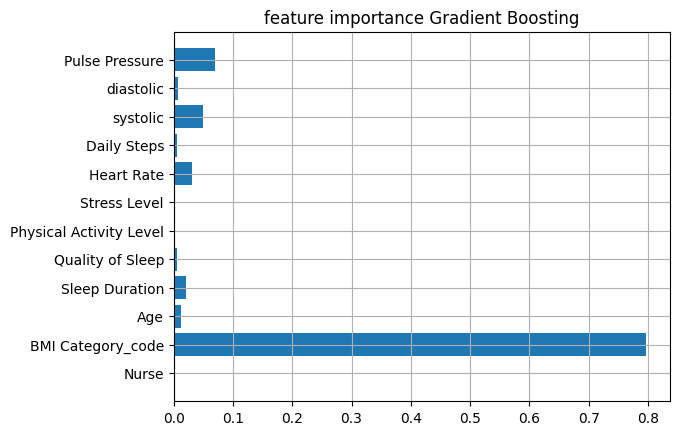

In [217]:
gb2.fit(trainX_2, y_train)
plt.barh(trainX_2.columns,gb2.feature_importances_)
plt.title('feature importance Gradient Boosting')
plt.grid(True);

In [170]:
# XGB

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [2,3,4, 5],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.6,0.7,0.8, 1]
}

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_xgb.fit(trainX, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='recall', verbose=1)

In [171]:
grid_xgb.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.7}

In [172]:
y_pred2 = grid_xgb.best_estimator_.predict(X_test[RFEv])
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [173]:
# XGB

xgb2 = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb2 = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [2,3,4, 5],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.6,0.7,0.8, 1]
}

grid_xgb2 = GridSearchCV(xgb2, param_grid_xgb2, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_xgb2.fit(trainX_2, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='recall', verbose=1)

In [174]:
grid_xgb2.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 100,
 'subsample': 0.7}

In [175]:
y_pred2_2 = grid_xgb2.best_estimator_.predict(X_test[select_from_model])
print(classification_report(y_test, y_pred2_2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



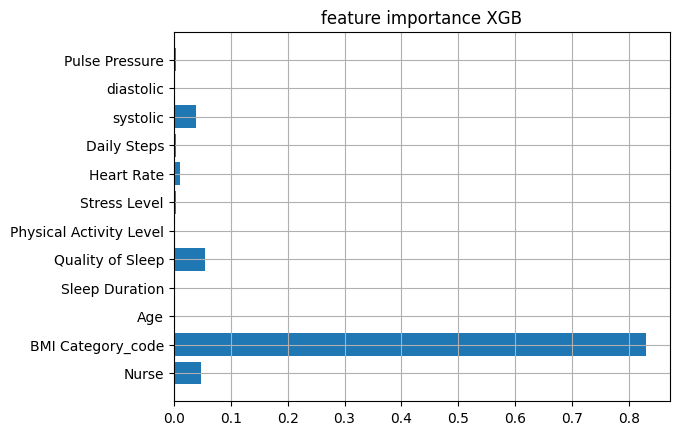

In [213]:
xgb2.fit(trainX_2, y_train)
plt.barh(trainX_2.columns,xgb2.feature_importances_)
plt.title('feature importance XGB')
plt.grid(True);

In [176]:
# LGBM

lgb = LGBMClassifier(random_state=42, verbose=-1)
param_grid_lgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1,0.2,0.3],
    'num_leaves': [11,12,15,16],
    'max_depth': [2,3,5],
    'subsample': [0.7,0.8,0.9, 1]
}

grid_lgb = GridSearchCV(lgb, param_grid_lgb, cv=5, scoring='recall', n_jobs=-1)
grid_lgb.fit(trainX, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42, verbose=-1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 5], 'n_estimators': [100, 200],
                         'num_leaves': [11, 12, 15, 16],
                         'subsample': [0.7, 0.8, 0.9, 1]},
             scoring='recall')

In [177]:
grid_lgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 100,
 'num_leaves': 11,
 'subsample': 0.7}

In [178]:
y_pred3 = grid_lgb.best_estimator_.predict(X_test[RFEv])
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [179]:
# LGBM

lgb2 = LGBMClassifier(random_state=42, verbose=-1)
param_grid_lgb2 = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1,0.2,0.3],
    'num_leaves': [11,12,15,16],
    'max_depth': [2,3,5],
    'subsample': [0.7,0.8,0.9, 1]
}

grid_lgb2 = GridSearchCV(lgb2, param_grid_lgb2, cv=5, scoring='recall', n_jobs=-1)
grid_lgb2.fit(trainX_2, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42, verbose=-1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 5], 'n_estimators': [100, 200],
                         'num_leaves': [11, 12, 15, 16],
                         'subsample': [0.7, 0.8, 0.9, 1]},
             scoring='recall')

In [180]:
grid_lgb2.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 100,
 'num_leaves': 11,
 'subsample': 0.7}

In [181]:
y_pred3_2 = grid_lgb2.best_estimator_.predict(X_test[select_from_model])
print(classification_report(y_test, y_pred3_2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



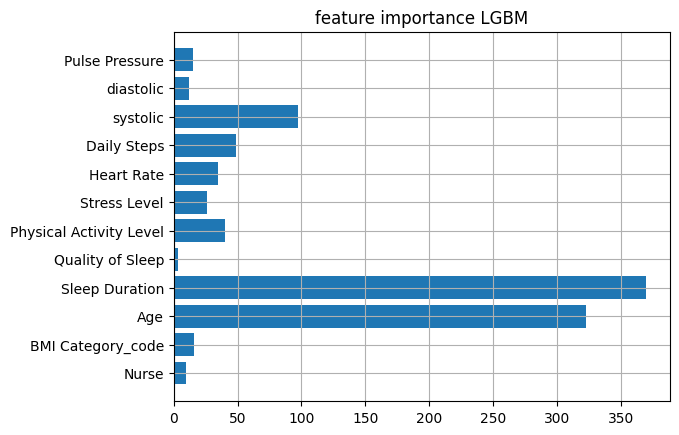

In [215]:
lgb2.fit(trainX_2, y_train)
plt.barh(trainX_2.columns,lgb2.feature_importances_)
plt.title('feature importance LGBM')
plt.grid(True);

In [182]:
# LogisticRegression

logreg = LogisticRegression(solver='saga', max_iter=10000,  random_state=42)
param_grid_log = {
    'C': [0.01,0.1,0.2,0.3, 1],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0, 0.5, 1]  # solo usado si penalty='elasticnet'
}

grid_log = GridSearchCV(logreg, param_grid_log, cv=10, scoring='recall', n_jobs=-1, verbose=1)
grid_log.fit(trainX, y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, random_state=42,
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.2, 0.3, 1], 'l1_ratio': [0, 0.5, 1],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall', verbose=1)

In [183]:
grid_log.best_params_

{'C': 0.01, 'l1_ratio': 0, 'penalty': 'l2'}

In [184]:
y_pred4 = grid_log.best_estimator_.predict(X_test[RFEv])
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72        43
           1       0.62      0.41      0.49        32

    accuracy                           0.64        75
   macro avg       0.63      0.61      0.61        75
weighted avg       0.64      0.64      0.62        75



In [218]:
# logistic regression no le voy a dar mas juego, tengo otros con resultados mejores

In [188]:
# CatBoostClassifier

cat = CatBoostClassifier(verbose=0,  random_state=42)
param_grid_cat = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1,0.2,0.3],
    'depth': [3,4,5, 6],
    'l2_leaf_reg': [1, 2, 3]
}

grid_cat = GridSearchCV(cat, param_grid_cat, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_cat.fit(trainX, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000020058AD2AA0>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 2, 3],
                         'learning_rate': [0.1, 0.2, 0.3]},
             scoring='recall', verbose=1)

In [189]:
grid_cat.best_params_

{'depth': 3, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [190]:
y_pred5 = grid_cat.best_estimator_.predict(X_test[RFEv])
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [191]:
# CatBoostClassifier

cat2 = CatBoostClassifier(verbose=0,  random_state=42)
param_grid_cat2 = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1,0.2,0.3],
    'depth': [3,4,5, 6],
    'l2_leaf_reg': [1, 2, 3]
}

grid_cat2 = GridSearchCV(cat2, param_grid_cat2, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_cat2.fit(trainX_2, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000020058AD3DF0>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 2, 3],
                         'learning_rate': [0.1, 0.2, 0.3]},
             scoring='recall', verbose=1)

In [192]:
grid_cat2.best_params_

{'depth': 3, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [193]:
y_pred5_2 = grid_cat2.best_estimator_.predict(X_test[select_from_model])
print(classification_report(y_test, y_pred5_2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



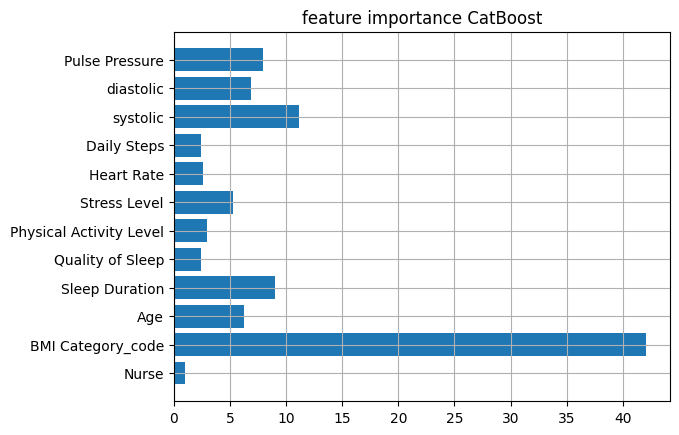

In [219]:
cat2.fit(trainX_2, y_train)
plt.barh(trainX_2.columns,cat2.feature_importances_)
plt.title('feature importance CatBoost')
plt.grid(True);

In [194]:
# RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200,300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    rf,
    param_grid_rf,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)
grid_rf.fit(trainX, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=1)

In [195]:
grid_rf.best_params_

{'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [196]:
y_pred6 = grid_rf.best_estimator_.predict(X_test[RFEv])
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [253]:
# Modelo elegido para la primera fase, clasificar si tienes problema del sueño o no

In [1206]:
lista_num = select_from_model + [target]

In [1207]:
for x in lista_num:
    grupo_a = train_set.loc[train_set.target == 0][x]
    grupo_b = train_set.loc[train_set.target == 1][x]
    u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
    print('-',x,'-')
    print("Estadístico U:", u_stat)
    print("Valor p:", p_valor)

    if p_valor < 0.05:
        print('Hay diferencia estadísticamente significativa')
    else:
        print('No hay diferencia suficiente')
    print('------------------------------')

- Nurse -
Estadístico U: 6801.5
Valor p: 4.770633582427406e-15
Hay diferencia estadísticamente significativa
------------------------------
- BMI Category_code -
Estadístico U: 2128.0
Valor p: 1.9243671628516113e-43
Hay diferencia estadísticamente significativa
------------------------------
- Age -
Estadístico U: 5137.5
Valor p: 1.0056724569177982e-14
Hay diferencia estadísticamente significativa
------------------------------
- Sleep Duration -
Estadístico U: 15014.0
Valor p: 1.16775103569525e-08
Hay diferencia estadísticamente significativa
------------------------------
- Quality of Sleep -
Estadístico U: 14700.0
Valor p: 5.277403177210805e-08
Hay diferencia estadísticamente significativa
------------------------------
- Physical Activity Level -
Estadístico U: 10221.5
Valor p: 0.4061957203875094
No hay diferencia suficiente
------------------------------
- Stress Level -
Estadístico U: 8682.5
Valor p: 0.003116433630214749
Hay diferencia estadísticamente significativa
-------------

In [1208]:
# Todas las features menos dos tienen diferencia estadísticamente significativa, aun así, esas dos, que son, Physical Activity Level y Daily Steps
# las voy a dejar porque son importantes para la salud el deporte

In [1004]:
# RandomForestClassifier

rf2 = RandomForestClassifier(random_state=42)
param_grid_rf2 = {
    'n_estimators': [100, 200,300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf2 = GridSearchCV(
    rf2,
    param_grid_rf2,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)
grid_rf2.fit(trainX_2, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=1)

In [1006]:
modelo1_mejores_params = grid_rf2.best_params_

In [200]:
grid_rf2.best_params_

{'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [201]:
y_pred6_2 = grid_rf2.best_estimator_.predict(X_test[select_from_model])
print(classification_report(y_test, y_pred6_2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



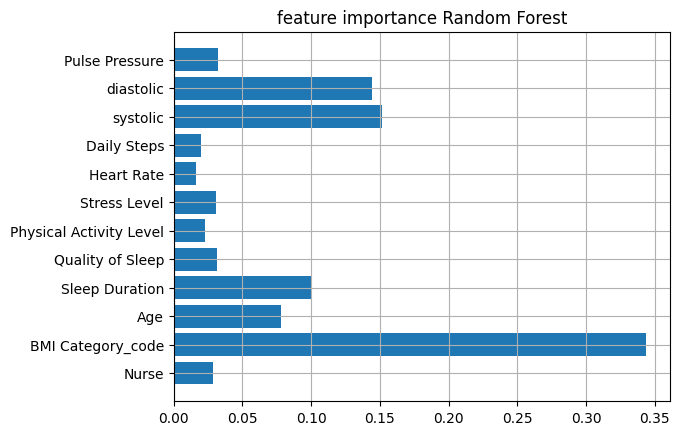

In [220]:
rf2.fit(trainX_2, y_train)
plt.barh(trainX_2.columns,rf2.feature_importances_)
plt.title('feature importance Random Forest')
plt.grid(True);

In [231]:
# se va a usar el dataset con el 'Heart Rate' ya que se ve que es un poco importante
# visualizando los graficos de feature importances, he visto que los mejores para descartar por la distribucion de imoprtancia de features son:
# LGBM, CatBoost y RandomForest

In [232]:
# voy a ver los tres gráficos juntos y decidir un modelo

In [225]:
modelos = {'LGBM':lgb2,
          'CatBoost':cat2,
          'Random Forest': rf2}

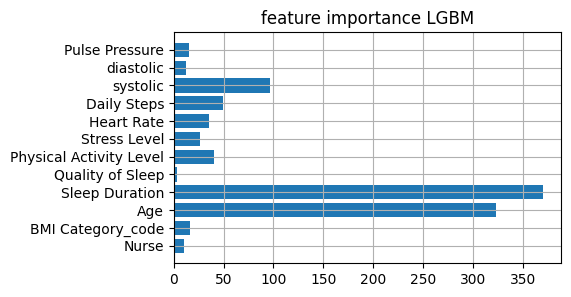

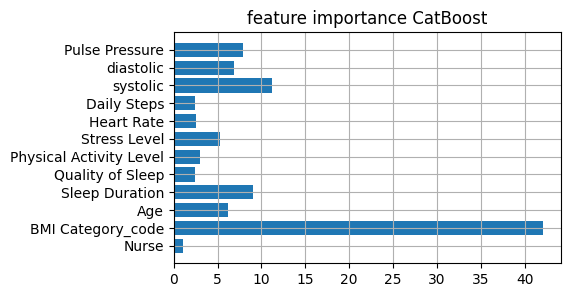

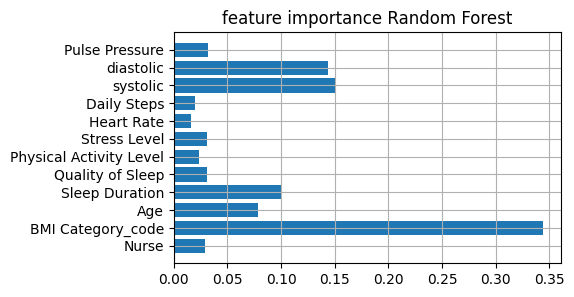

In [230]:
for nombre, modelo in modelos.items():
    plt.figure(figsize=(5,3))
    train = modelo.fit(trainX_2, y_train)
    plt.barh(trainX_2.columns, train.feature_importances_)
    plt.title(f'feature importance {nombre}')
    plt.grid(True)

In [246]:
# observando los gráfico voy a usar random forest porque distribuye mejor la importancia de las features en el modelo

In [202]:
# Todos los modelos han sido probados con diferente valor de CV, con valor 5 es el que mejor funciona

In [248]:
# vamos a observar la matriz de confusión con los datos del RandomForest

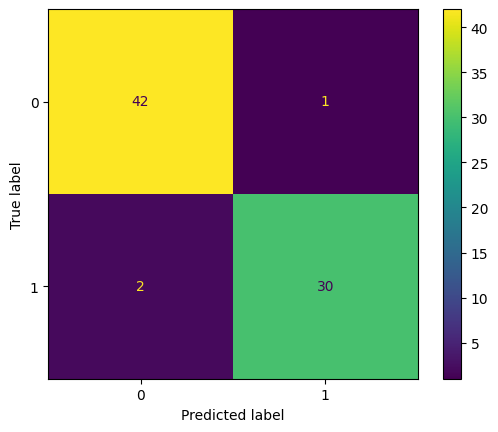

In [249]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred6_2);

In [860]:
trainX_2.columns

Index(['Nurse', 'BMI Category_code', 'Age', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'Heart Rate', 'Daily Steps', 'systolic', 'diastolic', 'Pulse Pressure'],
      dtype='object')

In [338]:
# Nos indica que ha clasificado a 42 sin problema de sueño que no tienen problema y a 1 que tiene problema del sueño que realmente no tiene
# para los que tienen problema de sueño a clasificado 30 como que tienen problemas y a 2 que no tienen y realmente si tienen problema de sueño 
# nos quedamos con Random Forest

In [1062]:
# ahora voy a hacer un Pipeline para la tranformacion de datos y guardar el modelo y el pipeline

In [938]:
columnas = trainX_2.columns.tolist()

In [1040]:
dataset = pd.read_csv('../data/Sleep_Health_and_Lifestyle.csv')

In [1041]:
dataset.drop(columns='Person ID', inplace=True)
dataset.drop(columns='Gender', inplace=True)
dataset['Sleep Disorder'] = dataset['Sleep Disorder'].fillna('NaN')
mapeo = {'NaN':0, 'Sleep Apnea':1, 'Insomnia':1}
dataset['Sleep Disorder'] = dataset['Sleep Disorder'].map(mapeo)
dataset.rename(columns={'Sleep Disorder':'target'}, inplace=True)
dataset[['systolic','diastolic']] = dataset['Blood Pressure'].str.extract(r'(\d+)/(\d+)', expand=True)
dataset.drop(columns='Blood Pressure', inplace=True)
dataset['systolic'] = dataset['systolic'].astype(int)
dataset['diastolic'] = dataset['diastolic'].astype(int)
dataset['BMI Category'] = dataset['BMI Category'].map({'Normal Weight': 'Normal','Normal':'Normal', 'Overweight':'Overweight', 'Obese': 'Overweight'})
dummies_test = pd.get_dummies(dataset['Occupation']).astype(int)
dataset = pd.concat([dataset, dummies_test], axis = 1)
dataset['BMI Category'] = dataset['BMI Category'].apply(lambda x: 0 if x == 'Normal' else 1)
dataset['Pulse Pressure'] = dataset['systolic'] - dataset['diastolic']

In [997]:
profesiones = ['Occupation','Accountant','Doctor','Engineer','Lawyer','Manager','Sales Representative','Salesperson','Scientist','Software Engineer','Teacher'] 

In [998]:
cols = [x for x in dataset.columns if x not in profesiones]

In [1036]:
cols = cols + ['Pulse Pressure']

In [1043]:
dataset[cols].head(5)

Age  BMI Category  Daily Steps  Heart Rate  Nurse  Physical Activity Level  \
0   27             1         4200          77      0                       42   
1   28             0        10000          75      0                       60   
2   28             0        10000          75      0                       60   
3   28             1         3000          85      0                       30   
4   28             1         3000          85      0                       30   

   Quality of Sleep  Sleep Duration  Stress Level  diastolic  systolic  \
0                 6             6.1             6         83       126   
1                 6             6.2             8         80       125   
2                 6             6.2             8         80       125   
3                 4             5.9             8         90       140   
4                 4             5.9             8         90       140   

   target  Pulse Pressure  
0       0              43  
1       0              45  
2       0              45  
3       1              50  
4       1              50

In [1048]:
X_t = dataset[cols].drop(columns='target')
y_t = dataset[cols]['target']

In [1046]:
# vamos a hacer pipeline

In [1264]:
def bmi(X):
    X = X.copy()
    X['bmi'] = X['peso'] / (X['altura'] ** 2)
    return X

def bmi_clasificador(X):
    X = X.copy()
    X['BMI Category'] = (X['bmi'] >= 25.0).astype(int)
    return X[['BMI Category']]

def Pulse_Pressure(X):
    X = X.copy()
    X['Pulse Pressure'] = X['systolic'] - X['diastolic']
    return X

def nurse_func(X):
    return (X == 'Sí').astype(int)
    
# primero metemos en pipeline estos dos pasos, porque primero va un paso del calculo y luego codificarla a 0 o 1
bmi_1 = FunctionTransformer(bmi)
bmi_2 = FunctionTransformer(bmi_clasificador)

pipeline_bmi = Pipeline([
    ('bmi_num', bmi_1),
    ('bmi_code', bmi_2)
])
#para pulso solo hay un paso
pulso = FunctionTransformer(Pulse_Pressure)
nurse = FunctionTransformer(nurse_func)

# metemos todo en el columntransformer para que se hagan los cambios
preprocessor = ColumnTransformer(
    transformers=[
        ('bmi', pipeline_bmi, ['peso', 'altura']),
        ('pulse_pressure', pulso, ['systolic', 'diastolic']),
        ('nurse', nurse, ['Nurse'])
    ],
    remainder='passthrough'
)
# paso el passthrough_transformer con 'systolic', 'diastolic' para que aparezcan también en el dataset para el modelo
# el remainder se pone en 'passthrough' para que no afecte al resto de columnas

# este es el pipeline con todo dentro
pipeline1 = Pipeline([
    ('preprocessor', preprocessor)
])

In [1265]:
# voy a simular la entrada de datos de un cliente para hacer fit al pipeline

In [1159]:
dataset[cols].head(1)

Age  BMI Category  Daily Steps  Heart Rate  Nurse  Physical Activity Level  \
0   27             1         4200          77      0                       42   

   Quality of Sleep  Sleep Duration  Stress Level  diastolic  systolic  \
0                 6             6.1             6         83       126   

   target  Pulse Pressure  
0       0              43

In [1243]:
pipe_1 = pd.DataFrame({
                'Nurse':'Sí',
                'Age':27,
                'Sleep Duration':6.1,
                'Quality of Sleep':6,
                'Physical Activity Level': 42,
                'Stress Level':6,
                'Heart Rate':77,
                'Daily Steps':4200,
                'systolic':126,
                'diastolic':83,
                'peso':70,
                'altura':1.80
}, index = dataset[cols].index)

In [1244]:
pipe_1 = pipe_1.iloc[[0]]

In [1266]:
pipeline1.fit(pipe_1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('bmi',
                                                  Pipeline(steps=[('bmi_num',
                                                                   FunctionTransformer(func=<function bmi at 0x00000200643F8EE0>)),
                                                                  ('bmi_code',
                                                                   FunctionTransformer(func=<function bmi_clasificador at 0x00000200643F8E50>))]),
                                                  ['peso', 'altura']),
                                                 ('pulse_pressure',
                                                  FunctionTransformer(func=<function Pulse_Pressure at 0x00000200643FB910>),
                                                  ['systolic', 'diastolic']),
                                                 ('nurse',
                                                  FunctionTransformer(func=<function nurse_func at 0x00000200643F8160>),
                                                  ['Nurse'])]))])

In [1246]:
pipeline1.transform(pipe_1)

array([[0.00e+00, 1.26e+02, 8.30e+01, 4.30e+01, 1.00e+00, 2.70e+01,
        6.10e+00, 6.00e+00, 4.20e+01, 6.00e+00, 7.70e+01, 4.20e+03]])

In [1261]:
# ponemos el modelo con los mejores hiperparametros
modelo = RandomForestClassifier(random_state=42, **modelo1_mejores_params)
# vamos a entrenar el modelo para que ya esté entrenado
# se entrenan con estos datos que tenemos aquí y el pipeline se usará para transofrmar columnas cuando los clientes nos introduzcan sus datos
modelo.fit(X_t, y_t)

RandomForestClassifier(max_depth=2, random_state=42)

In [1053]:
# voy a guardar el modelo

In [1262]:
joblib.dump(modelo, '../models/modelo_entrenado_1_R_F.joblib')

['../models/modelo_entrenado_1_R_F.joblib']

In [1057]:
# ahora voy a guardar el pipeline de las transformaciones

In [1267]:
joblib.dump(pipeline1, '../models/pipeline_transformacion_1_R_F.joblib')

['../models/pipeline_transformacion_1_R_F.joblib']

In [1109]:
modelo_1 = joblib.load('../models/modelo_entrenado_1_R_F.joblib')

In [1193]:
dataset[cols].head(5)

Age  BMI Category  Daily Steps  Heart Rate  Nurse  Physical Activity Level  \
0   27             1         4200          77      0                       42   
1   28             0        10000          75      0                       60   
2   28             0        10000          75      0                       60   
3   28             1         3000          85      0                       30   
4   28             1         3000          85      0                       30   

   Quality of Sleep  Sleep Duration  Stress Level  diastolic  systolic  \
0                 6             6.1             6         83       126   
1                 6             6.2             8         80       125   
2                 6             6.2             8         80       125   
3                 4             5.9             8         90       140   
4                 4             5.9             8         90       140   

   target  Pulse Pressure  
0       0              43  
1       0              45  
2       0              45  
3       1              50  
4       1              50

In [1194]:
m = modelo_1.predict([[28,1,3000,85,0,30,4,5.9,8,90,140,50]])

In [1195]:
m

array([1])

In [1117]:
if m[0] == 0:
    print('no')

no


In [270]:
# Ahora tenemos que clasificar si es insomnio o apnea del sueño, de esta forma podemos controlar mejor el 'recall' de si tiene problema o no
# porque es importante diferenciar bien, ahora queremos la metrica de 'precision'

In [257]:
# Necesito volver al dataset original para seleccionar esas dos opciones del target y hacerle las transformaciones

In [584]:
df2 = pd.read_csv('../data/Sleep_Health_and_Lifestyle.csv')

In [585]:
df2.drop(columns = 'Person ID', inplace=True)

In [586]:
df2.dropna(inplace=True)

In [587]:
df2.rename(columns = {'Sleep Disorder': 'target'}, inplace=True)

In [588]:
# el target es casi 50-50, muy igualado

In [589]:
df2['target'].value_counts(True)

target
Sleep Apnea    0.503226
Insomnia       0.496774
Name: proportion, dtype: float64

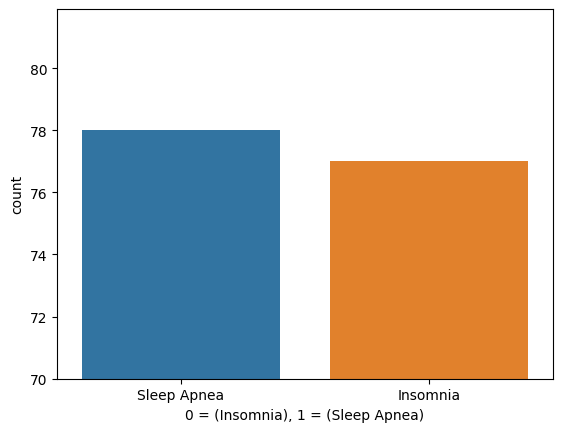

In [590]:
sns.countplot(df2, x= 'target', hue='target')
plt.xlabel('0 = (Insomnia), 1 = (Sleep Apnea)')
plt.ylim(70);

In [591]:
df2['target'] = df2['target'].map({'Insomnia':0, 'Sleep Apnea':1})

In [594]:
# voy a hacer esta transformación antes del split porque como hay poco valores, luego con los modelos me da error por alguna profesión que 
# no se encuentra, entonces así estarán todas ya que se hace con One-Hot-Encoding

In [592]:
dummies_train_2 = pd.get_dummies(df2['Occupation']).astype(int)
df2 = pd.concat([df2, dummies_train_2], axis = 1)

In [518]:
# dividimos en train y test

In [595]:
train_set_2, test_set_2 = train_test_split(df2, test_size=0.2, random_state=42)

In [596]:
print(train_set_2.shape)
print(test_set_2.shape)

(124, 22)
(31, 22)


In [597]:
# vamos a hacer las mismas transformaciones que arriba

In [598]:
# vamos a separ la columna de 'blood pressure' y vamos a calcular la presion del pulso
train_set_2[['systolic','diastolic']] = train_set_2['Blood Pressure'].str.extract(r'(\d+)/(\d+)', expand=True)
train_set_2.drop(columns='Blood Pressure', inplace=True)
train_set_2['systolic'] = train_set_2['systolic'].astype(int)
train_set_2['diastolic'] = train_set_2['diastolic'].astype(int)
train_set_2['Pulse Pressure'] = train_set_2['systolic'] - train_set_2['diastolic']
# vamos a codificar esas features categoricas
train_set_2['Gender_code'] = train_set_2['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
# vamos a unir 'normal' con 'normal weight' y 'overweight' con 'obese' porque indican lo mismo
train_set_2['BMI Category'] = train_set_2['BMI Category'].map({'Normal Weight': 'Normal','Normal':'Normal', 'Overweight':'Overweight', 'Obese': 'Overweight'})
train_set_2['BMI Category_code'] = train_set_2['BMI Category'].apply(lambda x: 0 if x == 'Normal' else 1)

In [1287]:
train_set_2

Gender  Age   Occupation  Sleep Duration  Quality of Sleep  \
277    Male   49       Doctor             8.1                 9   
310  Female   52   Accountant             6.6                 7   
259  Female   45      Teacher             6.6                 7   
292  Female   50        Nurse             6.1                 6   
240  Female   44      Teacher             6.5                 7   
..      ...  ...          ...             ...               ...   
246    Male   44  Salesperson             6.3                 6   
289  Female   50        Nurse             6.1                 6   
94   Female   36   Accountant             7.2                 8   
273  Female   49        Nurse             6.2                 6   
285  Female   50        Nurse             6.0                 6   

     Physical Activity Level  Stress Level BMI Category  Heart Rate  \
277                       85             3   Overweight          86   
310                       45             7   Overweight          72   
259                       45             4   Overweight          65   
292                       90             8   Overweight          75   
240                       45             4   Overweight          65   
..                       ...           ...          ...         ...   
246                       45             7   Overweight          72   
289                       90             8   Overweight          75   
94                        60             4       Normal          68   
273                       90             8   Overweight          75   
285                       90             8   Overweight          75   

     Daily Steps  target  Accountant  Doctor  Engineer  Lawyer  Nurse  \
277         3700       1           0       1         0       0      0   
310         6000       0           1       0         0       0      0   
259         6000       0           0       0         0       0      0   
292        10000       1           0       0         0       0      1   
240         6000       0           0       0         0       0      0   
..           ...     ...         ...     ...       ...     ...    ...   
246         6000       0           0       0         0       0      0   
289        10000       1           0       0         0       0      1   
94          7000       0           1       0         0       0      0   
273        10000       1           0       0         0       0      1   
285        10000       1           0       0         0       0      1   

     Sales Representative  Salesperson  Scientist  Software Engineer  Teacher  \
277                     0            0          0                  0        0   
310                     0            0          0                  0        0   
259                     0            0          0                  0        1   
292                     0            0          0                  0        0   
240                     0            0          0                  0        1   
..                    ...          ...        ...                ...      ...   
246                     0            1          0                  0        0   
289                     0            0          0                  0        0   
94                      0            0          0                  0        0   
273                     0            0          0                  0        0   
285                     0            0          0                  0        0   

     systolic  diastolic  Pulse Pressure  Gender_code  BMI Category_code  
277       139         91              48            0                  1  
310       130         85              45            1                  1  
259       135         90              45            1                  1  
292       140         95              45            1                  1  
240       135         90              45            1                  1  
..        ...        ...             ...       

In [523]:
# Ahora con los datos de test

In [599]:
# vamos a separ la columna de 'blood pressure' y vamos a calcular la presion del pulso
test_set_2[['systolic','diastolic']] = test_set_2['Blood Pressure'].str.extract(r'(\d+)/(\d+)', expand=True)
test_set_2.drop(columns='Blood Pressure', inplace=True)
test_set_2['systolic'] = test_set_2['systolic'].astype(int)
test_set_2['diastolic'] = test_set_2['diastolic'].astype(int)
test_set_2['Pulse Pressure'] = test_set_2['systolic'] - test_set_2['diastolic']
# vamos a codificar esas features categoricas
test_set_2['Gender_code'] = test_set_2['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
# vamos a unir 'normal' con 'normal weight' y 'overweight' con 'obese' porque indican lo mismo
test_set_2['BMI Category'] = test_set_2['BMI Category'].map({'Normal Weight': 'Normal','Normal':'Normal', 'Overweight':'Overweight', 'Obese': 'Overweight'})
test_set_2['BMI Category_code'] = test_set_2['BMI Category'].apply(lambda x: 0 if x == 'Normal' else 1)

In [600]:
X_test_2 = test_set_2.drop(columns='target')
y_test_2 = test_set_2['target']

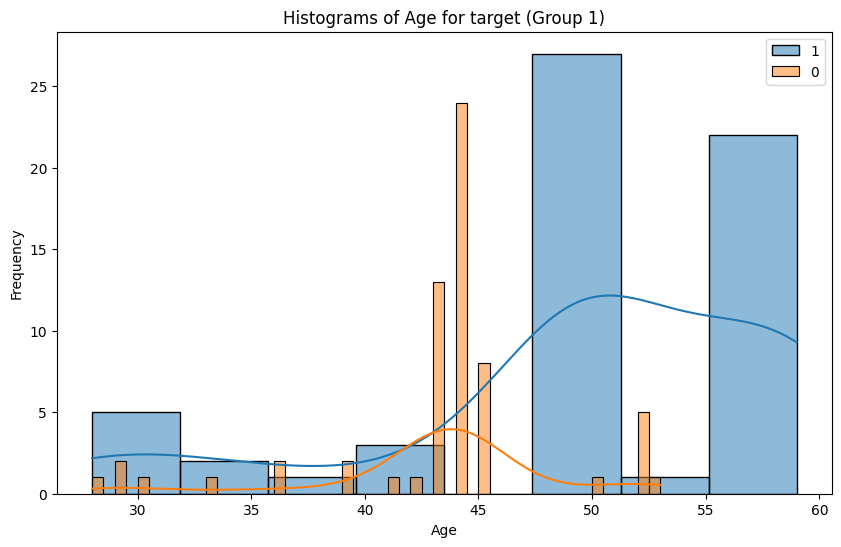

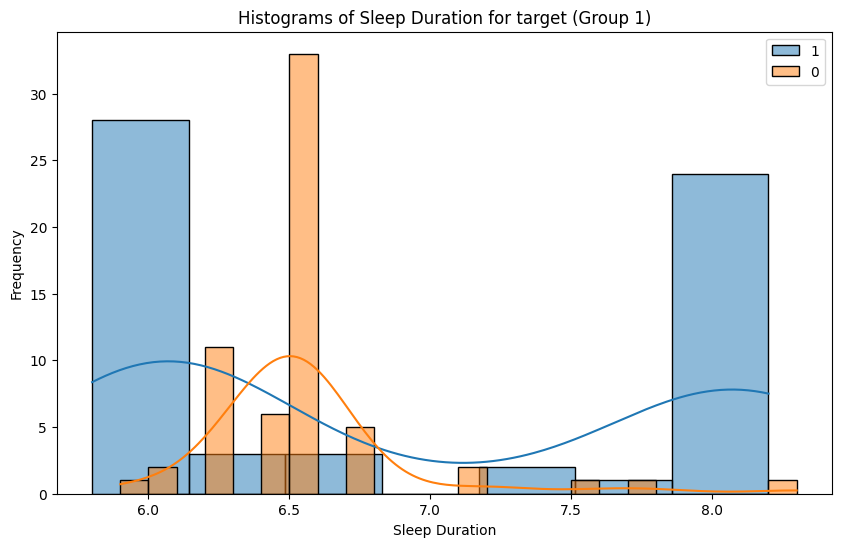

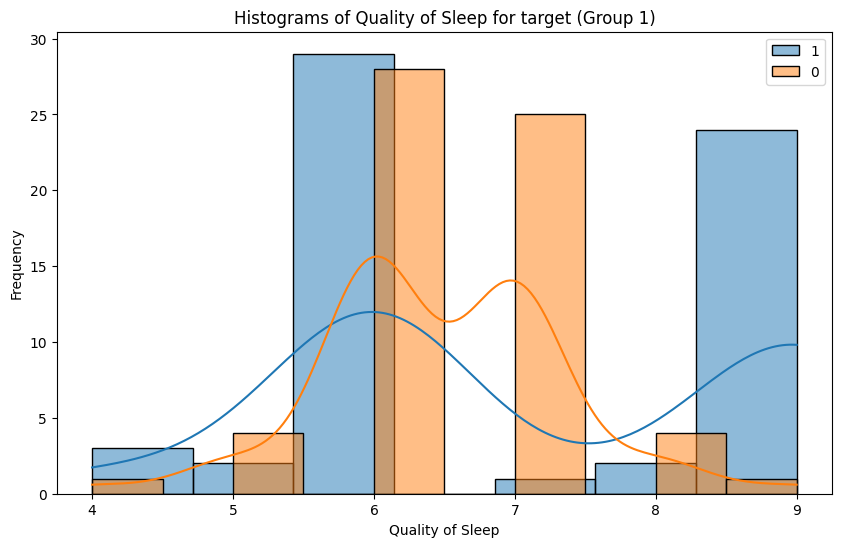

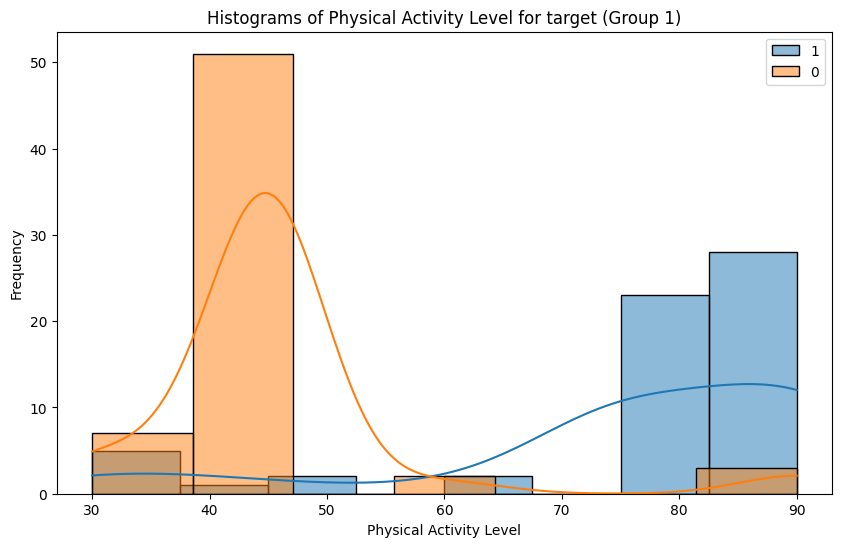

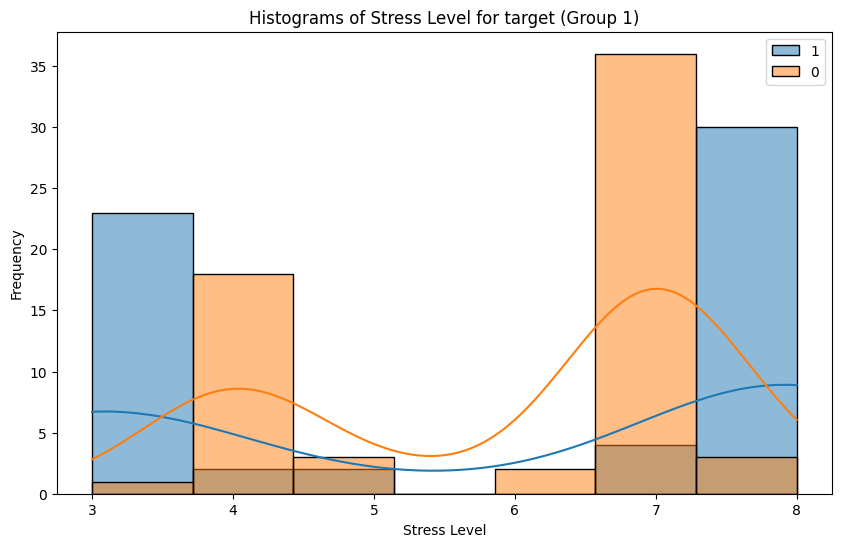

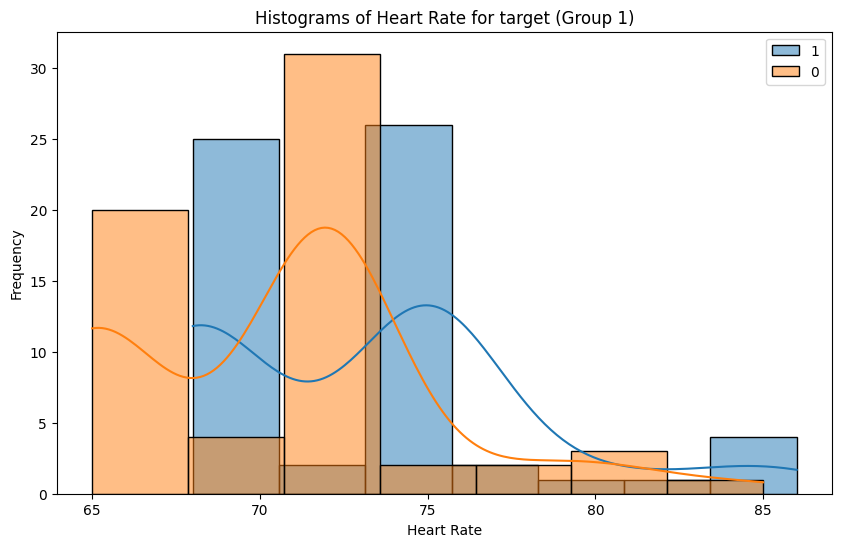

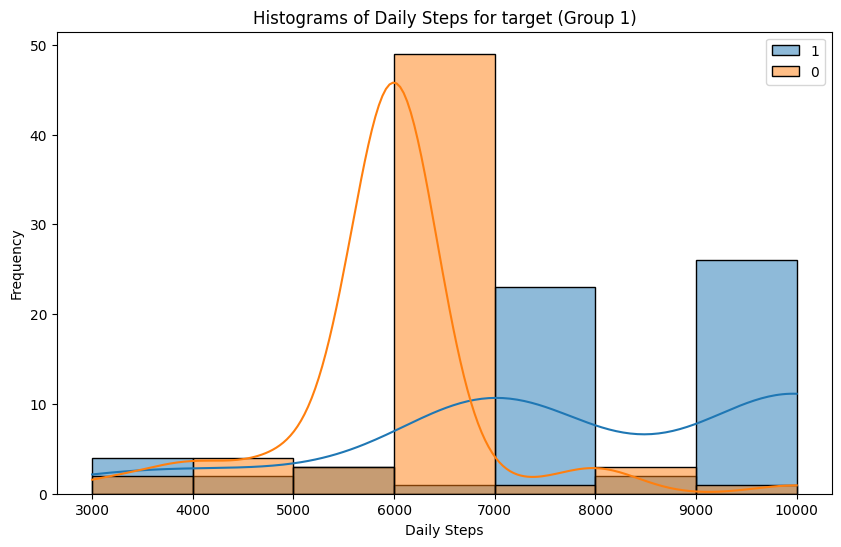

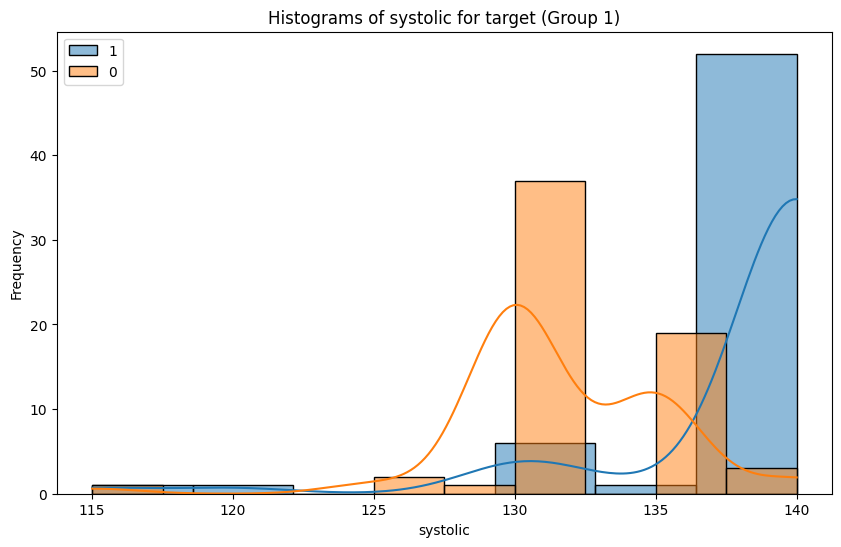

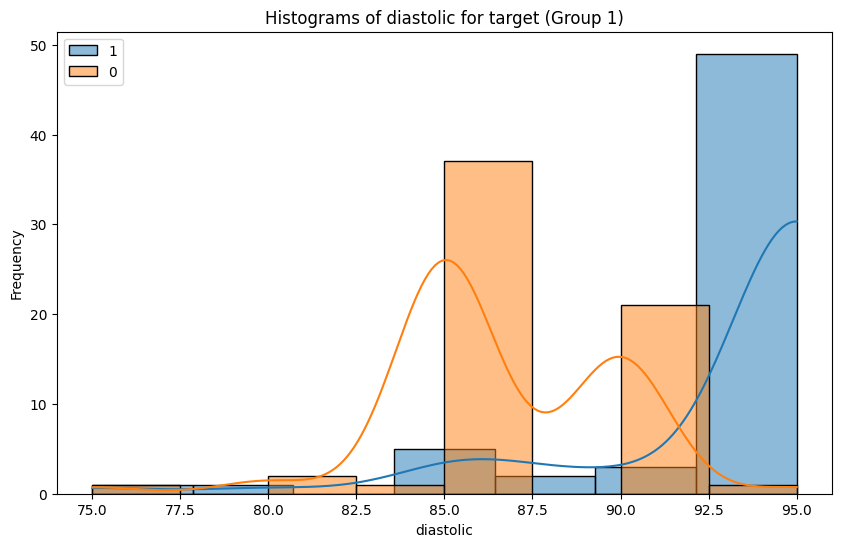

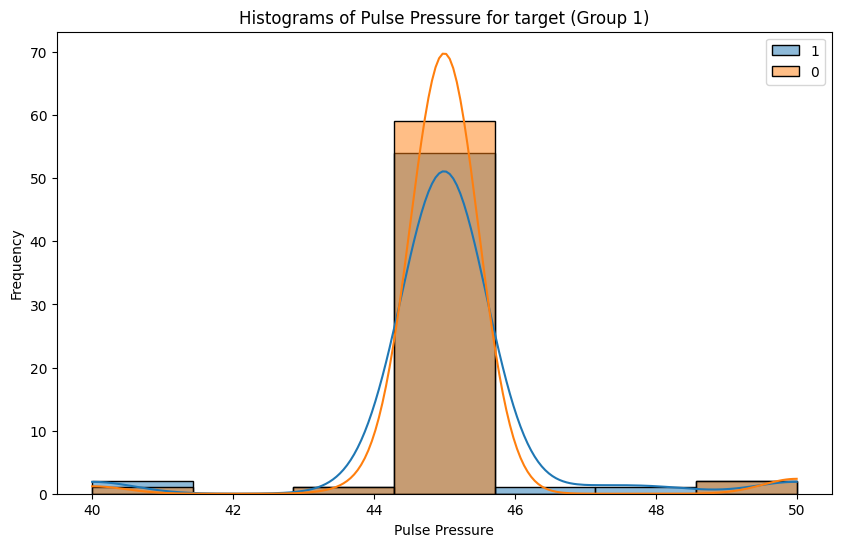

In [601]:
for x in numericas_features:
    plot_grouped_histograms(train_set_2, 'target', x, group_size=2)

In [602]:
# las features se ven bien separadas con el target, eso está bien para diferenciar entre insomnio y apnea del sueño

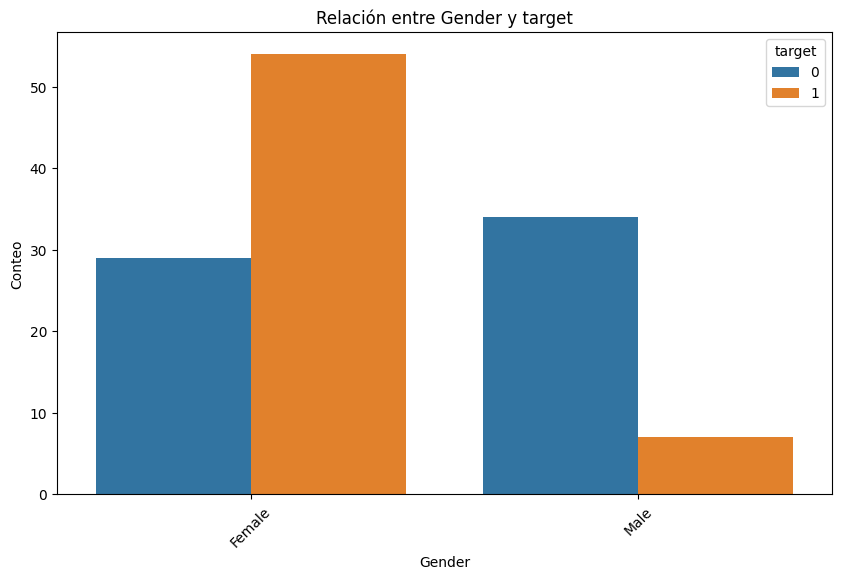

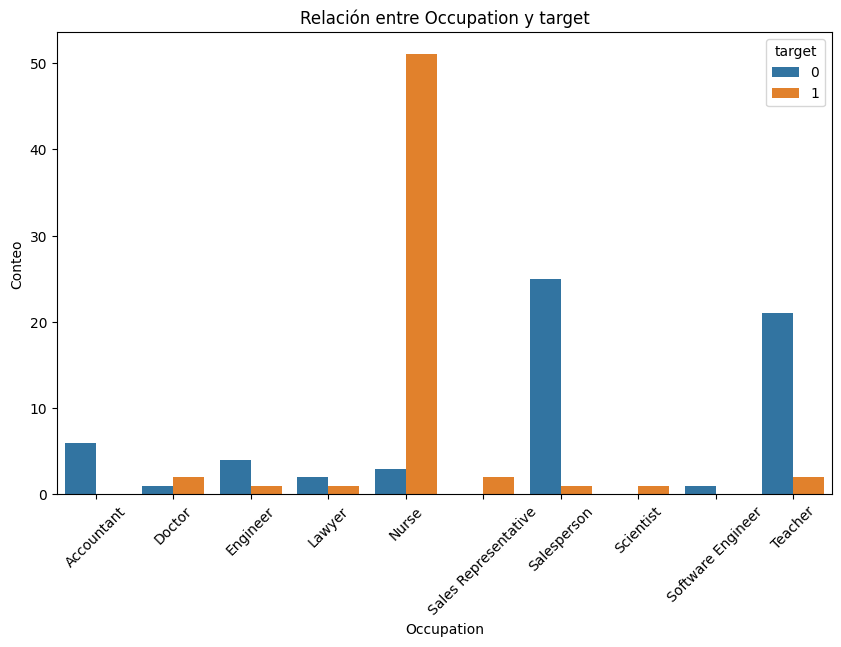

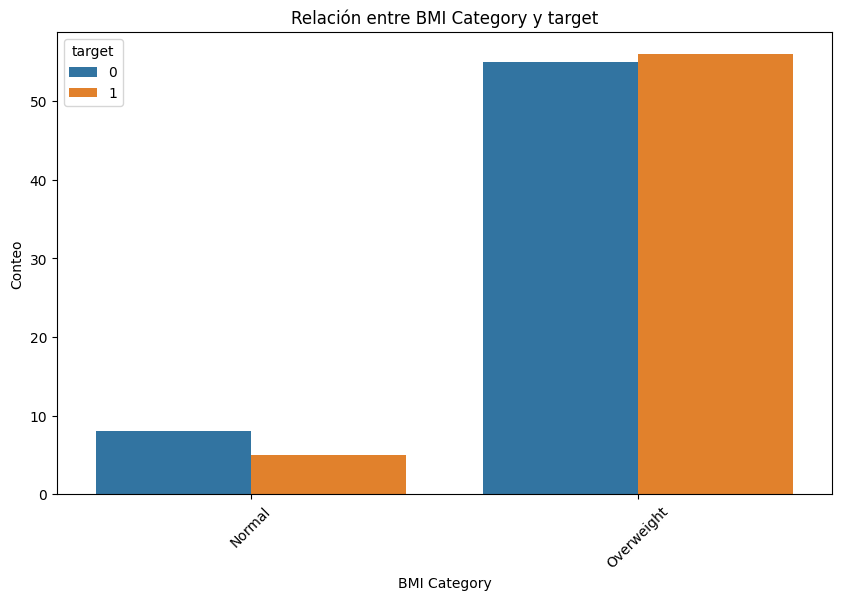

In [603]:
for x in cat_features:
    plot_categorical_relationship_fin(train_set_2, cat_col1=x, cat_col2='target', size_group=11)

In [604]:
# para las features categoricas también se identifica de una forma clara el insomnio y apnea del sueño

In [605]:
targett = 'target'

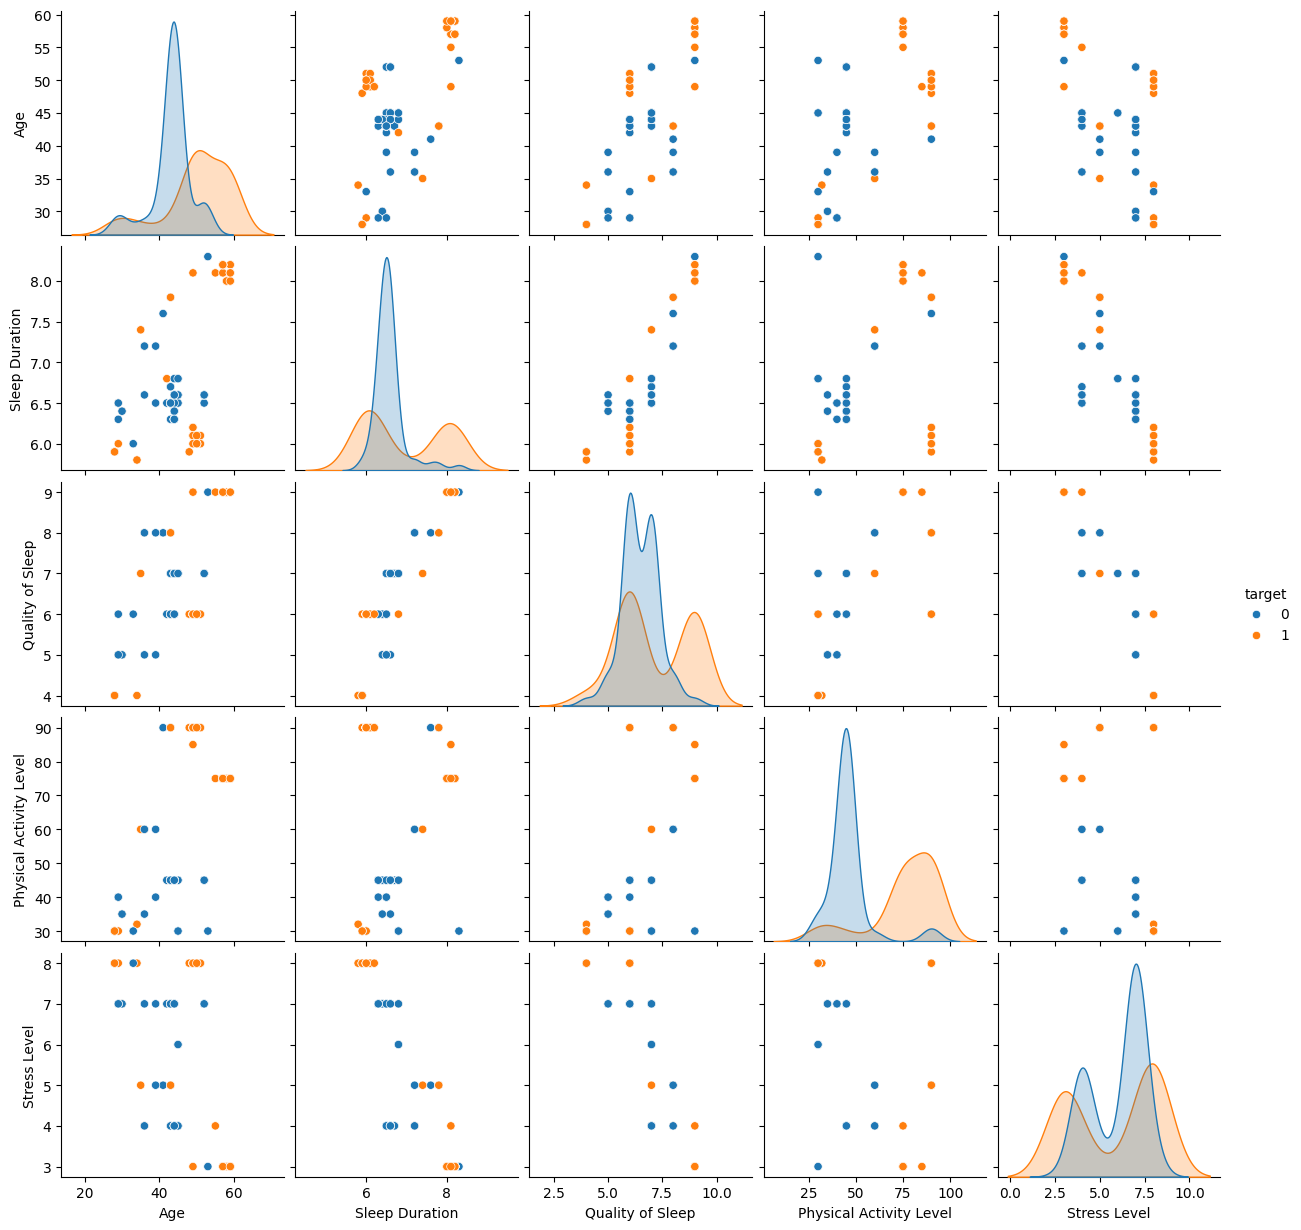

In [606]:
sns.pairplot(train_set_2[numericas[0:5] + [targett]], hue= targett);

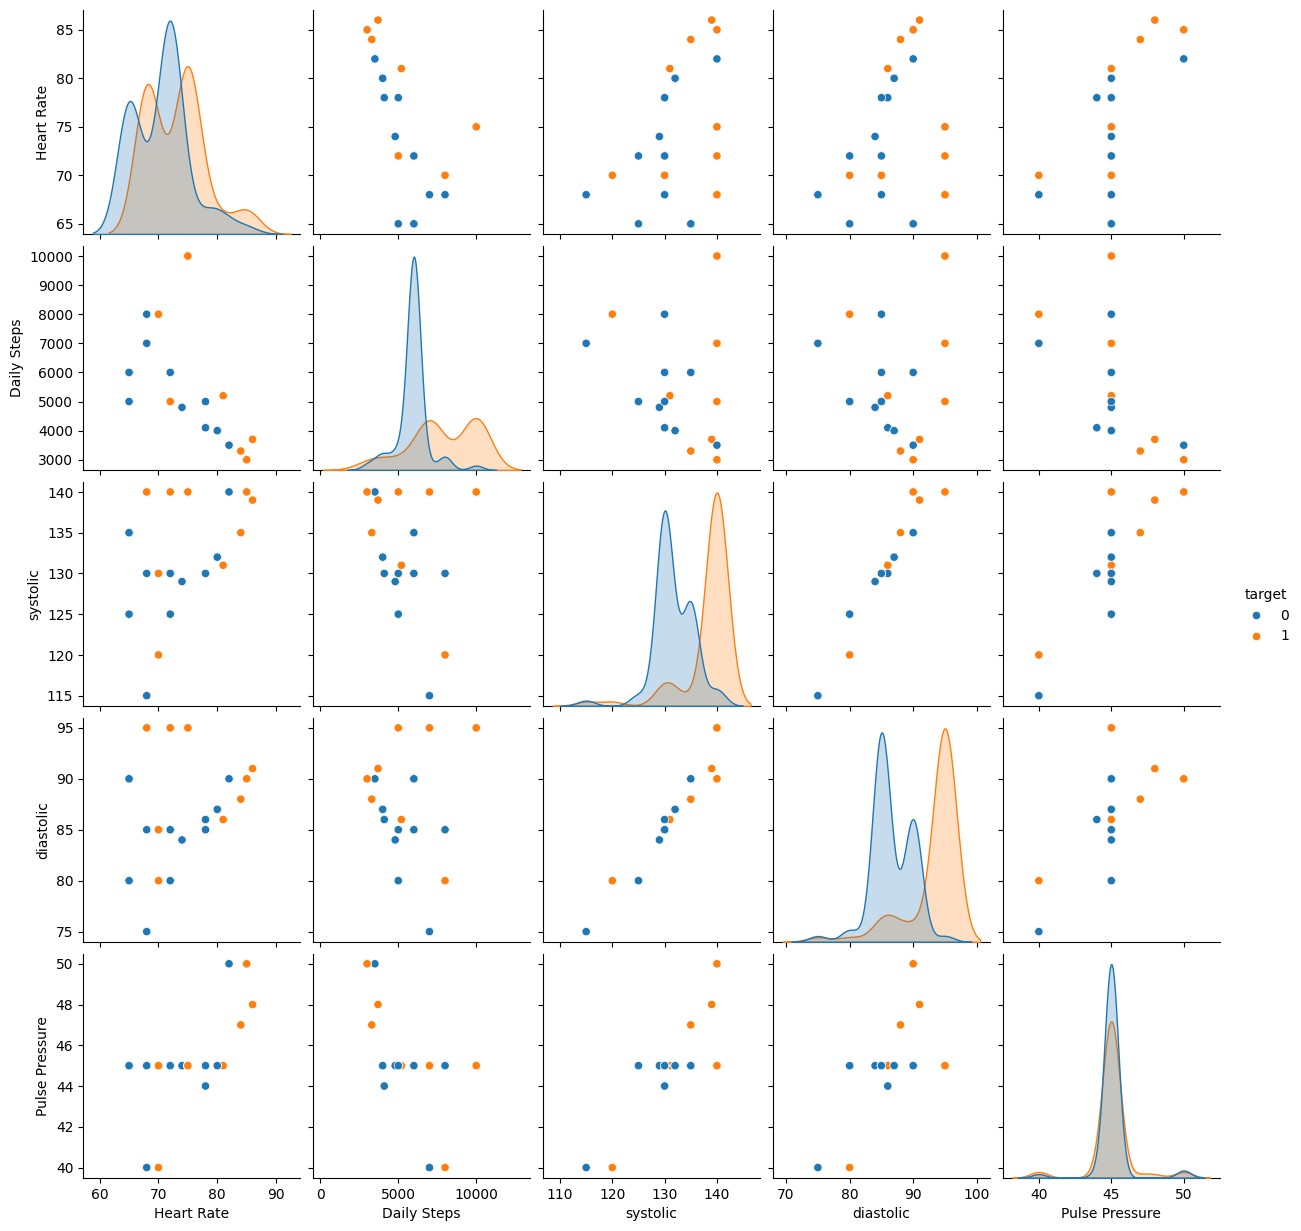

In [607]:
sns.pairplot(train_set_2[numericas[5:] + [targett]], hue= targett);

In [608]:
# vamos a seleccionar features con diferentes métodos

In [609]:
# mutual_info_classif

X2 = train_set_2[numericas]
y2 = train_set_2['target']

mic2 = mutual_info_classif(X2, y2)
print(pd.Series(mic, index=X2.columns).sort_values(ascending=False))

systolic                   0.323486
Sleep Duration             0.319822
diastolic                  0.318733
Daily Steps                0.241592
Age                        0.240672
Physical Activity Level    0.215001
Quality of Sleep           0.165856
Stress Level               0.165671
Heart Rate                 0.145637
Pulse Pressure             0.113293
dtype: float64


In [610]:
# voy a visualizar con el target las últimas cuatro que son los que peores resultados tienen

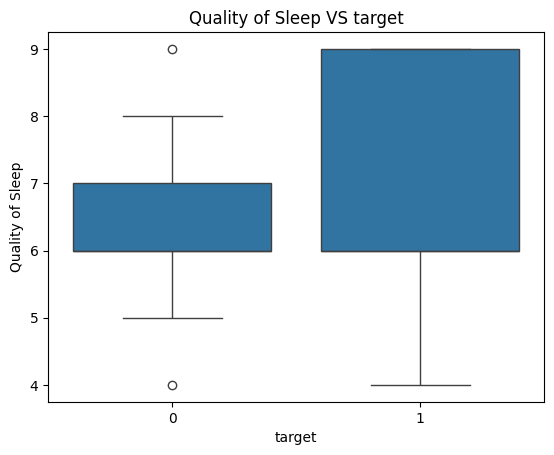

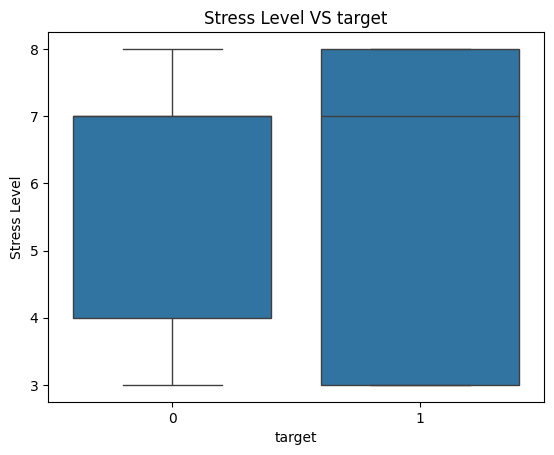

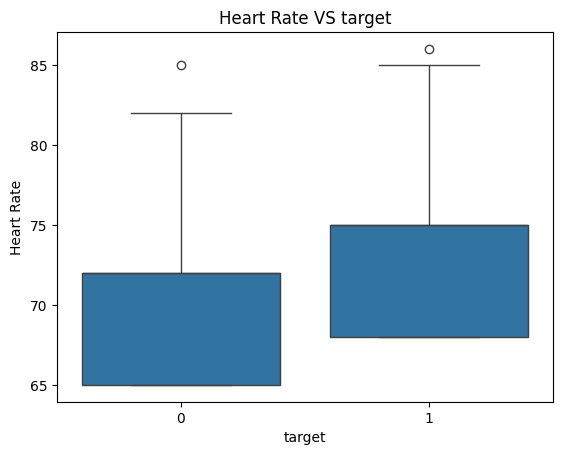

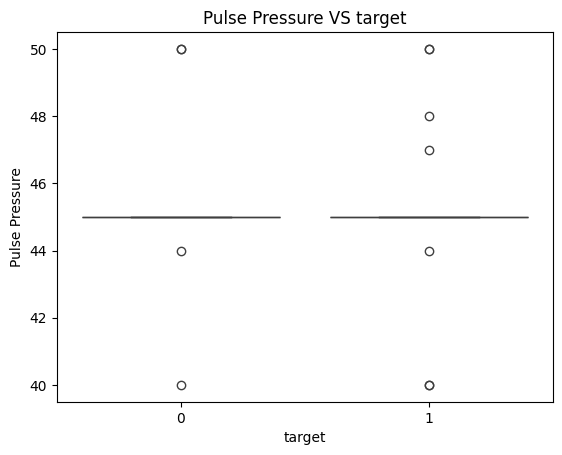

In [611]:
lista = ['Quality of Sleep', 'Stress Level', 'Heart Rate', 'Pulse Pressure']
for x in lista:
    plt.figure()
    sns.boxplot(data = train_set_2, x='target', y=x)
    plt.title(f'{x} VS target')

In [612]:
# la que peor se ve es la de 'Pulse Pressure', igualemnte probaremos con más métodos

In [540]:
# voy a hacer un test de Mann-Whitney U con estas cuatro features

In [613]:
for x in lista:
    grupo_a = train_set_2.loc[train_set_2.target == 0][x]
    grupo_b = train_set_2.loc[train_set_2.target == 1][x]
    u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
    print('-',x,'-')
    print("Estadístico U:", u_stat)
    print("Valor p:", p_valor)

    if p_valor < 0.05:
        print('Hay diferencia estadísticamente significativa')
    else:
        print('No hay diferencia suficiente')
    print('------------------------------')

- Quality of Sleep -
Estadístico U: 1619.0
Valor p: 0.1086575540433775
No hay diferencia suficiente
------------------------------
- Stress Level -
Estadístico U: 1757.5
Valor p: 0.39833502689469147
No hay diferencia suficiente
------------------------------
- Heart Rate -
Estadístico U: 1279.0
Valor p: 0.0010467736900188459
Hay diferencia estadísticamente significativa
------------------------------
- Pulse Pressure -
Estadístico U: 1893.5
Valor p: 0.7804599599627191
No hay diferencia suficiente
------------------------------


In [614]:
# voy a hacer una lista sin estas features que no tienen diferencia suficiente y dejamos la de heart rate que rechazamos la hipotesis nula
# y tenemos confianza de que hay relación

In [615]:
numericas_test_u_stats = [x for x in numericas if x not in ['Quality of Sleep', 'Stress Level', 'Pulse Pressure']]

In [616]:
features_u_stat = categoricas_int + numericas_test_u_stats

In [617]:
# tambien voy a probar otros métodos de selección de features

In [618]:
todas = categoricas_int + numericas

In [1210]:
# si nos fijamos manager sólo hay 1, estará en los datos de test, lo tenemos que quitar de aquí para que no de problemas

In [1209]:
todas = [x for x in todas if x != 'Manager']

In [619]:
X_train_2 = train_set_2[todas]
y_train_2 = train_set_2['target']

In [620]:
# SelectFromModel
r_forest = RandomForestClassifier(random_state = 42)

selector_model = SelectFromModel(estimator= r_forest, threshold='median')
selector_model.fit(X_train_2, y_train_2)
select_from_model_2 = selector_model.get_feature_names_out().tolist()
select_from_model_2

['Nurse',
 'Teacher',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'systolic',
 'diastolic']

In [621]:
# RFE
rfe = RFE(estimator= r_forest)
rfe.fit(X_train_2, y_train_2)
rfe.transform(X_train_2)
RFEv_2 = rfe.get_feature_names_out().tolist()
RFEv_2

['Gender_code',
 'Nurse',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'systolic',
 'diastolic']

In [622]:
# SFS
sfs = SequentialFeatureSelector(r_forest, scoring = 'precision')
sfs.fit(X_train_2, y_train_2)
SFS_2 = sfs.get_feature_names_out().tolist()
SFS_2

['Gender_code',
 'Accountant',
 'Doctor',
 'Engineer',
 'Lawyer',
 'Nurse',
 'Sales Representative',
 'Salesperson',
 'Scientist',
 'Software Engineer',
 'Teacher']

In [623]:
# hard-voting

features_hard_voting_2 = select_from_model_2 + RFEv_2 + SFS_2
votos_2 = Counter(features_hard_voting_2)
votos_2

Counter({'Nurse': 3,
         'Teacher': 2,
         'Age': 2,
         'Sleep Duration': 2,
         'Quality of Sleep': 2,
         'Physical Activity Level': 2,
         'Stress Level': 2,
         'Heart Rate': 2,
         'Daily Steps': 2,
         'systolic': 2,
         'diastolic': 2,
         'Gender_code': 2,
         'Accountant': 1,
         'Doctor': 1,
         'Engineer': 1,
         'Lawyer': 1,
         'Sales Representative': 1,
         'Salesperson': 1,
         'Scientist': 1,
         'Software Engineer': 1})

In [624]:
seleccion_2 = [x for x,y in votos_2.most_common(10)]
seleccion_2

['Nurse',
 'Teacher',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'systolic']

In [625]:
# Feature importance

r_forest.fit(X_train_2, y_train_2)

importances_2 = r_forest.feature_importances_
feature_names_2 = X_train_2.columns

features_importance_2 = pd.Series(importances_2, index=X_train_2.columns).sort_values(ascending=False)
features_importance_2

diastolic                  0.189392
systolic                   0.137053
Physical Activity Level    0.126297
Nurse                      0.094881
Daily Steps                0.093973
Age                        0.080529
Sleep Duration             0.065215
Heart Rate                 0.049563
Quality of Sleep           0.031170
Stress Level               0.023216
Teacher                    0.016553
Pulse Pressure             0.016335
Salesperson                0.014511
Gender_code                0.011268
Sales Representative       0.009786
Software Engineer          0.008892
Accountant                 0.007637
BMI Category_code          0.006940
Engineer                   0.004946
Lawyer                     0.004924
Scientist                  0.003690
Doctor                     0.003231
dtype: float64

In [626]:
feature_importance_2 = [x for x,y in features_importance_2.items() if y >= 0.01]

In [627]:
feature_importance_2

['diastolic',
 'systolic',
 'Physical Activity Level',
 'Nurse',
 'Daily Steps',
 'Age',
 'Sleep Duration',
 'Heart Rate',
 'Quality of Sleep',
 'Stress Level',
 'Teacher',
 'Pulse Pressure',
 'Salesperson',
 'Gender_code']

In [628]:
# voy a preparar todo para probar con diferentes features y diferentes modelos con validación cruzada

In [629]:
dict_features = {
    'todas': todas,
    'u_stat': features_u_stat,
    'SFM' : select_from_model_2,
    'RFE' : RFEv_2,
    'SFS' : SFS_2,
    'hard voting':seleccion_2,
    'feature import':feature_importance_2
}

In [630]:
# en esta ocasión no voy a usar categoricas de tipo 'category' para 'cat boost' y 'light gbm'

In [631]:
#Instanciamos los modelos
rforest = RandomForestClassifier(random_state= 42)
xgb = XGBClassifier(verbosity = 0, random_state= 42)
lgb = LGBMClassifier(verbose = -1, random_state= 42)
gradient = GradientBoostingClassifier(random_state= 42)
cat= CatBoostClassifier(verbose = False, random_state= 42)
tree = DecisionTreeClassifier(random_state= 42)
linear = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()

#instanciamos el escalador para los modelos sensibles a la escala
scaler = StandardScaler()

# cremos un diccionario con todos los modelos
modelos = {
    'random forest' : rforest,
    'xgboost' : xgb,
    'light gbm' : lgb,
    'gradient' : gradient,
    'cat':cat,
    'tree':tree,
    'linear':linear,
    'knn': knn,
    'svc': svc
}


# vamos a hacer un bucle que depende del modelo se harán unas cosas u otras y todo se guarda en un diccionario para visualizarlo en un dataframe
resultados_2 = []
for nombre, modelo in modelos.items():
    if nombre in ['linear','knn', 'svc']:
        for clave, valor in dict_features.items():
            X_train_escalado = scaler.fit_transform(X_train_2[valor])
            cross = cross_validate(modelo, X_train_escalado, y_train_2, cv = 5 , scoring = ['precision'])
            resultados_2.append({
                'modelo': nombre,
                'metodo seleccion features' : clave,
                'precision' : np.mean(cross['test_precision'])
            })           
    else:
        for clave, valor in dict_features.items():
            cross = cross_validate(modelo, train_set_2[valor], y_train_2, cv = 5 , scoring = ['precision'])
            resultados_2.append({
                'modelo': nombre,
                'metodo seleccion features' : clave,
                'precision' : np.mean(cross['test_precision'])
            })     

In [632]:
resultados_baseline_2 = pd.DataFrame(resultados_2).sort_values(by='precision', ascending=False)

In [634]:
pd.set_option('display.max_rows', None)

In [635]:
resultados_baseline_2

modelo metodo seleccion features  precision
11        xgboost                       SFS   0.949231
18      light gbm                       SFS   0.949231
53            knn                       SFS   0.949231
25       gradient                       SFS   0.935897
46         linear                       SFS   0.935897
32            cat                       SFS   0.935897
4   random forest                       SFS   0.935897
39           tree                       SFS   0.935897
60            svc                       SFS   0.935897
49            knn                     todas   0.932867
50            knn                    u_stat   0.932867
55            knn            feature import   0.930000
51            knn                       SFM   0.930000
52            knn                       RFE   0.926667
42         linear                     todas   0.917716
54            knn               hard voting   0.914615
62            svc            feature import   0.913333
59            svc                       RFE   0.913333
57            svc                    u_stat   0.910989
58            svc                       SFM   0.905792
61            svc               hard voting   0.905792
43         linear                    u_stat   0.904895
44         linear                       SFM   0.896970
45         linear                       RFE   0.896970
47         linear               hard voting   0.896970
35           tree                     todas   0.888782
29            cat                    u_stat   0.888462
19      light gbm               hard voting   0.888462
28            cat                     todas   0.888462
0   random forest                     todas   0.888462
1   random forest                    u_stat   0.888462
34            cat            feature import   0.887179
56            svc                     todas   0.885128
24       gradient                       RFE   0.883846
3   random forest                       RFE   0.883333
31            cat                       RFE   0.880000
33            cat               hard voting   0.879638
30            cat                       SFM   0.879638
2   random forest                       SFM   0.874510
38           tree                       RFE   0.874044
13        xgboost            feature import   0.873077
7         xgboost                     todas   0.873077
8         xgboost                    u_stat   0.873077
23       gradient                       SFM   0.870833
26       gradient               hard voting   0.870833
10        xgboost                       RFE   0.869744
17      light gbm                       RFE   0.868462
21       gradient                     todas   0.866946
5   random forest               hard voting   0.865152
6   random forest            feature import   0.865152
22       gradient                    u_stat   0.865128
36           tree                    u_stat   0.862775
9         xgboost                       SFM   0.860989
12        xgboost               hard voting   0.860989
41           tree            feature import   0.860407
48         linear            feature import   0.857377
14      light gbm                     todas   0.855275
15      light gbm                    u_stat   0.855275
20      light gbm            feature import   0.855275
16      light gbm                       SFM   0.855275
27       gradient            feature import   0.852652
37           tree                       SFM   0.848319
40           tree               hard voting   0.840476

In [636]:
pd.reset_option('display.max_rows', None)

In [637]:
# voy a probar a ver como funcionan los modelos 'xgboost' y 'light gbm', ya que tienen muy alta puntuación en métrica

In [638]:
train_set_2[SFS_2].head(1)

Gender_code  Accountant  Doctor  Engineer  Lawyer  Nurse  \
277            0           0       1         0       0      0   

     Sales Representative  Salesperson  Scientist  Software Engineer  Teacher  
277                     0            0          0                  0        0

In [655]:
train_set_2[todas].head(1)

Gender_code  Accountant  Doctor  Engineer  Lawyer  Nurse  \
277            0           0       1         0       0      0   

     Sales Representative  Salesperson  Scientist  Software Engineer  Teacher  \
277                     0            0          0                  0        0   

     BMI Category_code  Age  Sleep Duration  Quality of Sleep  \
277                  1   49             8.1                 9   

     Physical Activity Level  Stress Level  Heart Rate  Daily Steps  systolic  \
277                       85             3          86         3700       139   

     diastolic  Pulse Pressure  
277         91              48

In [656]:
train_set_2[seleccion_2].head(1)

Nurse  Teacher  Age  Sleep Duration  Quality of Sleep  \
277      0        0   49             8.1                 9   

     Physical Activity Level  Stress Level  Heart Rate  Daily Steps  systolic  
277                       85             3          86         3700       139

In [669]:
train_set_2[features_u_stat].head(1)

Gender_code  Accountant  Doctor  Engineer  Lawyer  Nurse  \
277            0           0       1         0       0      0   

     Sales Representative  Salesperson  Scientist  Software Engineer  Teacher  \
277                     0            0          0                  0        0   

     BMI Category_code  Age  Sleep Duration  Physical Activity Level  \
277                  1   49             8.1                       85   

     Heart Rate  Daily Steps  systolic  diastolic  
277          86         3700       139         91

In [674]:
train_set_2[RFEv_2].head(1)

Gender_code  Nurse  Age  Sleep Duration  Quality of Sleep  \
277            0      0   49             8.1                 9   

     Physical Activity Level  Stress Level  Heart Rate  Daily Steps  systolic  \
277                       85             3          86         3700       139   

     diastolic  
277         91

In [679]:
train_set_2[select_from_model_2].head(1)

Nurse  Teacher  Age  Sleep Duration  Quality of Sleep  \
277      0        0   49             8.1                 9   

     Physical Activity Level  Stress Level  Heart Rate  Daily Steps  systolic  \
277                       85             3          86         3700       139   

     diastolic  
277         91

In [684]:
train_set_2[feature_importance_2].head(1)

diastolic  systolic  Physical Activity Level  Nurse  Daily Steps  Age  \
277         91       139                       85      0         3700   49   

     Sleep Duration  Heart Rate  Quality of Sleep  Stress Level  Teacher  \
277             8.1          86                 9             3        0   

     Pulse Pressure  Salesperson  Gender_code  
277              48            0            0

In [928]:
# Voy a probar con KNN aunque no creo que de buenos resultados

In [921]:
train = train_set_2[seleccion_2]

In [922]:
X_scaled = scaler.fit_transform(train)

In [923]:
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    scoring='precision',
    cv=5,
    n_jobs=-1
)

grid_knn.fit(X_scaled, y_train_2)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [925]:
grid_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

In [926]:
X_test_scaled = scaler.fit_transform(test_set_2[seleccion_2])

In [927]:
best = grid_knn.best_estimator_
y_pred2_ = best.predict(X_test_scaled)
print(classification_report(y_test_2, y_pred2_))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       1.00      0.65      0.79        17

    accuracy                           0.81        31
   macro avg       0.85      0.82      0.80        31
weighted avg       0.86      0.81      0.80        31



In [929]:
# creo que no es el mejor modelo para este problema, así que voy a probar con los otros dos que tenían buenos resultados como LGBM Y XGB

In [639]:
# voy a crear los hiperparametros para estos modelos

In [726]:
train = train_set_2[seleccion_2]

In [685]:
train = train_set_2[feature_importance_2]

In [698]:
# LGBM
lgb2_ = LGBMClassifier(random_state=42, verbose=-1)
param_grid_lgb2_ = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}
grid_lgb2_ = GridSearchCV(lgb2_, param_grid_lgb2_, cv=5, scoring='precision', n_jobs=-1)
grid_lgb2_.fit(train, y_train_2)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42, verbose=-1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [-1, 3, 5, 7],
                         'n_estimators': [100, 300, 500],
                         'num_leaves': [15, 31, 63],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='precision')

In [699]:
y_pred2_ = grid_lgb.best_estimator_.predict(test_set_2[feature_importance_2], predict_disable_shape_check=True)
print(classification_report(y_test_2, y_pred2_))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        14
           1       1.00      0.12      0.21        17

    accuracy                           0.52        31
   macro avg       0.74      0.56      0.43        31
weighted avg       0.77      0.52      0.41        31



In [661]:
# LGBM

lgb2_ = LGBMClassifier(random_state=42, verbose=-1)
param_grid_lgb2_ = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01,0.1,0.2],
    'num_leaves': [1,2,3,4,5,6,7,8],
    'max_depth': [1,2,3],
    'subsample': [0.01, 0.1,0.2,0.3,0.4],
    'class_weight': ['balanced']

}

grid_lgb2_ = GridSearchCV(lgb2_, param_grid_lgb2_, cv=5, scoring='precision', n_jobs=-1)
grid_lgb2_.fit(train, y_train_2)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42, verbose=-1),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 2, 3], 'n_estimators': [100, 200],
                         'num_leaves': [1, 2, 3, 4, 5, 6, 7, 8],
                         'subsample': [0.01, 0.1, 0.2, 0.3, 0.4]},
             scoring='precision')

In [662]:
y_pred2_ = grid_lgb.best_estimator_.predict(test_set_2[seleccion_2], predict_disable_shape_check=True)
print(classification_report(y_test_2, y_pred2_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.53      0.94      0.68        17

    accuracy                           0.52        31
   macro avg       0.27      0.47      0.34        31
weighted avg       0.29      0.52      0.37        31



In [706]:
# con light gbm tengo malos resultados, voy a probar con XGB que tenía buenas métricas y también comparar con Random Forest que
#en el modelo anterior me dió buenos resultados

In [848]:
train = train_set_2[feature_importance_2]

In [849]:
# XGB
# feature_importance_2
xgb2_ = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb2_ = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [2,3,4, 5],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.6,0.7,0.8, 1]
}

grid_xgb2_ = GridSearchCV(xgb2_, param_grid_xgb2_, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_xgb2_.fit(train, y_train_2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='precision', verbose=1)

In [850]:
y_pred2_2_ = grid_xgb2_.best_estimator_.predict(test_set_2[feature_importance_2])
print(classification_report(y_test_2, y_pred2_2_))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.83      0.88      0.86        17

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.84        31
weighted avg       0.84      0.84      0.84        31



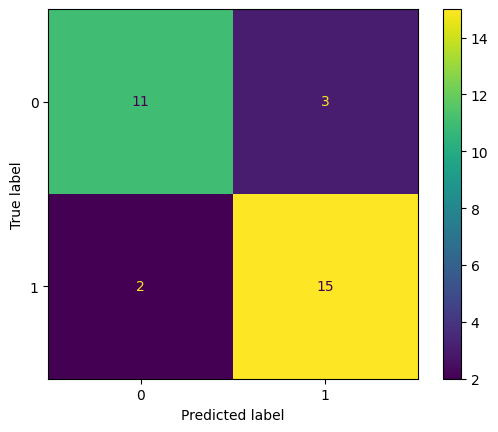

In [851]:
ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred2_2_);

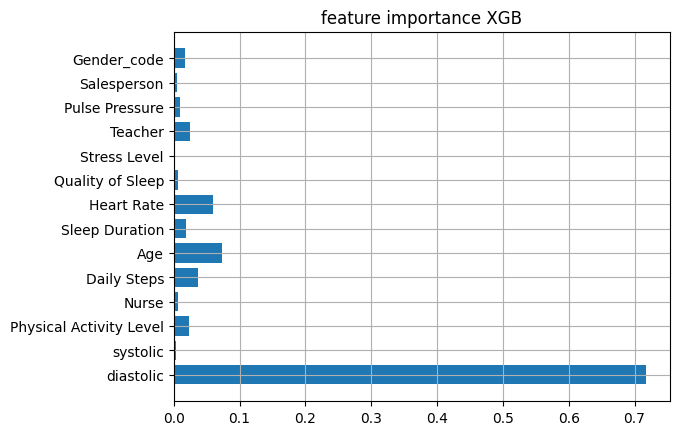

In [852]:
xgb2_.fit(train, y_train_2)
plt.barh(train.columns,xgb2_.feature_importances_)
plt.title('feature importance XGB')
plt.grid(True);

In [872]:
train = train_set_2[seleccion_2]

In [873]:
# seleccion_2
xgb2_ = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb2_ = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [2,3,4, 5],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.6,0.7,0.8, 1]
}

grid_xgb2_ = GridSearchCV(xgb2_, param_grid_xgb2_, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_xgb2_.fit(train, y_train_2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='precision', verbose=1)

In [874]:
y_pred2_2_ = grid_xgb2_.best_estimator_.predict(test_set_2[seleccion_2])
print(classification_report(y_test_2, y_pred2_2_))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



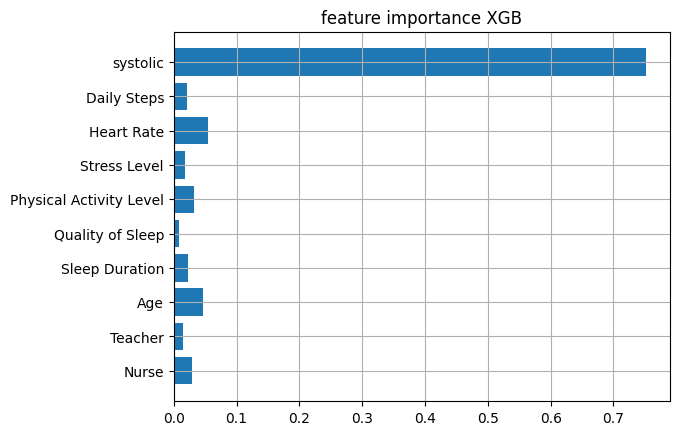

In [875]:
xgb2_.fit(train, y_train_2)
plt.barh(train.columns,xgb2_.feature_importances_)
plt.title('feature importance XGB')
plt.grid(True);

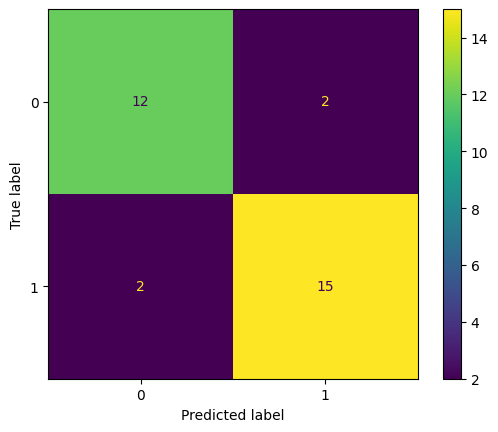

In [876]:
ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred2_2_);

In [841]:
train = train_set_2[SFS_2]

In [842]:
# SFS_2
xgb2_ = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb2_ = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [2,3,4, 5],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.6,0.7,0.8, 1]
}

grid_xgb2_ = GridSearchCV(xgb2_, param_grid_xgb2_, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_xgb2_.fit(train, y_train_2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='precision', verbose=1)

In [843]:
y_pred2_2_ = grid_xgb2_.best_estimator_.predict(test_set_2[SFS_2])
print(classification_report(y_test_2, y_pred2_2_))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       1.00      0.59      0.74        17

    accuracy                           0.77        31
   macro avg       0.83      0.79      0.77        31
weighted avg       0.85      0.77      0.77        31



In [836]:
train = train_set_2[RFEv_2]

In [837]:
# RFEv_2
xgb2_ = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb2_ = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [2,3,4, 5],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.6,0.7,0.8, 1]
}

grid_xgb2_ = GridSearchCV(xgb2_, param_grid_xgb2_, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_xgb2_.fit(train, y_train_2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='precision', verbose=1)

In [838]:
y_pred2_2_ = grid_xgb2_.best_estimator_.predict(test_set_2[RFEv_2])
print(classification_report(y_test_2, y_pred2_2_))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



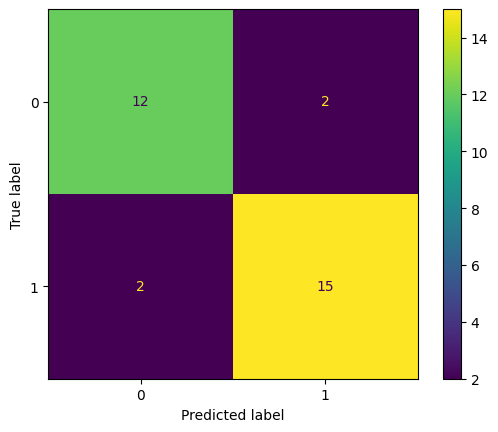

In [839]:
ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred2_2_);

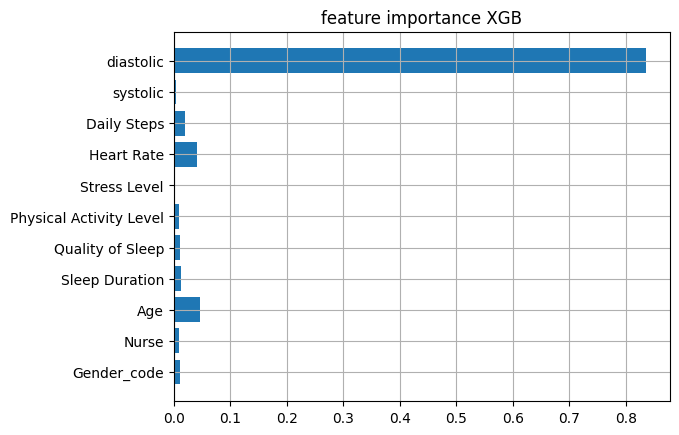

In [840]:
xgb2_.fit(train, y_train_2)
plt.barh(train.columns,xgb2_.feature_importances_)
plt.title('feature importance XGB')
plt.grid(True);

In [831]:
train = train_set_2[select_from_model_2]

In [832]:
# select_from_model_2
xgb2_ = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb2_ = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [2,3,4, 5],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.6,0.7,0.8, 1]
}

grid_xgb2_ = GridSearchCV(xgb2_, param_grid_xgb2_, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_xgb2_.fit(train, y_train_2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='precision', verbose=1)

In [833]:
y_pred2_2_ = grid_xgb2_.best_estimator_.predict(test_set_2[select_from_model_2])
print(classification_report(y_test_2, y_pred2_2_))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.83      0.88      0.86        17

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.84        31
weighted avg       0.84      0.84      0.84        31



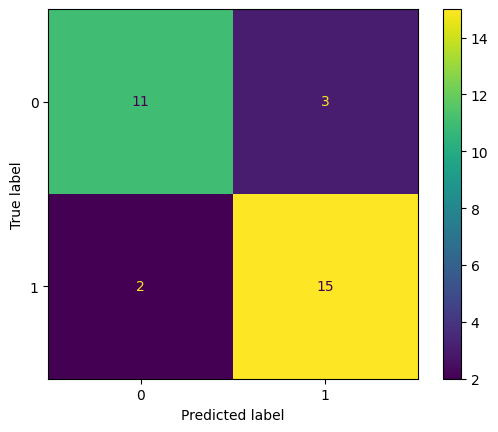

In [834]:
ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred2_2_);

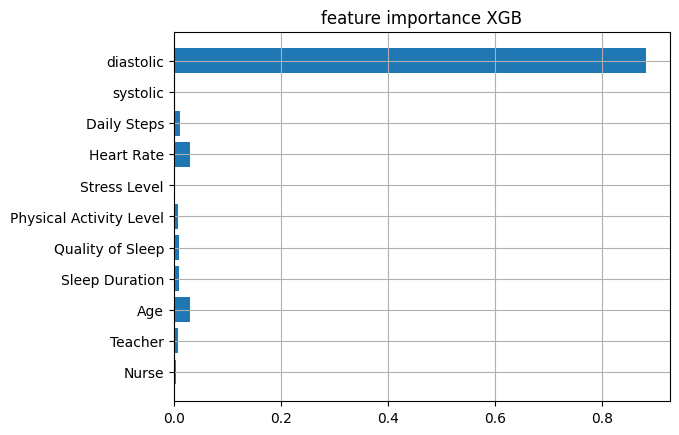

In [835]:
xgb2_.fit(train, y_train_2)
plt.barh(train.columns,xgb2_.feature_importances_)
plt.title('feature importance XGB')
plt.grid(True);

In [867]:
train = train_set_2[features_u_stat]

In [868]:
# features_u_stat
xgb2_ = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb2_ = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [2,3,4, 5],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.6,0.7,0.8, 1]
}

grid_xgb2_ = GridSearchCV(xgb2_, param_grid_xgb2_, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_xgb2_.fit(train, y_train_2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='precision', verbose=1)

In [869]:
y_pred2_2_ = grid_xgb2_.best_estimator_.predict(test_set_2[features_u_stat])
print(classification_report(y_test_2, y_pred2_2_))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



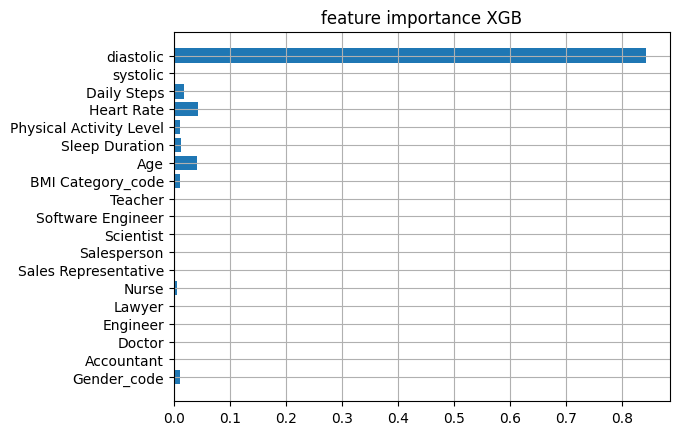

In [870]:
xgb2_.fit(train, y_train_2)
plt.barh(train.columns,xgb2_.feature_importances_)
plt.title('feature importance XGB')
plt.grid(True);

In [823]:
train = train_set_2[todas]

In [824]:
# todas
xgb2_ = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb2_ = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [2,3,4, 5],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.6,0.7,0.8, 1]
}

grid_xgb2_ = GridSearchCV(xgb2_, param_grid_xgb2_, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_xgb2_.fit(train, y_train_2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='precision', verbose=1)

In [825]:
y_pred2_2_ = grid_xgb2_.best_estimator_.predict(test_set_2[todas])
print(classification_report(y_test_2, y_pred2_2_))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



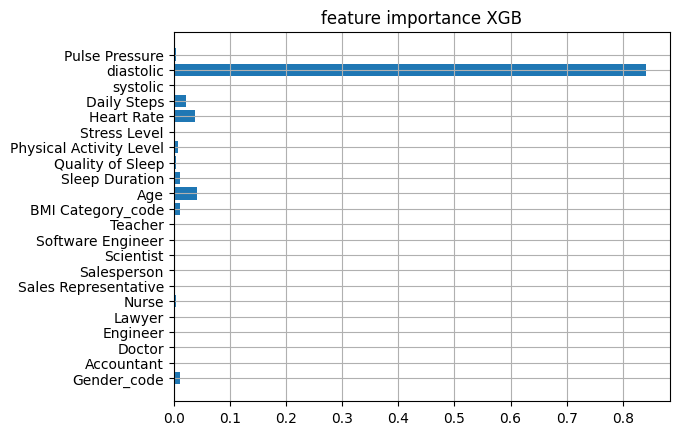

In [826]:
xgb2_.fit(train, y_train_2)
plt.barh(train.columns,xgb2_.feature_importances_)
plt.title('feature importance XGB')
plt.grid(True);

In [749]:
# los mejores resultados los tengo con las siguientes listas de features:
# feature_importance_2, seleccion_2, select_from_model_2, features_u_stat, features_u_stat, todas

In [707]:
# con XGB tengo mejores resultados, voy a probar con Random Forest a ver que tal

In [901]:
train = train_set_2[feature_importance_2]

In [907]:
rf2 = RandomForestClassifier(random_state=42)
param_grid_rf2 = {
    'n_estimators': [100, 200,300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf2 = GridSearchCV(
    rf2,
    param_grid_rf2,
    cv=5,
    scoring='precision',
    n_jobs=-1,
    verbose=1
)
grid_rf2.fit(train, y_train_2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='precision', verbose=1)

In [908]:
y_pred = grid_rf2.best_estimator_.predict(test_set_2[feature_importance_2])
print(classification_report(y_test_2, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



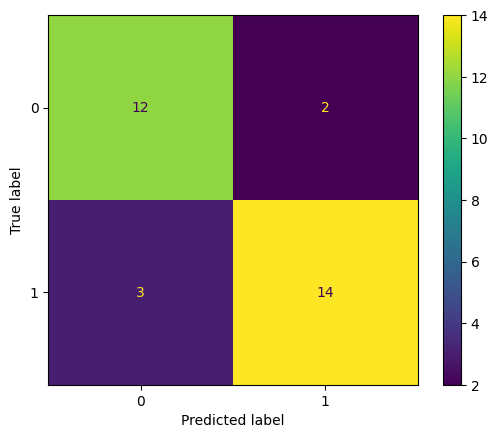

In [791]:
ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred);

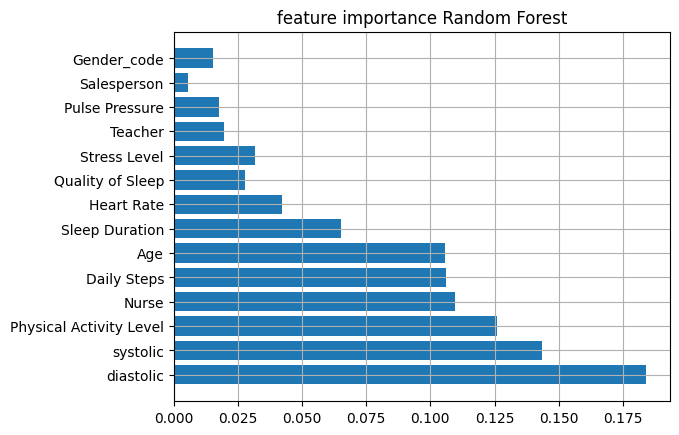

In [793]:
rf2.fit(train, y_train_2)
plt.barh(train.columns,rf2.feature_importances_)
plt.title('feature importance Random Forest')
plt.grid(True);

In [708]:
# también son muy buenos, pero un poco menos que XGB

In [709]:
# voy a probar con Random Forest para otras selecciones de features

In [710]:
train = train_set_2[select_from_model_2]

In [711]:
# select_from_model_2
rf2 = RandomForestClassifier(random_state=42)
param_grid_rf2 = {
    'n_estimators': [100, 200,300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf2 = GridSearchCV(
    rf2,
    param_grid_rf2,
    cv=5,
    scoring='precision',
    n_jobs=-1,
    verbose=1
)
grid_rf2.fit(train, y_train_2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='precision', verbose=1)

In [712]:
y_pred = grid_rf2.best_estimator_.predict(test_set_2[select_from_model_2])
print(classification_report(y_test_2, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.86      0.71      0.77        17

    accuracy                           0.77        31
   macro avg       0.78      0.78      0.77        31
weighted avg       0.79      0.77      0.77        31



In [713]:
train = train_set_2[RFEv_2]

In [714]:
# RFEv_2
rf2 = RandomForestClassifier(random_state=42)
param_grid_rf2 = {
    'n_estimators': [100, 200,300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf2 = GridSearchCV(
    rf2,
    param_grid_rf2,
    cv=5,
    scoring='precision',
    n_jobs=-1,
    verbose=1
)
grid_rf2.fit(train, y_train_2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='precision', verbose=1)

In [715]:
y_pred = grid_rf2.best_estimator_.predict(test_set_2[RFEv_2])
print(classification_report(y_test_2, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        14
           1       0.85      0.65      0.73        17

    accuracy                           0.74        31
   macro avg       0.76      0.75      0.74        31
weighted avg       0.77      0.74      0.74        31



In [716]:
train = train_set_2[features_u_stat]

In [717]:
# features_u_stat
rf2 = RandomForestClassifier(random_state=42)
param_grid_rf2 = {
    'n_estimators': [100, 200,300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf2 = GridSearchCV(
    rf2,
    param_grid_rf2,
    cv=5,
    scoring='precision',
    n_jobs=-1,
    verbose=1
)
grid_rf2.fit(train, y_train_2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='precision', verbose=1)

In [718]:
y_pred = grid_rf2.best_estimator_.predict(test_set_2[features_u_stat])
print(classification_report(y_test_2, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        14
           1       0.85      0.65      0.73        17

    accuracy                           0.74        31
   macro avg       0.76      0.75      0.74        31
weighted avg       0.77      0.74      0.74        31



In [720]:
train = train_set_2[seleccion_2]

In [721]:
# seleccion_2
rf2 = RandomForestClassifier(random_state=42)
param_grid_rf2 = {
    'n_estimators': [100, 200,300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf2 = GridSearchCV(
    rf2,
    param_grid_rf2,
    cv=5,
    scoring='precision',
    n_jobs=-1,
    verbose=1
)
grid_rf2.fit(train, y_train_2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='precision', verbose=1)

In [722]:
y_pred = grid_rf2.best_estimator_.predict(test_set_2[seleccion_2])
print(classification_report(y_test_2, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.86      0.71      0.77        17

    accuracy                           0.77        31
   macro avg       0.78      0.78      0.77        31
weighted avg       0.79      0.77      0.77        31



In [724]:
# Los mejores resultados con Random Forest han sido con la selección de features con 'feature_importance_2'

In [811]:
# Después de probar XGB y Random Forest con diferentes features, veo que XGB tiene mejor métrica, pero en la feature importance, 
# veo que hay un columna muy dominante, y en Random Forest las features tienen una importancia más equilibrada, tengo que ver cual modelo
# es mejor, teniendo cosas en cuenta como el tamaño del dataset.
# Voy a probar otra vez el modelo de XGB y Random Forest quitando esta feature tan fuerte y jugando con esas variables a ver como reaccionan
# los resultados, en XGB diastolic y systolic son las que más importancia tienen, son features que en la vida real van acompañadas, lo unico
# que yo las he separado para poder usarlas, en Random Forest también tiene como mayor importancia esas dos mismas features, así que esto no es 
# mala señal, ya que lo dos modelos funcionan diferente
# Voy a hacer diferentes pruebas y ver si entrenando los modelos sin esas dos features siguen dando buenos resultados o se caen

In [796]:
# Random Forest

In [800]:
no_diastolic_systolic = [x for x in train_set_2[feature_importance_2] if x not in ['diastolic', 'systolic']]

In [805]:
rf2 = RandomForestClassifier(random_state=42)
param_grid_rf2 = {
    'n_estimators': [100, 200,300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf2 = GridSearchCV(
    rf2,
    param_grid_rf2,
    cv=5,
    scoring='precision',
    n_jobs=-1,
    verbose=1
)
grid_rf2.fit(train_set_2[no_diastolic_systolic], y_train_2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='precision', verbose=1)

In [806]:
y_pred = grid_rf2.best_estimator_.predict(test_set_2[no_diastolic_systolic])
print(classification_report(y_test_2, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       1.00      0.71      0.83        17

    accuracy                           0.84        31
   macro avg       0.87      0.85      0.84        31
weighted avg       0.88      0.84      0.84        31



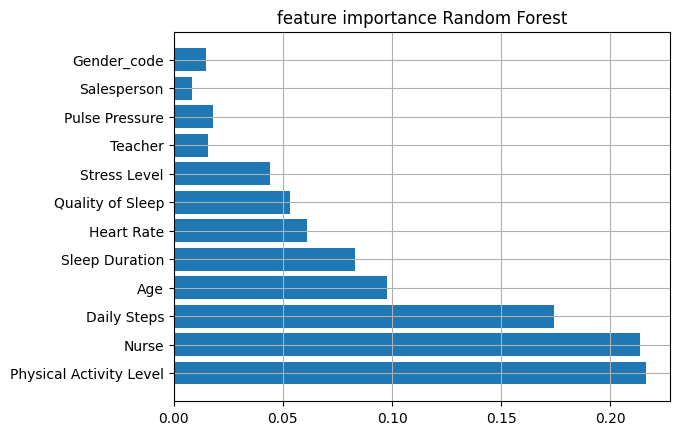

In [807]:
rf2.fit(train_set_2[no_diastolic_systolic], y_train_2)
plt.barh(train_set_2[no_diastolic_systolic].columns,rf2.feature_importances_)
plt.title('feature importance Random Forest')
plt.grid(True);

In [ ]:
# XGB

In [816]:
x2 = [x for x in train_set_2[seleccion_2] if x not in ['diastolic', 'systolic']]

In [853]:
# seleccion_2
xgb2_ = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb2_ = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [2,3,4, 5],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.6,0.7,0.8, 1]
}

grid_xgb2_ = GridSearchCV(xgb2_, param_grid_xgb2_, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_xgb2_.fit(train_set_2[x2], y_train_2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='precision', verbose=1)

In [854]:
y_pred2_2_ = grid_xgb2_.best_estimator_.predict(test_set_2[x2])
print(classification_report(y_test_2, y_pred2_2_))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.83      0.88      0.86        17

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.84        31
weighted avg       0.84      0.84      0.84        31



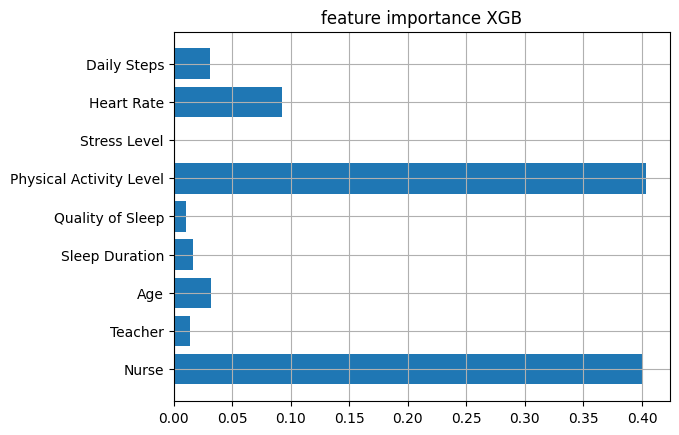

In [866]:
xgb2_.fit(train_set_2[x2], y_train_2)
plt.barh(train_set_2[x2].columns,xgb2_.feature_importances_)
plt.title('feature importance XGB')
plt.grid(True);

In [855]:
#feature_importance_2
xgb2_ = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb2_ = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [2,3,4, 5],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.6,0.7,0.8, 1]
}

grid_xgb2_ = GridSearchCV(xgb2_, param_grid_xgb2_, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_xgb2_.fit(train_set_2[no_diastolic_systolic], y_train_2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='precision', verbose=1)

In [856]:
y_pred2_2_ = grid_xgb2_.best_estimator_.predict(test_set_2[no_diastolic_systolic])
print(classification_report(y_test_2, y_pred2_2_))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



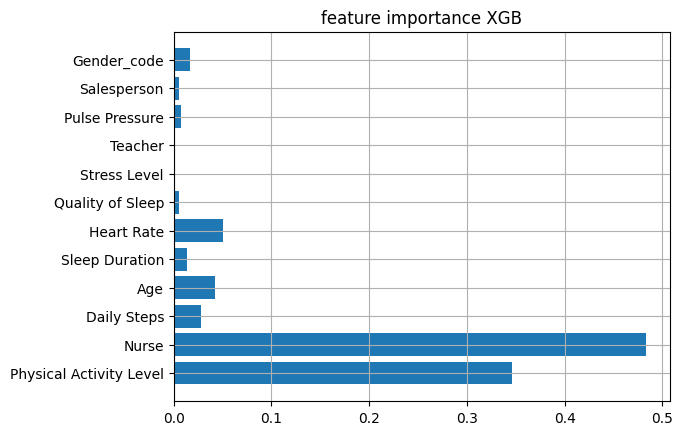

In [865]:
xgb2_.fit(train_set_2[no_diastolic_systolic], y_train_2)
plt.barh(train_set_2[no_diastolic_systolic].columns,xgb2_.feature_importances_)
plt.title('feature importance XGB')
plt.grid(True);

In [858]:
# como vemos los modelos están dando buenas métricas sin usar 'diastolic', 'systolic', significa que el modelo usa bien otros datos
# y que el resto de datos del dataset sirven para diferenciar entre insomnio y apnea del sueño.
# En este caso las voy a dejar porque el conjunto de 'diastolic', 'systolic' es la presión arterial y va relacionado con estos problemas 
# del sueño, hoy en día un centro médico accede fácilmente a esos datos o en casa la gente suele tener un medidor de presión arterial

In [864]:
# Voy a descartar random Forest y usar XGB porque me da mejor resultados

In [889]:
print('RFEv_2','\n', RFEv_2,'\n'*2, 'seleccion_2','\n',seleccion_2,'\n'*2,'feature_importance_2','\n', feature_importance_2)

RFEv_2 
 ['Gender_code', 'Nurse', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'systolic', 'diastolic'] 

 seleccion_2 
 ['Nurse', 'Teacher', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'systolic'] 

 feature_importance_2 
 ['diastolic', 'systolic', 'Physical Activity Level', 'Nurse', 'Daily Steps', 'Age', 'Sleep Duration', 'Heart Rate', 'Quality of Sleep', 'Stress Level', 'Teacher', 'Pulse Pressure', 'Salesperson', 'Gender_code']


In [1064]:
# De todas estas voy a elegir 'RFEv_2' porque es la que más representa y mejores resultados tiene

In [1091]:
xgb2_ = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb2_ = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [2,3,4, 5],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.6,0.7,0.8, 1]
}

grid_xgb2_ = GridSearchCV(xgb2_, param_grid_xgb2_, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_xgb2_.fit(train_set_2[RFEv_2], y_train_2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='precision', verbose=1)

In [1092]:
y_pred2_2_ = grid_xgb2_.best_estimator_.predict(test_set_2[RFEv_2])
print(classification_report(y_test_2, y_pred2_2_))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



In [1093]:
mejores_parametros_xgb = grid_xgb2_.best_params_

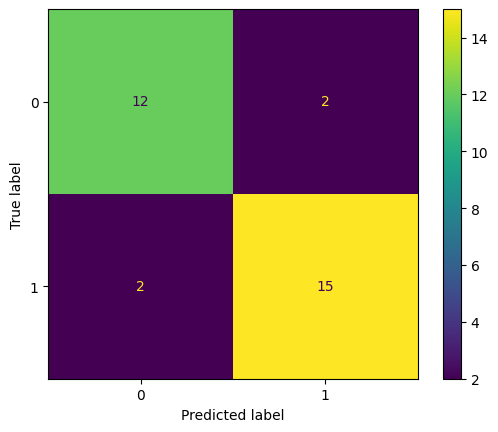

In [1094]:
ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred2_2_);

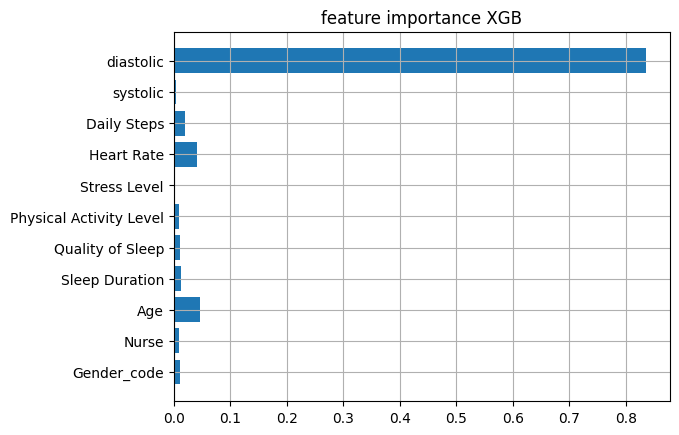

In [1095]:
xgb2_.fit(train_set_2[RFEv_2], y_train_2)
plt.barh(train_set_2[RFEv_2].columns,xgb2_.feature_importances_)
plt.title('feature importance XGB')
plt.grid(True);

In [1213]:
# voy a hacer un test de hipótesis a esas features

In [1211]:
lista_num = RFEv_2 + [targett]

In [1212]:
for x in lista_num:
    grupo_a = train_set_2.loc[train_set_2.target == 0][x]
    grupo_b = train_set_2.loc[train_set_2.target == 1][x]
    u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
    print('-',x,'-')
    print("Estadístico U:", u_stat)
    print("Valor p:", p_valor)

    if p_valor < 0.05:
        print('Hay diferencia estadísticamente significativa')
    else:
        print('No hay diferencia suficiente')
    print('------------------------------')

- Gender_code -
Estadístico U: 1105.0
Valor p: 5.5853804936747e-07
Hay diferencia estadísticamente significativa
------------------------------
- Nurse -
Estadístico U: 406.5
Valor p: 1.2080857610895516e-18
Hay diferencia estadísticamente significativa
------------------------------
- Age -
Estadístico U: 801.5
Valor p: 1.765514755853017e-08
Hay diferencia estadísticamente significativa
------------------------------
- Sleep Duration -
Estadístico U: 1988.5
Valor p: 0.7383392831626937
No hay diferencia suficiente
------------------------------
- Quality of Sleep -
Estadístico U: 1619.0
Valor p: 0.1086575540433775
No hay diferencia suficiente
------------------------------
- Physical Activity Level -
Estadístico U: 529.5
Valor p: 3.433644702748717e-13
Hay diferencia estadísticamente significativa
------------------------------
- Stress Level -
Estadístico U: 1757.5
Valor p: 0.39833502689469147
No hay diferencia suficiente
------------------------------
- Heart Rate -
Estadístico U: 1279

In [1214]:
variables = ['Gender_code', 'Nurse', 'Age', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'systolic', 'diastolic']

In [1215]:
# voy a probar con estas nuevas variables

In [1218]:
xgb2__ = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb2_ = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [2,3,4, 5],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.6,0.7,0.8, 1]
}

grid_xgb2__ = GridSearchCV(xgb2_, param_grid_xgb2_, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_xgb2__.fit(train_set_2[variables], y_train_2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='precision', verbose=1)

In [1219]:
y_pred2_2__ = grid_xgb2__.best_estimator_.predict(test_set_2[variables])
print(classification_report(y_test_2, y_pred2_2__))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



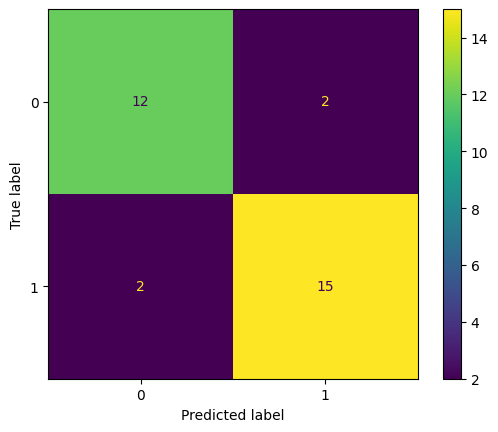

In [1221]:
ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred2_2__);

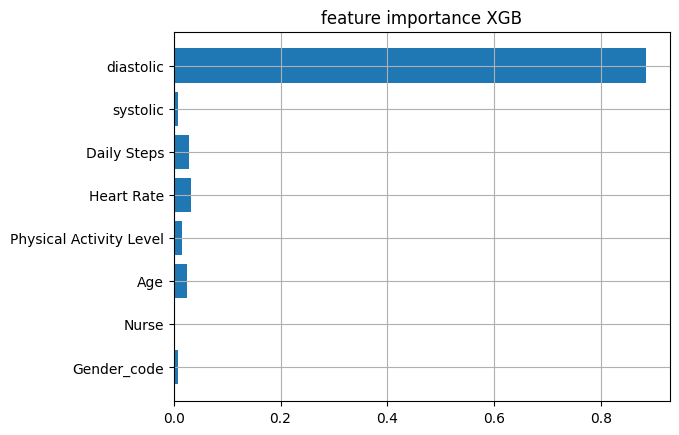

In [1220]:
xgb2__.fit(train_set_2[variables], y_train_2)
plt.barh(train_set_2[variables].columns,xgb2__.feature_importances_)
plt.title('feature importance XGB')
plt.grid(True);

In [1222]:
# Nos está dando resultados muy iguales, voy a hacer validación cruzada de los dos y elegiré

In [1228]:
# todas las features (RFEv_2)
cross = cross_validate(xgb2_, train_set_2[RFEv_2], y_train_2, cv = 5 , scoring = ['precision'])
print(f"precision {np.mean(cross['test_precision']):.4f}")

precision 0.8697


In [1229]:
# selección de las features que si tienen significancia estadística (variables)
cross = cross_validate(xgb2_, train_set_2[variables], y_train_2, cv = 5 , scoring = ['precision'])
print(f"precision {np.mean(cross['test_precision']):.4f}")

precision 0.8571


In [1230]:
# Es un resultado mínimo, voy a usar las features que sólo son significantes en el test de hipótesis

In [915]:
# si que la columna 'diastolic' es muy dominante, eso es que esa columna es muy predictora, cuando quité estas columnas, el modelo
# dió unos resultados un poquito por debajo, pero resultados muy buenos también, como el modelo pasa por validacion cruzada cuando 
# hacemos el gridSearch, nos indica que no hace overfiting porque los resultados se ven estables, tiene sentido desde un punto clinico 
#porque la presión arterial va relacionada con la apnea del sueño

In [1231]:
train_set_2[variables].head(1)

Gender_code  Nurse  Age  Physical Activity Level  Heart Rate  \
277            0      0   49                       85          86   

     Daily Steps  systolic  diastolic  
277         3700       139         91

In [1076]:
data = pd.read_csv('../data/Sleep_Health_and_Lifestyle.csv')

In [1078]:
data.drop(columns = ['Person ID', 'BMI Category'], inplace = True)

In [1080]:
data.dropna(inplace=True)

In [1083]:
data.rename(columns = {'Sleep Disorder':'target'}, inplace = True)

In [1084]:
data['target'] = data['target'].map({'Insomnia':0, 'Sleep Apnea':1})
data[['systolic','diastolic']] = data['Blood Pressure'].str.extract(r'(\d+)/(\d+)', expand=True)
data.drop(columns='Blood Pressure', inplace=True)
data['systolic'] = data['systolic'].astype(int)
data['diastolic'] = data['diastolic'].astype(int)
data['Gender_code'] = data['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
dummies_train_2 = pd.get_dummies(data['Occupation']).astype(int)
data = pd.concat([data, dummies_train_2], axis = 1)

In [1232]:
data[variables].head(1)

Gender_code  Nurse  Age  Physical Activity Level  Heart Rate  Daily Steps  \
3            0      0   28                       30          85         3000   

   systolic  diastolic  
3       140         90

In [1127]:
# voy a hacer el pipeline y el modelo para guardarlos

In [1268]:
def nurse_func(X):
    return (X == 'Sí').astype(int)

def gender_func(X):
    X = X.copy()
    X['Gender_code'] = (X == 'Femenino').astype(int)
    return X[['Gender_code']]
    
gender = FunctionTransformer(gender_func)
nurse = FunctionTransformer(nurse_func)

# metemos todo en el columntransformer para que se hagan los cambios
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('gender', gender, ['Gender']),
        ('nurse', nurse, ['Nurse'])
    ],
    remainder='passthrough' 
)
# el remainder se pone en 'passthrough' para que no afecte al resto de columnas

# este es el pipeline con todo dentro
pipeline2 = Pipeline([
    ('preprocessor', preprocessor_2)
])

In [1174]:
# creo un dataset simulando la entrada de los datos del cliente para hacer el fit del pipeline

In [1274]:
X_t_2 = data[variables]
y_t_2 = data['target']

In [1275]:
pipe_2 = pd.DataFrame({
                'Gender': 'Masculino',
                'Nurse':'Sí',
                'Age':27,
                'Physical Activity Level': 42,
                'Heart Rate':77,
                'Daily Steps':4200,
                'systolic':126,
                'diastolic':83
}, index = X_t_2.index)

In [1276]:
pipe_2 = pipe_2.iloc[[0]]

In [1277]:
pipeline2.fit(pipe_2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  FunctionTransformer(func=<function gender_func at 0x000002006B3E32E0>),
                                                  ['Gender']),
                                                 ('nurse',
                                                  FunctionTransformer(func=<function nurse_func at 0x000002006594C670>),
                                                  ['Nurse'])]))])

In [1278]:
pipeline2.transform(pipe_2)

array([[   0,    1,   27,   42,   77, 4200,  126,   83]])

In [1279]:
model = XGBClassifier(eval_metric='logloss', random_state=42, **mejores_parametros_xgb)

In [1100]:
# entrenamos el modelo y luego lo guardamos para poder usarlo

In [1280]:
model.fit(X_t_2, y_t_2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [1281]:
joblib.dump(model, '../models/modelo_entrenado_2_XGB.joblib')

['../models/modelo_entrenado_2_XGB.joblib']

In [1282]:
joblib.dump(pipeline2, '../models/pipeline_transformacion_2_XGB.joblib')

['../models/pipeline_transformacion_2_XGB.joblib']